In [1]:
import os
from getpass import getpass
os.environ["OPENAI_API_KEY"] = getpass("Please enter your OpenAI API key!")

#### A Note about the PDFs:

I personally got direct permission from Ron Kohavi to use his book, papers, and LinkedIn posts (which I scrapped) as part of this PDF collection. When I share this notebook on Github, I will not include the 'data' subdirectory to keep it private and secure

In [464]:
import os
import getpass

os.environ["LLAMA_CLOUD_API_KEY"] = getpass.getpass("LlamaParse API Key:")

Let's take one of the papers and see what happens when we parse it with LlamaParse so we can get a better sense of how to proceed

In [3]:
import os
import re
import nest_asyncio  
from llama_parse import LlamaParse

# Required for async operations in notebooks
nest_asyncio.apply()

# Define PDF path
pdf_path = os.path.join("data", "papers_and_books", "AB Testing Intuition Busters.pdf")

# Initialize LlamaParse with API key 
parser = LlamaParse(
    api_key=os.environ["LLAMA_CLOUD_API_KEY"],  
    result_type="markdown",      # Get structured markdown output
    verbose=True,
    language="en",
    num_workers=1
)

# Parse the document
documents = parser.load_data(pdf_path)

# Extract markdown text
full_text = "\n".join(doc.text for doc in documents)

# Analyze header hierarchy
headers = []
for line in full_text.split('\n'):
    header_match = re.match(r'^(#+)\s+(.*)', line)
    if header_match:
        level = len(header_match.group(1))
        title = header_match.group(2).strip()
        headers.append((level, title))

# Print document structure
print("Document Hierarchy:\n")
current_level = 0
for level, title in headers:
    indent = "  " * (level - 1)
    print(f"{indent}└─ Level {level}: {title}")

# Show structural summary
unique_levels = sorted(set(level for level, _ in headers))
print("\nStructural Analysis:")
print(f"- Deepest hierarchy level: {max(unique_levels) if unique_levels else 0}")
print(f"- Unique levels found: {unique_levels}")
print(f"- Total sections: {len(headers)}")

# Typical hierarchy interpretation
hierarchy_map = {
    1: "Chapter/Top-Level Section",
    2: "Subsection",
    3: "Sub-Subsection",
    4: "Paragraph Group"
}
print("\nTypical Meaning:")
for level in unique_levels:
    print(f"- Level {level}: {hierarchy_map.get(level, 'Nested Content')}")


Started parsing the file under job_id d09bc08e-402b-4b3d-90a2-509b7ff2deb6
Document Hierarchy:

└─ Level 1: A/B Testing Intuition Busters
└─ Level 1: Common Misunderstandings in Online Controlled Experiments
└─ Level 1: ABSTRACT
└─ Level 1: CCS CONCEPTS
└─ Level 1: KEYWORDS
└─ Level 1: ACM Reference format:
└─ Level 1: 1. Introduction
└─ Level 1: 2. Motivating Example
└─ Level 1: KDD ’22, August 14-18, 2022, Washington DC, USA
└─ Level 1: 3. Surprising Results Require Strong Evidence—Lower P-Values
└─ Level 1: A/B Testing Intuition Busters: Common Misunderstandings
└─ Level 1: KDD ’22, August 14–18, 2022, Washington DC
└─ Level 1: Table 2: False Positive Risk given the Success Rate, p-value threshold of 0.025 (successes only), and 80% power
└─ Level 1: 4. Experiments with Low Statistical Power are NOT Trustworthy
└─ Level 1: KDD ’22, August 14-18, 2022, Washington DC, USA
└─ Level 1: Table 3: False Positive Risk as in Table 2, but with 80% power, 50% power, and 20% power
└─ Level 1: A/

Looking at the output above, we see that there is just one hierachical level (not something like chapters vs sections vs subsections). That being said, taking a look at the actual paper, what was parsed is accurate. On one hand, some sections above are just basic things like just the title. But on the other hand, each actual section of the paper is kept in-tact for the most part, which is great

Note: at the top of each page in the paper, it says 'KDD ’22, August 14-18, 2022, Washington DC, USA'. Unfortunately, this breaks up a true section into 2 parsed sections. If we had more time, we would come up with a solution to remedy this. Unfortunately, due to the rapid pace of the AI engineering bootcamp, we have to accept this as is. But this is a great thing to come back to later for further improvement!

Let's get each section so we can peek inside and see the parsed content

In [4]:
sections = []
current_section = None

for line in full_text.split('\n'):
    header_match = re.match(r'^(#+)\s+(.*)', line)
    if header_match:
        # Save previous section if exists
        if current_section is not None:
            sections.append(current_section)
        # Start new section
        level = len(header_match.group(1))
        title = header_match.group(2).strip()
        current_section = {"level": level, "title": title, "content": []}
    else:
        if current_section is not None:
            current_section["content"].append(line.strip())

# Save the last section
if current_section is not None:
    sections.append(current_section)


In [5]:
# To get all section titles:
print("\nAll section titles:")
for i, section in enumerate(sections):
    print(f"{i}: {section['title']}")


All section titles:
0: A/B Testing Intuition Busters
1: Common Misunderstandings in Online Controlled Experiments
2: ABSTRACT
3: CCS CONCEPTS
4: KEYWORDS
5: ACM Reference format:
6: 1. Introduction
7: 2. Motivating Example
8: KDD ’22, August 14-18, 2022, Washington DC, USA
9: 3. Surprising Results Require Strong Evidence—Lower P-Values
10: A/B Testing Intuition Busters: Common Misunderstandings
11: KDD ’22, August 14–18, 2022, Washington DC
12: Table 2: False Positive Risk given the Success Rate, p-value threshold of 0.025 (successes only), and 80% power
13: 4. Experiments with Low Statistical Power are NOT Trustworthy
14: KDD ’22, August 14-18, 2022, Washington DC, USA
15: Table 3: False Positive Risk as in Table 2, but with 80% power, 50% power, and 20% power
16: A/B Testing Intuition Busters: Common Misunderstandings
17: KDD ’22, August 14–18, 2022, Washington DC
18: in Online Controlled Experiments
19: KDD ’22, August 14-18, 2022, Washington DC, USA
20: 6. Minimize Data Processing

In [6]:
print("Title:", sections[15]["title"])
print("Level:", sections[15]["level"])
print("Content:\n", "\n".join(sections[15]["content"]))

Title: Table 3: False Positive Risk as in Table 2, but with 80% power, 50% power, and 20% power
Level: 1
Content:
 
| Company/ Source                  | Success Rate | FPR @ 80% Power | FPR @ 50% Power | FPR @ 20% Power |
| -------------------------------- | ------------ | --------------- | --------------- | --------------- |
| Microsoft                        | 33%          | 5.9%            | 9.1%            | 20.0%           |
| Avinash Kaushik                  | 20%          | 11.1%           | 16.7%           | 33.3%           |
| Bing                             | 15%          | 15.0%           | 22.1%           | 41.5%           |
| Booking.com, Google Ads, Netflix | 10%          | 22.0%           | 31.0%           | 52.9%           |
| Airbnb search                    | 8%           | 26.4%           | 36.5%           | 59.0%           |

Ioannidis (2005) made this point in a highly cited paper: Why Most Published Research Findings Are False. With many low statistical power stu

We see that the table above is parsed beautifully! Furthermore, looking at the actual paper, we see that every value above is accurate! This will bode well for the accuracy of our A/B AI app!

Now let's do the same for Ron Kohavi's book to see if the parsed structure is the same or not

In [ ]:
import os
import re
import nest_asyncio  # Required for Jupyter notebooks
from llama_parse import LlamaParse

# Required for async operations in notebooks
nest_asyncio.apply()

# Define PDF path
pdf_path = os.path.join("data", "papers_and_books", "Trustworthy Online Controlled Experiments - Kohavi, Ron & Tang, Diane & Xu, Ya.pdf")

# Initialize LlamaParse with API key (replace with yours)
parser = LlamaParse(
    api_key=os.environ["LLAMA_CLOUD_API_KEY"],  
    result_type="markdown",      # Get structured markdown output
    verbose=True,
    language="en",
    num_workers=1
)

# Parse the document
documents = parser.load_data(pdf_path)

# Extract markdown text
full_text = "\n".join(doc.text for doc in documents)

# Analyze header hierarchy
headers = []
for line in full_text.split('\n'):
    header_match = re.match(r'^(#+)\s+(.*)', line)
    if header_match:
        level = len(header_match.group(1))
        title = header_match.group(2).strip()
        headers.append((level, title))

# Print document structure
print("Document Hierarchy:\n")
current_level = 0
for level, title in headers:
    indent = "  " * (level - 1)
    print(f"{indent}└─ Level {level}: {title}")

# Show structural summary
unique_levels = sorted(set(level for level, _ in headers))
print("\nStructural Analysis:")
print(f"- Deepest hierarchy level: {max(unique_levels) if unique_levels else 0}")
print(f"- Unique levels found: {unique_levels}")
print(f"- Total sections: {len(headers)}")

# Typical hierarchy interpretation
hierarchy_map = {
    1: "Chapter/Top-Level Section",
    2: "Subsection",
    3: "Sub-Subsection",
    4: "Paragraph Group"
}
print("\nTypical Meaning:")
for level in unique_levels:
    print(f"- Level {level}: {hierarchy_map.get(level, 'Nested Content')}")


Started parsing the file under job_id cf7c6519-dd18-4c40-915e-dd3561af56ec
.Document Hierarchy:

└─ Level 1: 1 Introduction and Motivation
└─ Level 1: Figure 1.1 An experiment changing the way ads display on Bing
└─ Level 1: Key Themes in Online Controlled Experiments
└─ Level 1: Online Controlled Experiments
└─ Level 1: Terminology
└─ Level 1: Figure 1.2 A simple controlled experiment: An A/B Test
└─ Level 1: Overall Evaluation Criterion (OEC)
└─ Level 1: Parameter
└─ Level 1: 1. Variant
└─ Level 1: 2. Randomization Unit
└─ Level 1: Why Experiment? Correlations, Causality, and Trustworthiness
└─ Level 1: Conclusion
└─ Level 1: Figure 1.3 A simple hierarchy of evidence for assessing the quality of trial design (Greenhalgh 2014)
└─ Level 1: Necessary Ingredients for Running Useful Controlled Experiments
└─ Level 1: 1. Experimental Units
└─ Level 1: 2. Sufficient Experimental Units
└─ Level 1: 3. Key Metrics
└─ Level 1: 4. Ease of Changes
└─ Level 1: Tenets
└─ Level 1: 2. The organizatio

We see above that the parsed structure for the book is the same as for the paper. Thus, we can process papers and books the same way.

Note: the issue of breaking up a true section into 2 parsed sections on each new page doesn't happen for the book, which is good

Let's take a look at the content of a section

In [12]:
sections = []
current_section = None

for line in full_text.split('\n'):
    header_match = re.match(r'^(#+)\s+(.*)', line)
    if header_match:
        # Save previous section if exists
        if current_section is not None:
            sections.append(current_section)
        # Start new section
        level = len(header_match.group(1))
        title = header_match.group(2).strip()
        current_section = {"level": level, "title": title, "content": []}
    else:
        if current_section is not None:
            current_section["content"].append(line.strip())

# Save the last section
if current_section is not None:
    sections.append(current_section)


In [13]:
# To get all section titles:
print("\nAll section titles:")
for i, section in enumerate(sections):
    print(f"{i}: {section['title']}")


All section titles:
0: 1 Introduction and Motivation
1: Figure 1.1 An experiment changing the way ads display on Bing
2: Key Themes in Online Controlled Experiments
3: Online Controlled Experiments
4: Terminology
5: Figure 1.2 A simple controlled experiment: An A/B Test
6: Overall Evaluation Criterion (OEC)
7: Parameter
8: 1. Variant
9: 2. Randomization Unit
10: Why Experiment? Correlations, Causality, and Trustworthiness
11: Conclusion
12: Figure 1.3 A simple hierarchy of evidence for assessing the quality of trial design (Greenhalgh 2014)
13: Necessary Ingredients for Running Useful Controlled Experiments
14: 1. Experimental Units
15: 2. Sufficient Experimental Units
16: 3. Key Metrics
17: 4. Ease of Changes
18: Tenets
19: 2. The organization is willing to invest in the infrastructure and tests to run controlled experiments and ensure that the results are trustworthy.
20: 3. The organization recognizes that it is poor at assessing the value of ideas.
21: Tenet 1: The Organization Wa

In [14]:
print("Title:", sections[400]["title"])
print("Level:", sections[400]["level"])
print("Content:\n", "\n".join(sections[400]["content"]))

Title: Splitting shared resources
Level: 1
Content:
 
If a shared resource is causing interference, splitting it between Treatment and Control is the obvious first choice. For example, you can split the ad budget according to variant allocation and only allow 20% budget to be consumed by a variant allocated 20% of traffic. Similarly, in a relevance algorithm training case, you can split the training data according to the variants they are collected from.

There are two things to watch out for when applying this approach:

1. Can your interfering resources be split exactly according to the traffic allocation for your variants? While this is easily achieved for budget or training data, it often isn’t possible. For example, with shared machines there is heterogeneity among individual machines and simply serving Treatment and Control traffic different machines introduces too much other confounding factors difficult to correct for.
2. Does your traffic allocation (the resource split size) i

The parsed content looks good!

Now it's time for the most important cell of the notebook: our chunking strategy. 

For each paper/book, we first use LlamaParse to get each parsed section of the PDF. Then for each parsed section, we want to extract the tables (if it contains tables). The idea is that each table should be its own chunk (without further chunking). Then we want to get the parsed section with its tables removed (since they are already their own chunk). Now for each parsed section with its tables removed, we use SemanticChunker to further break it down into chunks to prevent a chunk from having more than one core point and to not have chunks that are too big. We do some further cleaning (no chunks that only contain whitespace, trim whitespace from chunks, remove duplicate chunks, remove 'References' as they won't provide value for us).

For each LinkedIn post, the URL is the first line of each PDF. We process this by extracting the URL and making it metadata, but then removing the URL line from the page content (the actual chunk). Because each LinkedIn post is relatively short and represent a single idea/stream of thought, we do not further chunk it. In other words, each LinkedIn post is its own chunk

In [267]:
import os
from tqdm import tqdm
from llama_parse import LlamaParse
from langchain_core.documents import Document
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain_core.documents import Document
from typing import List, Dict, Any, Optional
import json

class PDFSectionProcessor:
    def __init__(
        self,
        breakpoint_threshold_type: str = "percentile",
        breakpoint_threshold_amount: Optional[float] = None
    ):
        self.parser = LlamaParse(
            api_key=os.environ["LLAMA_CLOUD_API_KEY"],
            result_type="markdown",
            language="en",
            verbose=True
        )
        self.text_splitter = SemanticChunker(
            OpenAIEmbeddings(),
            breakpoint_threshold_type=breakpoint_threshold_type,
            breakpoint_threshold_amount=breakpoint_threshold_amount
        )

    def process_directory(self, base_dir: str) -> List[Dict[str, Any]]:
        """Process both directory types"""
        all_chunks = []
        
        # Process papers/books
        papers_dir = os.path.join(base_dir, 'papers_and_books')
        if os.path.exists(papers_dir):
            pdf_files = [f for f in os.listdir(papers_dir) if f.lower().endswith('.pdf')]
            for pdf_file in tqdm(pdf_files, desc="Processing papers/books"):
                try:
                    pdf_path = os.path.join(papers_dir, pdf_file)
                    chunks = self._process_document(pdf_path, pdf_file)
                    all_chunks.extend(chunks)
                except Exception as e:
                    print(f"Error processing {pdf_file}: {str(e)}")
                    continue

        # Process LinkedIn posts
        linkedin_dir = os.path.join(base_dir, 'linkedin_posts')
        if os.path.exists(linkedin_dir):
            pdf_files = [f for f in os.listdir(linkedin_dir) if f.lower().endswith('.pdf')]
            for pdf_file in tqdm(pdf_files, desc="Processing LinkedIn posts"):
                try:
                    pdf_path = os.path.join(linkedin_dir, pdf_file)
                    chunks = self._process_linkedin_post(pdf_path, pdf_file)
                    all_chunks.extend(chunks)
                except Exception as e:
                    print(f"Error processing {pdf_file}: {str(e)}")
                    continue

        all_chunks = [Document(page_content=chunk.get('page_content', ''), 
                     metadata=chunk.get('metadata', {})) 
                     for chunk in all_chunks]

        return all_chunks

    def _process_linkedin_post(self, pdf_path: str, filename: str) -> List[Dict]:
        """Special processing for LinkedIn posts"""
        chunks = []
        llama_docs = self.parser.load_data(pdf_path)
        
        for doc in llama_docs:
            lines = doc.text.split('\n')
            if not lines:
                continue
                
            # Extract URL from first line
            url = lines[0].strip()
            content = '\n'.join(lines[1:]).strip()
            
            if content:  # Only add if there's content after URL
                chunks.append({
                    'page_content': content,
                    'metadata': {
                        'source': filename,
                        'url': url,
                        'chunk_type': 'linkedin'
                    }
                })
                
        return chunks
    
    def _process_document(self, pdf_path: str, filename: str) -> List[Dict]:
        llama_docs = self.parser.load_data(pdf_path)
        chunks = []
        seen_texts = set()
        for doc in llama_docs:
            sectioned = self._split_sections(doc.text)
            for section_title, section_level, section_text in sectioned:
                # Trim whitespace
                section_text = section_text.strip()
                section_title = section_title.strip()
                # Skip blank/whitespace-only
                if not section_text:
                    continue
                # Skip "References" sections
                if section_title.lower() == "references":
                    continue
                # Remove duplicates (by text only)
                text_hash = hash(section_text)
                if text_hash in seen_texts:
                    continue
                seen_texts.add(text_hash)
                # Extract tables and add them with correct section_title
                tables = self._extract_tables(section_text, filename, section_title, section_level, seen_texts)
                chunks.extend(tables)
                # Remove tables from text before splitting into text chunks
                text_wo_tables = self._remove_tables_from_text(section_text)
                if text_wo_tables.strip():
                    section_meta = {
                        'source': filename,
                        'section_title': section_title,
                        'section_level': section_level,
                        'section_id': f"sec_{section_level}_{hash(section_text)}",
                        'chunk_type': 'text'
                    }
                    documents = self.text_splitter.create_documents(
                        texts=[text_wo_tables],
                        metadatas=[section_meta]
                    )
                    for doc in documents:
                        doc_text = doc.page_content.strip()
                        # Remove blank/whitespace-only text chunks
                        if doc_text:
                            # Remove duplicates again at chunk level (by text only)
                            chunk_hash = hash(doc_text)
                            if chunk_hash in seen_texts:
                                continue
                            seen_texts.add(chunk_hash)
                            chunks.append({
                                'page_content': doc_text,
                                'metadata': doc.metadata
                            })
        return chunks

    def _split_sections(self, text: str) -> List:
        """Splits markdown into sections based on headers, returns list of (title, level, text)"""
        sections = []
        current_section = []
        current_title = "Untitled"
        current_level = 0
        for line in text.split('\n'):
            if line.startswith('#'):
                if current_section:
                    sections.append((current_title, current_level, '\n'.join(current_section)))
                current_title = line.strip('#').strip()
                current_level = line.count('#')
                current_section = [line]
            else:
                current_section.append(line)
        if current_section:
            sections.append((current_title, current_level, '\n'.join(current_section)))
        return sections

    def _extract_tables(self, text: str, filename: str, section_title: str, section_level: int, seen_texts: set) -> List[Dict]:
        """Extract tables from markdown text within a section, assign correct section_title, and remove duplicates by text"""
        tables = []
        current_table = []
        in_table = False
        for line in text.split('\n'):
            if line.strip().startswith('|'):
                in_table = True
                current_table.append(line)
            elif in_table:
                table_text = '\n'.join(current_table).strip()
                if table_text:  # Don't add empty tables
                    table_hash = hash(table_text)
                    if table_hash not in seen_texts:
                        seen_texts.add(table_hash)
                        tables.append({
                            'page_content': table_text,
                            'metadata': {
                                'source': filename,
                                'section_title': section_title,
                                'section_level': section_level,
                                'section_id': f"table_{len(tables)+1}",
                                'chunk_type': 'table_etc'
                            }
                        })
                current_table = []
                in_table = False
        # Handle table at end of section
        if in_table and current_table:
            table_text = '\n'.join(current_table).strip()
            if table_text:
                table_hash = hash(table_text)
                if table_hash not in seen_texts:
                    seen_texts.add(table_hash)
                    tables.append({
                        'page_content': table_text,
                        'metadata': {
                            'source': filename,
                            'section_title': section_title,
                            'section_level': section_level,
                            'section_id': f"table_{len(tables)+1}",
                            'chunk_type': 'table_etc'
                        }
                    })
        return tables

    def _remove_tables_from_text(self, text: str) -> str:
        """Removes markdown tables from text"""
        lines = text.split('\n')
        out_lines = []
        in_table = False
        for line in lines:
            if line.strip().startswith('|'):
                in_table = True
                continue
            elif in_table:
                in_table = False
                continue
            else:
                out_lines.append(line)
        return '\n'.join(out_lines)


Let's process our chunks with Percentile = 80 for SemanticChunker

In [16]:
processor = PDFSectionProcessor(breakpoint_threshold_amount=80)
all_chunks = processor.process_directory("data")


Processing papers/books:   0%|          | 0/28 [00:00<?, ?it/s]

Started parsing the file under job_id 22c7efb4-44c9-4f30-baa2-4e73c46d1610


Processing papers/books:   4%|▎         | 1/28 [00:15<06:50, 15.22s/it]

Error while parsing the file 'data/papers_and_books/Shipping Flat Treatments in Online Controlled Experiments.pdf': Event loop is closed
Started parsing the file under job_id d0f540e7-15a5-4f42-a1a2-8b583c1d5e50


Processing papers/books:  11%|█         | 3/28 [00:35<04:50, 11.62s/it]

Error while parsing the file 'data/papers_and_books/False Positives In AB Tests.pdf': Event loop is closed
Started parsing the file under job_id b4393b66-5f42-4b4b-82e2-a6617614119a


Processing papers/books:  18%|█▊        | 5/28 [00:42<02:49,  7.38s/it]

Error while parsing the file 'data/papers_and_books/Seven Pitfalls to Avoid when Running Controlled Experiments on the Web.pdf': Event loop is closed
Started parsing the file under job_id 0c2f4cd6-0c69-438d-85b2-93d899a2dc77


Processing papers/books:  25%|██▌       | 7/28 [01:01<02:53,  8.26s/it]

Error while parsing the file 'data/papers_and_books/Practical Defaults for AB Testing.pdf': Event loop is closed
Started parsing the file under job_id ea62a7bc-aee2-4311-a1ae-3224f05c6c37


Processing papers/books:  32%|███▏      | 9/28 [01:12<02:17,  7.22s/it]

Error while parsing the file 'data/papers_and_books/CUPED Improving Sensitivity Of Controlled Experiments by Utilizing Pre Experiment Data.pdf': Event loop is closed
Started parsing the file under job_id 670ab0b2-f5e2-4b2f-ba2c-c8568a4437a3


Processing papers/books:  39%|███▉      | 11/28 [01:52<03:19, 11.74s/it]

Error while parsing the file 'data/papers_and_books/Multi-Armed Bandits, Thompson Sampling, or A_B Testing_ Are you optimizing for short-term headlines or long-term pills worth billions_ _ LinkedIn.pdf': Event loop is closed
Started parsing the file under job_id da48aadb-ffd8-4531-a283-7d4d79f0cac3


Processing papers/books:  46%|████▋     | 13/28 [02:04<02:25,  9.69s/it]

Error while parsing the file 'data/papers_and_books/Trustworthy Online Controlled Experiments Five Puzzling Outcomes Explained.pdf': Event loop is closed
Started parsing the file under job_id 435840e5-0e45-4c08-a5be-ca820ef69424


Processing papers/books:  54%|█████▎    | 15/28 [02:27<02:14, 10.33s/it]

Error while parsing the file 'data/papers_and_books/Trustworthy Online Controlled Experiments - Kohavi, Ron & Tang, Diane & Xu, Ya.pdf': Event loop is closed
Started parsing the file under job_id 139e7880-c926-4db9-8392-51f37634ffd8


Processing papers/books:  61%|██████    | 17/28 [02:45<01:50, 10.00s/it]

Error while parsing the file 'data/papers_and_books/Major Redesigns Usually Fail.pdf': Event loop is closed
Started parsing the file under job_id 90acc87f-0e1c-4460-87aa-671bba3f9d6a


Processing papers/books:  68%|██████▊   | 19/28 [02:55<01:14,  8.32s/it]

Error while parsing the file 'data/papers_and_books/AB Testing Intuition Busters.pdf': Event loop is closed
Started parsing the file under job_id 939a6fd6-84ac-4fe0-89e6-6429404aa4fc


Processing papers/books:  75%|███████▌  | 21/28 [03:03<00:49,  7.03s/it]

Error while parsing the file 'data/papers_and_books/Top Challenges from the First Practical Online Controlled Experiments Summit.pdf': Event loop is closed
Started parsing the file under job_id 499b4fca-4d72-49af-b24f-ea11d45de08f


Processing papers/books:  82%|████████▏ | 23/28 [03:09<00:29,  5.87s/it]

Error while parsing the file 'data/papers_and_books/P values and Bayes Factors in ABTesting (Frequentist or Bayesian AB).pdf': Event loop is closed
Started parsing the file under job_id 4c68e3e8-6676-4e14-9144-962a092fa1ab


Processing papers/books:  89%|████████▉ | 25/28 [03:30<00:21,  7.27s/it]

Error while parsing the file 'data/papers_and_books/Statistical Challenges in Online Controlled Experiments  A Review of A B Testing Methodology.pdf': Event loop is closed
Started parsing the file under job_id 6b72adeb-5620-4af2-b0f3-9e41f5ba5962


Processing papers/books: 100%|██████████| 28/28 [03:56<00:00,  8.46s/it]


Error while parsing the file 'data/papers_and_books/When to Use Bayesian vs Frequentist.pdf': Event loop is closed


Processing LinkedIn posts:   0%|          | 0/34 [00:00<?, ?it/s]

Started parsing the file under job_id 22bdea58-741e-49f6-aeb1-ed0d52a53d28


Processing LinkedIn posts:   3%|▎         | 1/34 [00:05<03:13,  5.87s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Optimize_AB_Testing_for_Better_Results).pdf': Event loop is closed
Started parsing the file under job_id 5ee2cbff-7f41-4b3b-8a2f-f61773e47cb3


Processing LinkedIn posts:   9%|▉         | 3/34 [00:10<01:44,  3.38s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Beauty_Equals_Functionality_in_Design).pdf': Event loop is closed
Started parsing the file under job_id 56ad45b4-c893-4ff6-a38c-c1989c3fe4ac


Processing LinkedIn posts:  15%|█▍        | 5/34 [00:15<01:21,  2.80s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Placebo_Surgery_and_Arthroscopy_Evidence_Matt).pdf': Event loop is closed
Started parsing the file under job_id 9a615bf8-88e9-42a0-b918-647343ab9bea


Processing LinkedIn posts:  21%|██        | 7/34 [00:20<01:15,  2.79s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (MetaAnalysis_with_Log_Space_Transformation).pdf': Event loop is closed
Started parsing the file under job_id 59065642-1945-482d-8cd0-58c3ce5ca1c1


Processing LinkedIn posts:  26%|██▋       | 9/34 [00:25<01:06,  2.64s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (AIDriven_Experimentation_Resources_Directory).pdf': Event loop is closed
Started parsing the file under job_id 8e436df1-a3e2-4a74-aa17-7e9ee33e96b3


Processing LinkedIn posts:  32%|███▏      | 11/34 [00:30<00:57,  2.49s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (CLT_Not_a_Major_Concern_in_Proper_AB_Tests).pdf': Event loop is closed
Started parsing the file under job_id 7ab73f2c-5a5b-4692-ae2b-cc4d3564fbe5


Processing LinkedIn posts:  38%|███▊      | 13/34 [00:36<00:56,  2.71s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Questioning_AB_Test_Trustworthiness).pdf': Event loop is closed
Started parsing the file under job_id e0f359ef-92cc-4691-8876-2395b598795b


Processing LinkedIn posts:  44%|████▍     | 15/34 [00:40<00:48,  2.54s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Top_6_Pitfalls_in_AB_Testing).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_requ

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (New_AB_Pattern_Reproduction_Results).pdf': RetryError[<Future at 0x10e98b150 state=finished raised HTTPStatusError>]
Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Testing_Business_Ideas_Evidence_and_Experimen).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.


Started parsing the file under job_id af74be3c-66a0-497f-9b5f-e790140b3df7


Processing LinkedIn posts:  56%|█████▌    | 19/34 [01:23<01:41,  6.77s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Basics_Matter_Ensuring_Operational_Consistenc).pdf': Event loop is closed
Started parsing the file under job_id 34055054-7d4a-494e-b4da-a5b236a91cc0


Processing LinkedIn posts:  62%|██████▏   | 21/34 [01:28<01:09,  5.35s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (How_Much_Do_Clouds_Really_Weigh).pdf': Event loop is closed
Started parsing the file under job_id c90d54d3-7507-40c9-baa0-ff8bcc8293fd


Processing LinkedIn posts:  68%|██████▊   | 23/34 [01:32<00:48,  4.45s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Diagnosing_and_Correcting_Sample_Ratio_Mismat).pdf': Event loop is closed
Started parsing the file under job_id e4a7e934-a7b7-48b8-876b-de50f450ab6b


Processing LinkedIn posts:  74%|███████▎  | 25/34 [01:38<00:35,  3.94s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Embrace_Failure_Master_Experimentation).pdf': Event loop is closed
Started parsing the file under job_id 71ecb07c-a3f0-4111-81dd-126b203d8dfc


Processing LinkedIn posts:  79%|███████▉  | 27/34 [01:42<00:23,  3.42s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Trust_Overvelocity_in_Experimentation).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_requ

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (LargeScale_Replication_Finds_Minimal_Corner_E).pdf': RetryError[<Future at 0x10d7a66d0 state=finished raised HTTPStatusError>]
Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Avoid_Cheap_AB_Tests_With_Low_Power).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.


Started parsing the file under job_id ffe0ad34-4a25-449b-82a4-764ad4163718


Processing LinkedIn posts:  91%|█████████ | 31/34 [02:26<00:21,  7.21s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Top_AB_Tests_for_Larger_Sites).pdf': Event loop is closed
Started parsing the file under job_id c8e3a35f-b7fb-450e-8a22-638ef49f8c04


Processing LinkedIn posts: 100%|██████████| 34/34 [02:31<00:00,  4.46s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Scaling_AB_Testing_to_Millions).pdf': Event loop is closed


Let's convert our chunks into dictionaries so we can save all chunks into a single JSON file for later use 

In [18]:
# Create output directory
output_dir = "processed_chunks"
os.makedirs(output_dir, exist_ok=True)

# Convert Document objects to dictionaries
serializable_chunks = [
    {
        "page_content": doc.page_content,
        "metadata": doc.metadata
    } for doc in all_chunks
]

# Save all chunks to a single JSON file
output_path = os.path.join(output_dir, "all_chunks.json")
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(serializable_chunks, f, ensure_ascii=False, indent=2)

print(f"Chunks saved to {output_path}")

Chunks saved to processed_chunks/all_chunks.json


Let's rename this since we will actually try various percentiles

In [323]:
import os

output_dir = "processed_chunks"
old_path = os.path.join(output_dir, "all_chunks.json")
new_path = os.path.join(output_dir, "all_chunks_80percentile.json")

os.rename(old_path, new_path)

print(f"File renamed from {old_path} to {new_path}")

File renamed from processed_chunks/all_chunks.json to processed_chunks/all_chunks_80percentile.json


Let's get a sense of how big our chunks are

In [21]:
import statistics
from typing import List, Dict, Any, Optional

def analyze_chunks(chunks: List[Dict], n: Optional[int] = None) -> Dict[str, Any]:
    """Analyze chunk statistics, including median length.
    
    Args:
        chunks: List of chunk dictionaries
        n: Optional threshold for length comparison 
    
    Returns:
        Dictionary with analysis metrics
    """
    if not chunks:
        return {
            "total_chunks": 0,
            "avg_length": 0,
            "max_length": 0,
            "median_length": 0,
            "chunks_above_n": 0
        }
    
    total_chunks = len(chunks)
    lengths = [len(chunk.page_content) for chunk in chunks]
    
    analysis = {
        "total_chunks": total_chunks,
        "avg_length": sum(lengths) / total_chunks,
        "max_length": max(lengths),
        "median_length": statistics.median(lengths)
    }
    
    if n is not None:
        analysis["chunks_above_n"] = sum(1 for length in lengths if length > n)
    
    return analysis


In [22]:
analysis = analyze_chunks(all_chunks, n=1000)  
n=1000

print(f"Total chunks: {analysis['total_chunks']}")
print(f"Average length: {analysis['avg_length']:.1f} characters")
print(f"Longest chunk: {analysis['max_length']} characters")
print(f"Median length: {analysis['median_length']} characters")

if 'chunks_above_n' in analysis:
    print(f"Chunks longer than {n}: {analysis['chunks_above_n']}")


Total chunks: 878
Average length: 397.1 characters
Longest chunk: 2175 characters
Median length: 319.5 characters
Chunks longer than 1000: 52


In [24]:
print(all_chunks[584].page_content)

Second, increasing the number of experiments assigned to each request results in increasing cache fragmentation, lowering cache hit rates and increasing latency. Bing caches the first n results for common queries, but treatments cannot share a cache entry if they return different results for the same request. As the number of concurrent experiments that influence search results increases, fragmentation increases exponentially. For example, our ranker has four layers, and if three treatments (+ 1 control) are running concurrently (on different number lines), we fragment the cache by a factor of 44 = 256! Finally, new features are typically less performance-optimized in early incarnations.


Let's do the same for different values of Percentile

In [36]:
processor = PDFSectionProcessor(breakpoint_threshold_amount=70)
all_chunks_70percentile = processor.process_directory("data")


Processing papers/books:   0%|          | 0/28 [00:00<?, ?it/s]

Started parsing the file under job_id 2210b817-7f7b-4b5f-9690-d3558be673e2


Processing papers/books:   4%|▎         | 1/28 [00:11<05:05, 11.32s/it]

Error while parsing the file 'data/papers_and_books/Shipping Flat Treatments in Online Controlled Experiments.pdf': Event loop is closed
Started parsing the file under job_id 8d7a05b1-c10d-4b3c-b5f0-e1d9b19ad1c1


Processing papers/books:  11%|█         | 3/28 [00:28<03:49,  9.17s/it]

Error while parsing the file 'data/papers_and_books/False Positives In AB Tests.pdf': Event loop is closed
Started parsing the file under job_id 39bc6049-25c2-48f8-b7d1-b2235dd49926


Processing papers/books:  18%|█▊        | 5/28 [00:34<02:19,  6.07s/it]

Error while parsing the file 'data/papers_and_books/Seven Pitfalls to Avoid when Running Controlled Experiments on the Web.pdf': Event loop is closed
Started parsing the file under job_id c8a9d845-effa-4d5d-87d7-12df48b6e9f6


Processing papers/books:  25%|██▌       | 7/28 [00:54<02:40,  7.66s/it]

Error while parsing the file 'data/papers_and_books/Practical Defaults for AB Testing.pdf': Event loop is closed
Started parsing the file under job_id 4da1888b-4576-4211-9f42-3709f38cd874


Processing papers/books:  32%|███▏      | 9/28 [01:07<02:17,  7.23s/it]

Error while parsing the file 'data/papers_and_books/CUPED Improving Sensitivity Of Controlled Experiments by Utilizing Pre Experiment Data.pdf': Event loop is closed
Started parsing the file under job_id fbd115aa-d7cb-4371-89c5-643f7b73492d


Processing papers/books:  39%|███▉      | 11/28 [01:49<03:27, 12.20s/it]

Error while parsing the file 'data/papers_and_books/Multi-Armed Bandits, Thompson Sampling, or A_B Testing_ Are you optimizing for short-term headlines or long-term pills worth billions_ _ LinkedIn.pdf': Event loop is closed
Started parsing the file under job_id e0cf372d-87dd-46d3-9c8c-9fbac4bad0e8


Processing papers/books:  46%|████▋     | 13/28 [02:01<02:29,  9.97s/it]

Error while parsing the file 'data/papers_and_books/Trustworthy Online Controlled Experiments Five Puzzling Outcomes Explained.pdf': Event loop is closed
Started parsing the file under job_id cac1ed5b-8ad8-4daa-8c1e-5ef94f0785b9


Processing papers/books:  54%|█████▎    | 15/28 [02:21<02:10, 10.04s/it]

Error while parsing the file 'data/papers_and_books/Trustworthy Online Controlled Experiments - Kohavi, Ron & Tang, Diane & Xu, Ya.pdf': Event loop is closed
Started parsing the file under job_id 3ce84512-19cd-4b88-abfb-de8b30f820c3


Processing papers/books:  61%|██████    | 17/28 [02:38<01:45,  9.57s/it]

Error while parsing the file 'data/papers_and_books/Major Redesigns Usually Fail.pdf': Event loop is closed
Started parsing the file under job_id ad2bfb12-ee8c-42f0-a8e5-ba9b7919b734


Processing papers/books:  68%|██████▊   | 19/28 [02:47<01:11,  8.00s/it]

Error while parsing the file 'data/papers_and_books/AB Testing Intuition Busters.pdf': Event loop is closed
Started parsing the file under job_id c5caf28b-02f1-486d-b8b4-d299f3673a46


Processing papers/books:  75%|███████▌  | 21/28 [02:58<00:50,  7.23s/it]

Error while parsing the file 'data/papers_and_books/Top Challenges from the First Practical Online Controlled Experiments Summit.pdf': Event loop is closed
Started parsing the file under job_id f349dee3-2997-4685-9127-c634d8af5f3d


Processing papers/books:  82%|████████▏ | 23/28 [03:05<00:30,  6.14s/it]

Error while parsing the file 'data/papers_and_books/P values and Bayes Factors in ABTesting (Frequentist or Bayesian AB).pdf': Event loop is closed
Started parsing the file under job_id 7e4ac0cf-6f57-4131-b63e-54a7e8218887


Processing papers/books:  89%|████████▉ | 25/28 [03:19<00:19,  6.40s/it]

Error while parsing the file 'data/papers_and_books/Statistical Challenges in Online Controlled Experiments  A Review of A B Testing Methodology.pdf': Event loop is closed
Started parsing the file under job_id ddf8366c-8493-4064-87c3-5298f9579bc5


Processing papers/books: 100%|██████████| 28/28 [03:52<00:00,  8.30s/it]


Error while parsing the file 'data/papers_and_books/When to Use Bayesian vs Frequentist.pdf': Event loop is closed


Processing LinkedIn posts:   0%|          | 0/34 [00:00<?, ?it/s]

Started parsing the file under job_id 8035719e-a3e1-4dc7-bd0e-3d398b7fb475


Processing LinkedIn posts:   3%|▎         | 1/34 [00:06<03:44,  6.81s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Optimize_AB_Testing_for_Better_Results).pdf': Event loop is closed
Started parsing the file under job_id 2d4f4409-9be7-45f9-ae4e-a7939ca591dc


Processing LinkedIn posts:   9%|▉         | 3/34 [00:11<01:44,  3.36s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Beauty_Equals_Functionality_in_Design).pdf': Event loop is closed
Started parsing the file under job_id fbd30371-13d9-43e1-b2b3-3196517501b2


Processing LinkedIn posts:  15%|█▍        | 5/34 [00:15<01:21,  2.80s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Placebo_Surgery_and_Arthroscopy_Evidence_Matt).pdf': Event loop is closed
Started parsing the file under job_id e63aae99-0f63-4ba6-95b0-61641ec8e7a2


Processing LinkedIn posts:  21%|██        | 7/34 [00:20<01:11,  2.66s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (MetaAnalysis_with_Log_Space_Transformation).pdf': Event loop is closed
Started parsing the file under job_id 26f27364-844b-4b7f-aa5d-50bf84c57163


Processing LinkedIn posts:  26%|██▋       | 9/34 [00:24<01:01,  2.48s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (AIDriven_Experimentation_Resources_Directory).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_requ

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Multiplication_Error_Overstated_Toxic_Exposur).pdf': RetryError[<Future at 0x1364a91d0 state=finished raised HTTPStatusError>]
Error while parsing the file 'data/linkedin_posts/LinkedIn Post (CLT_Not_a_Major_Concern_in_Proper_AB_Tests).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_requ

Started parsing the file under job_id f9c509f4-4364-4142-9410-a28d93f61be8


Processing LinkedIn posts:  38%|███▊      | 13/34 [01:16<02:57,  8.44s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Questioning_AB_Test_Trustworthiness).pdf': Event loop is closed
Started parsing the file under job_id 4f941fce-c23c-46b3-8837-3ae53fad4943


Processing LinkedIn posts:  44%|████▍     | 15/34 [01:21<02:04,  6.56s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Top_6_Pitfalls_in_AB_Testing).pdf': Event loop is closed
Started parsing the file under job_id c45402c5-b433-4e45-af09-af431cacd2b6


Processing LinkedIn posts:  50%|█████     | 17/34 [01:25<01:27,  5.17s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Testing_Business_Ideas_Evidence_and_Experimen).pdf': Event loop is closed
Started parsing the file under job_id e1381daa-5802-481e-8083-a026ad020f77


Processing LinkedIn posts:  56%|█████▌    | 19/34 [01:31<01:06,  4.42s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Basics_Matter_Ensuring_Operational_Consistenc).pdf': Event loop is closed
Started parsing the file under job_id 3c2ee478-5c79-4296-bc65-5449b6ee1cbc


Processing LinkedIn posts:  62%|██████▏   | 21/34 [01:35<00:48,  3.75s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (How_Much_Do_Clouds_Really_Weigh).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_requ

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (When_to_Start_Growth_Experiments).pdf': RetryError[<Future at 0x13642bcd0 state=finished raised HTTPStatusError>]
Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Diagnosing_and_Correcting_Sample_Ratio_Mismat).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.


Started parsing the file under job_id 6071bb7a-472c-4855-a606-bc0f55cdaa98


Processing LinkedIn posts:  74%|███████▎  | 25/34 [02:16<01:02,  6.98s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Embrace_Failure_Master_Experimentation).pdf': Event loop is closed
Started parsing the file under job_id ddd2e4cb-56ef-462d-9efc-64f163e10048


Processing LinkedIn posts:  79%|███████▉  | 27/34 [02:20<00:38,  5.56s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Trust_Overvelocity_in_Experimentation).pdf': Event loop is closed
Started parsing the file under job_id 4f80cece-80cc-4730-8481-ecf989325f70


Processing LinkedIn posts:  85%|████████▌ | 29/34 [02:28<00:25,  5.06s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Avoid_Cheap_AB_Tests_With_Low_Power).pdf': Event loop is closed
Started parsing the file under job_id 3a1162b4-b367-4bfe-8708-8e3040e1c4f1


Processing LinkedIn posts:  91%|█████████ | 31/34 [02:34<00:13,  4.34s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Top_AB_Tests_for_Larger_Sites).pdf': Event loop is closed
Started parsing the file under job_id 48d07a27-d2e6-4308-b063-0a409a7ddba1


Processing LinkedIn posts: 100%|██████████| 34/34 [02:39<00:00,  4.68s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Scaling_AB_Testing_to_Millions).pdf': Event loop is closed


In [37]:
# Create output directory
output_dir = "processed_chunks"
os.makedirs(output_dir, exist_ok=True)

# Convert Document objects to dictionaries
serializable_chunks = [
    {
        "page_content": doc.page_content,
        "metadata": doc.metadata
    } for doc in all_chunks
]

# Save all chunks to a single JSON file
output_path = os.path.join(output_dir, "all_chunks_70percentile.json")
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(serializable_chunks, f, ensure_ascii=False, indent=2)

print(f"Chunks saved to {output_path}")

Chunks saved to processed_chunks/all_chunks_70percentile.json


In [59]:
analysis = analyze_chunks(all_chunks_70percentile, n=1000)  
n=1000

print(f"Total chunks: {analysis['total_chunks']}")
print(f"Average length: {analysis['avg_length']:.1f} characters")
print(f"Longest chunk: {analysis['max_length']} characters")
print(f"Median length: {analysis['median_length']} characters")


if 'chunks_above_n' in analysis:
    print(f"Chunks longer than {n}: {analysis['chunks_above_n']}")


Total chunks: 1082
Average length: 322.3 characters
Longest chunk: 2175 characters
Median length: 270.5 characters
Chunks longer than 1000: 29


Let's take a look at what the largest chunks look like

In [39]:
def find_top_chunks(all_chunks: list, top_n: int = 10) -> list[tuple[int, int]]:
    """Returns list of (index, length) tuples for largest chunks"""
    if not all_chunks:
        return []
    
    # Create list of (original_index, character_length) pairs
    indexed_lengths = [(i, len(chunk.page_content)) for i, chunk in enumerate(all_chunks)]
    
    # Sort by length descending, then take top N
    sorted_lengths = sorted(indexed_lengths, key=lambda x: x[1], reverse=True)
    return sorted_lengths[:top_n]


top_10_chunks = find_top_chunks(all_chunks)

# Print results
for idx, (chunk_index, char_length) in enumerate(top_10_chunks, 1):
    print(f"Rank {idx}: Chunk Index {chunk_index} | Length: {char_length} characters")


Rank 1: Chunk Index 81 | Length: 2175 characters
Rank 2: Chunk Index 700 | Length: 2115 characters
Rank 3: Chunk Index 67 | Length: 1953 characters
Rank 4: Chunk Index 702 | Length: 1791 characters
Rank 5: Chunk Index 688 | Length: 1659 characters
Rank 6: Chunk Index 760 | Length: 1627 characters
Rank 7: Chunk Index 681 | Length: 1623 characters
Rank 8: Chunk Index 641 | Length: 1622 characters
Rank 9: Chunk Index 40 | Length: 1611 characters
Rank 10: Chunk Index 858 | Length: 1599 characters


In [43]:
print(all_chunks[67].page_content)


{'text': '4 shows the Control with underlines. All our key metrics in short-term experiments showed that underline removal is not good for users: clickthrough rates were down, time to a long dwell-time click degraded, users scrolled more, and monetization suffered [31]. This is even after we implemented features to show underlines on hover, which helped improve the key metrics a bit. In summer 2015 we ran a 10-week experiment on 40% of Bing users to evaluate the long-term impact. The key question we wanted to answer was “does the negative impact diminish over time as users adapt to the no-underline experience?” We also replicated the analysis from the FLT paper to evaluate the methodology. In this experiment we did not see a statistically significant change to Sessions/user despite its large size (over 30 million user), so we assume that any survivorship bias issues are likely to impact Control and Treatment similarly. To study user learning, one approach is to use a cohort of old esta

In [44]:
top_10_chunks = find_top_chunks(all_chunks_70percentile)

# Print results
for idx, (chunk_index, char_length) in enumerate(top_10_chunks, 1):
    print(f"Rank {idx}: Chunk Index {chunk_index} | Length: {char_length} characters")

Rank 1: Chunk Index 99 | Length: 2175 characters
Rank 2: Chunk Index 876 | Length: 2115 characters
Rank 3: Chunk Index 83 | Length: 1909 characters
Rank 4: Chunk Index 878 | Length: 1791 characters
Rank 5: Chunk Index 1061 | Length: 1599 characters
Rank 6: Chunk Index 266 | Length: 1497 characters
Rank 7: Chunk Index 1064 | Length: 1454 characters
Rank 8: Chunk Index 258 | Length: 1422 characters
Rank 9: Chunk Index 41 | Length: 1364 characters
Rank 10: Chunk Index 1067 | Length: 1255 characters


In [48]:
print(all_chunks_70percentile[1061].page_content)


Juan Cruz Giusto recently published a nice post with a detailed spreadsheet on the ROI of an experimentation program: https://lnkd.in/ecmKJ5-y. I provided feedback regarding a few assumptions, which he modified, and I think the model is appropriately conservative, as you don't want to oversell.

Statistician George Box famously said, "All models are wrong, but some are useful," so while I think this is a useful model, I want to highlight key missing components, which are challenging to quantify in a model:

1. Safe deployments. The spreadsheet focuses on the wins, but it's avoiding losses that has huge value. This comes in two flavors: (i) preventing slightly negative code deployment, which without an experiment might take weeks to identify and roll back (or worse never realizing the negative impact); and (ii) quickly aborting egregiously bad experiments during the canary, or pre-ramp-up phase. See also https://lnkd.in/gNBUddmx
2. Encouraging innovation via a safety net. Mature softwar

In [60]:
import statistics
from typing import List, Dict, Any, Optional

def analyze_chunks_papers_and_books_text_only(chunks: List[Dict], n: Optional[int] = None) -> Dict[str, Any]:
    """Analyze statistics for chunks with chunk_type 'text', including median length."""
    # Filter for text chunks only
    text_chunks = [chunk for chunk in chunks if chunk.get('metadata', {}).get('chunk_type') == 'text']
    
    if not text_chunks:
        return {
            "total_chunks": 0,
            "avg_length": 0,
            "max_length": 0,
            "median_length": 0,
            "chunks_above_n": 0
        }
    
    total_chunks = len(text_chunks)
    lengths = [len(chunk['page_content']) for chunk in text_chunks]
    
    analysis = {
        "total_chunks": total_chunks,
        "avg_length": sum(lengths) / total_chunks,
        "max_length": max(lengths),
        "median_length": statistics.median(lengths)
    }
    
    if n is not None:
        analysis["chunks_above_n"] = sum(1 for length in lengths if length > n)
    
    return analysis


In [61]:
analysis = analyze_chunks_papers_and_books_text_only(all_chunks_70percentile, n=1000)  
n=1000

print(f"Total chunks: {analysis['total_chunks']}")
print(f"Average length: {analysis['avg_length']:.1f} characters")
print(f"Longest chunk: {analysis['max_length']} characters")
print(f"Median length: {analysis['median_length']} characters")

if 'chunks_above_n' in analysis:
    print(f"Chunks longer than {n}: {analysis['chunks_above_n']}")


Total chunks: 1026
Average length: 304.2 characters
Longest chunk: 1909 characters
Median length: 262.5 characters
Chunks longer than 1000: 20


In [63]:
analysis = analyze_chunks_papers_and_books_text_only(all_chunks_70percentile, n=1000)  
n=1000

print(f"Total chunks: {analysis['total_chunks']}")
print(f"Average length: {analysis['avg_length']:.1f} characters")
print(f"Longest chunk: {analysis['max_length']} characters")
print(f"Median length: {analysis['median_length']} characters")


if 'chunks_above_n' in analysis:
    print(f"Chunks longer than {n}: {analysis['chunks_above_n']}")


Total chunks: 1026
Average length: 304.2 characters
Longest chunk: 1909 characters
Median length: 262.5 characters
Chunks longer than 1000: 20


In [273]:
processor = PDFSectionProcessor(breakpoint_threshold_amount=90)
all_chunks_90percentile = processor.process_directory("data")

Processing papers/books:   0%|          | 0/28 [00:00<?, ?it/s]

Started parsing the file under job_id db668fbf-c7c8-4509-8ea8-e7566dc83931


Processing papers/books:   7%|▋         | 2/28 [00:17<03:09,  7.29s/it]

Error while parsing the file 'data/papers_and_books/Shipping Flat Treatments in Online Controlled Experiments.pdf': Event loop is closed
Started parsing the file under job_id 5d1a5cda-16ba-403b-a8b5-ed17e3293e5a


Processing papers/books:  14%|█▍        | 4/28 [00:39<03:22,  8.44s/it]

Error while parsing the file 'data/papers_and_books/False Positives In AB Tests.pdf': Event loop is closed
Started parsing the file under job_id 1435bf63-265e-4bff-866e-5bda945a469b


Processing papers/books:  21%|██▏       | 6/28 [00:48<02:05,  5.69s/it]

Error while parsing the file 'data/papers_and_books/Seven Pitfalls to Avoid when Running Controlled Experiments on the Web.pdf': Event loop is closed
Started parsing the file under job_id 39483cf0-648f-4906-95d9-eaef810ccc10


Processing papers/books:  29%|██▊       | 8/28 [01:18<03:08,  9.44s/it]

Error while parsing the file 'data/papers_and_books/Practical Defaults for AB Testing.pdf': Event loop is closed
Started parsing the file under job_id e96b1516-2de1-4e7a-87c1-71be4f58b324


Processing papers/books:  36%|███▌      | 10/28 [01:31<02:09,  7.20s/it]

Error while parsing the file 'data/papers_and_books/CUPED Improving Sensitivity Of Controlled Experiments by Utilizing Pre Experiment Data.pdf': Event loop is closed
Started parsing the file under job_id 97b2a6ef-ab79-48e6-80ab-921e5cebfb0e


Processing papers/books:  43%|████▎     | 12/28 [02:42<04:57, 18.61s/it]

Error while parsing the file 'data/papers_and_books/Multi-Armed Bandits, Thompson Sampling, or A_B Testing_ Are you optimizing for short-term headlines or long-term pills worth billions_ _ LinkedIn.pdf': Event loop is closed
Started parsing the file under job_id 6d69ba30-4e61-4dae-a615-527366b1bddd


Processing papers/books:  50%|█████     | 14/28 [02:54<02:42, 11.59s/it]

Error while parsing the file 'data/papers_and_books/Trustworthy Online Controlled Experiments Five Puzzling Outcomes Explained.pdf': Event loop is closed
Started parsing the file under job_id e1b6e232-931a-40cc-ad6f-60a30c7bfcd9


Processing papers/books:  57%|█████▋    | 16/28 [03:21<02:17, 11.48s/it]

Error while parsing the file 'data/papers_and_books/Trustworthy Online Controlled Experiments - Kohavi, Ron & Tang, Diane & Xu, Ya.pdf': Event loop is closed
Started parsing the file under job_id 17da083e-468e-4df8-8fcb-418fed10037f


Processing papers/books:  64%|██████▍   | 18/28 [03:45<01:47, 10.72s/it]

Error while parsing the file 'data/papers_and_books/Major Redesigns Usually Fail.pdf': Event loop is closed
Started parsing the file under job_id 7569c7a4-7117-4a78-986d-4bdfdff402cb


Processing papers/books:  71%|███████▏  | 20/28 [03:54<00:57,  7.18s/it]

Error while parsing the file 'data/papers_and_books/AB Testing Intuition Busters.pdf': Event loop is closed
Started parsing the file under job_id 2cc625c3-a9c8-42b5-9d6f-e3131bf0ac6d


Processing papers/books:  79%|███████▊  | 22/28 [04:06<00:35,  5.97s/it]

Error while parsing the file 'data/papers_and_books/Top Challenges from the First Practical Online Controlled Experiments Summit.pdf': Event loop is closed
Started parsing the file under job_id ef9c46b3-b223-4825-b445-3de7bb40acad


Processing papers/books:  86%|████████▌ | 24/28 [04:13<00:17,  4.44s/it]

Error while parsing the file 'data/papers_and_books/P values and Bayes Factors in ABTesting (Frequentist or Bayesian AB).pdf': Event loop is closed
Started parsing the file under job_id e66d4f2b-c7f0-471b-9957-20f37527c6d6


Processing papers/books:  93%|█████████▎| 26/28 [04:30<00:11,  5.81s/it]

Error while parsing the file 'data/papers_and_books/Statistical Challenges in Online Controlled Experiments  A Review of A B Testing Methodology.pdf': Event loop is closed
Started parsing the file under job_id 007ff4af-6d48-4859-a6b9-2c805c1a9fa2


Processing papers/books: 100%|██████████| 28/28 [05:03<00:00, 10.83s/it]


Error while parsing the file 'data/papers_and_books/When to Use Bayesian vs Frequentist.pdf': Event loop is closed


Processing LinkedIn posts:   0%|          | 0/34 [00:00<?, ?it/s]

Started parsing the file under job_id 7dabe3c8-744b-4747-a3d4-5d742b975967


Processing LinkedIn posts:   6%|▌         | 2/34 [00:07<01:36,  3.01s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Optimize_AB_Testing_for_Better_Results).pdf': Event loop is closed
Started parsing the file under job_id a27241e0-20e6-40ea-8e0e-2a299e4646ea


Processing LinkedIn posts:  12%|█▏        | 4/34 [00:12<01:17,  2.60s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Beauty_Equals_Functionality_in_Design).pdf': Event loop is closed
Started parsing the file under job_id ca92ab52-bb84-4280-9268-8d0abb7c334c


Processing LinkedIn posts:  18%|█▊        | 6/34 [00:18<01:10,  2.50s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Placebo_Surgery_and_Arthroscopy_Evidence_Matt).pdf': Event loop is closed
Started parsing the file under job_id 365bf7ba-c702-4870-89c1-c31a328e54c5


Processing LinkedIn posts:  24%|██▎       | 8/34 [00:23<01:02,  2.41s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (MetaAnalysis_with_Log_Space_Transformation).pdf': Event loop is closed
Started parsing the file under job_id c2d60cf4-1c00-4d4c-861c-9ddea27f14f4


Processing LinkedIn posts:  29%|██▉       | 10/34 [00:29<00:57,  2.39s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (AIDriven_Experimentation_Resources_Directory).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_requ

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Multiplication_Error_Overstated_Toxic_Exposur).pdf': RetryError[<Future at 0x150d00ad0 state=finished raised HTTPStatusError>]


Processing LinkedIn posts:  35%|███▌      | 12/34 [00:55<02:27,  6.72s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (CLT_Not_a_Major_Concern_in_Proper_AB_Tests).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.


Started parsing the file under job_id 09e337b6-ae5d-43f2-ad28-ad574687bf67


Processing LinkedIn posts:  41%|████      | 14/34 [01:11<02:14,  6.72s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Questioning_AB_Test_Trustworthiness).pdf': Event loop is closed
Started parsing the file under job_id f03af6a2-1863-4048-b2ef-f7211acd6887


Processing LinkedIn posts:  47%|████▋     | 16/34 [01:17<01:21,  4.52s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Top_6_Pitfalls_in_AB_Testing).pdf': Event loop is closed
Started parsing the file under job_id 9648ab64-d9a5-4ad2-8f0b-054ef3978bf7


Processing LinkedIn posts:  53%|█████▎    | 18/34 [01:23<00:57,  3.59s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Testing_Business_Ideas_Evidence_and_Experimen).pdf': Event loop is closed
Started parsing the file under job_id 089ccb36-5da1-4708-b962-a28df1d41ff8


Processing LinkedIn posts:  59%|█████▉    | 20/34 [01:30<00:43,  3.12s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Basics_Matter_Ensuring_Operational_Consistenc).pdf': Event loop is closed
Started parsing the file under job_id 54aea219-a558-496a-8809-3cf300e5ffef


Processing LinkedIn posts:  65%|██████▍   | 22/34 [01:37<00:36,  3.07s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (How_Much_Do_Clouds_Really_Weigh).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_requ

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (When_to_Start_Growth_Experiments).pdf': RetryError[<Future at 0x15071ecd0 state=finished raised HTTPStatusError>]


Processing LinkedIn posts:  71%|███████   | 24/34 [02:02<01:07,  6.78s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Diagnosing_and_Correcting_Sample_Ratio_Mismat).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.


Started parsing the file under job_id 4c1f6ede-1786-43f4-b7f6-886f72598a61


Processing LinkedIn posts:  76%|███████▋  | 26/34 [02:14<00:48,  6.04s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Embrace_Failure_Master_Experimentation).pdf': Event loop is closed
Started parsing the file under job_id d009e5f8-915a-42fb-acac-1a7429aedc2b


Processing LinkedIn posts:  82%|████████▏ | 28/34 [02:20<00:24,  4.16s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Trust_Overvelocity_in_Experimentation).pdf': Event loop is closed
Started parsing the file under job_id 723fd0a1-8d4c-4503-ab86-d068bdc0b36f


Processing LinkedIn posts:  88%|████████▊ | 30/34 [02:26<00:13,  3.42s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Avoid_Cheap_AB_Tests_With_Low_Power).pdf': Event loop is closed
Started parsing the file under job_id 389300e1-d43b-4c3d-b69f-ae796723de18


Processing LinkedIn posts:  94%|█████████▍| 32/34 [02:32<00:05,  2.93s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Top_AB_Tests_for_Larger_Sites).pdf': Event loop is closed
Started parsing the file under job_id 6df113fe-6f14-45d2-8202-312377fc211b


Processing LinkedIn posts: 100%|██████████| 34/34 [02:38<00:00,  4.66s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Scaling_AB_Testing_to_Millions).pdf': Event loop is closed


In [274]:
# Create output directory
output_dir = "processed_chunks"
os.makedirs(output_dir, exist_ok=True)

# Convert Document to dictionary
serializable_chunks = [
    {
        "page_content": doc.page_content,
        "metadata": doc.metadata
    } for doc in all_chunks_90percentile
]

# Save all chunks to a single JSON file
output_path = os.path.join(output_dir, "all_chunks_90percentile.json")
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(serializable_chunks, f, ensure_ascii=False, indent=2)

print(f"Chunks saved to {output_path}")

Chunks saved to processed_chunks/all_chunks_90percentile.json


In [275]:
analysis = analyze_chunks(all_chunks_90percentile, n=1000)  
n=1000

print(f"Total chunks: {analysis['total_chunks']}")
print(f"Average length: {analysis['avg_length']:.1f} characters")
print(f"Longest chunk: {analysis['max_length']} characters")
print(f"Median length: {analysis['median_length']} characters")

if 'chunks_above_n' in analysis:
    print(f"Chunks longer than {n}: {analysis['chunks_above_n']}")


Total chunks: 693
Average length: 504.4 characters
Longest chunk: 2786 characters
Median length: 381 characters
Chunks longer than 1000: 87


In [276]:
all_chunks_90percentile[137].page_content

'In an experiment, with over 5 million users, these were pinned to the bottom of the page, below the bottom ads. The clickthrough-rate on these related searches declined 17%, but the abandonment rate did not change statistically significantly (p-value 0.71).'

In [268]:
processor = PDFSectionProcessor(breakpoint_threshold_amount=95)
all_chunks_95percentile = processor.process_directory("data")


Processing papers/books:   0%|          | 0/28 [00:00<?, ?it/s]

Started parsing the file under job_id e9a06b9f-0b76-48d5-b680-1fda1d61e030


Processing papers/books:   7%|▋         | 2/28 [00:16<02:59,  6.91s/it]

Error while parsing the file 'data/papers_and_books/Shipping Flat Treatments in Online Controlled Experiments.pdf': Event loop is closed
Started parsing the file under job_id d5a8d4f3-379a-4cd3-9210-148a937966ec


Processing papers/books:  14%|█▍        | 4/28 [00:45<04:07, 10.33s/it]

Error while parsing the file 'data/papers_and_books/False Positives In AB Tests.pdf': Event loop is closed
Started parsing the file under job_id f2a0a6ef-e1bf-4853-8df0-0d876b92853e


Processing papers/books:  21%|██▏       | 6/28 [00:54<02:21,  6.43s/it]

Error while parsing the file 'data/papers_and_books/Seven Pitfalls to Avoid when Running Controlled Experiments on the Web.pdf': Event loop is closed
Started parsing the file under job_id 8975c62c-c2a4-425e-b4f6-f7fdcca29c72


Processing papers/books:  29%|██▊       | 8/28 [01:26<03:20, 10.02s/it]

Error while parsing the file 'data/papers_and_books/Practical Defaults for AB Testing.pdf': Event loop is closed
Started parsing the file under job_id 0cb48c6c-1806-4ac9-bda6-c6652c05b157


Processing papers/books:  36%|███▌      | 10/28 [01:38<02:15,  7.52s/it]

Error while parsing the file 'data/papers_and_books/CUPED Improving Sensitivity Of Controlled Experiments by Utilizing Pre Experiment Data.pdf': Event loop is closed
Started parsing the file under job_id 93a1e7d4-11f3-4d4e-b612-024dbc4c950f


Processing papers/books:  43%|████▎     | 12/28 [02:37<04:19, 16.23s/it]

Error while parsing the file 'data/papers_and_books/Multi-Armed Bandits, Thompson Sampling, or A_B Testing_ Are you optimizing for short-term headlines or long-term pills worth billions_ _ LinkedIn.pdf': Event loop is closed
Started parsing the file under job_id 8a9b6180-ffaa-4e74-9774-59ce32a30e62


Processing papers/books:  50%|█████     | 14/28 [02:49<02:25, 10.42s/it]

Error while parsing the file 'data/papers_and_books/Trustworthy Online Controlled Experiments Five Puzzling Outcomes Explained.pdf': Event loop is closed
Started parsing the file under job_id da85a1c5-73c5-4575-bc48-7224b6ed7d9d


Processing papers/books:  57%|█████▋    | 16/28 [03:18<02:13, 11.15s/it]

Error while parsing the file 'data/papers_and_books/Trustworthy Online Controlled Experiments - Kohavi, Ron & Tang, Diane & Xu, Ya.pdf': Event loop is closed
Started parsing the file under job_id 03abdbe2-0f7d-445f-b3de-7e17a6835059


Processing papers/books:  64%|██████▍   | 18/28 [03:41<01:42, 10.26s/it]

Error while parsing the file 'data/papers_and_books/Major Redesigns Usually Fail.pdf': Event loop is closed
Started parsing the file under job_id 6a541161-1402-48ed-a7a2-573c3032efcc


Processing papers/books:  71%|███████▏  | 20/28 [03:50<00:55,  6.96s/it]

Error while parsing the file 'data/papers_and_books/AB Testing Intuition Busters.pdf': Event loop is closed
Started parsing the file under job_id 8e5b9663-db95-433a-8a89-bd1e12c36467


Processing papers/books:  79%|███████▊  | 22/28 [04:02<00:35,  5.98s/it]

Error while parsing the file 'data/papers_and_books/Top Challenges from the First Practical Online Controlled Experiments Summit.pdf': Event loop is closed
Started parsing the file under job_id 4e5983d9-8d5e-44aa-b042-d3cf93f4c0be


Processing papers/books:  86%|████████▌ | 24/28 [04:11<00:19,  4.79s/it]

Error while parsing the file 'data/papers_and_books/P values and Bayes Factors in ABTesting (Frequentist or Bayesian AB).pdf': Event loop is closed
Started parsing the file under job_id a70fc28e-6b64-4049-98c0-9864b6ad852e


Processing papers/books:  93%|█████████▎| 26/28 [04:30<00:12,  6.39s/it]

Error while parsing the file 'data/papers_and_books/Statistical Challenges in Online Controlled Experiments  A Review of A B Testing Methodology.pdf': Event loop is closed
Started parsing the file under job_id 9f7a0f8e-b518-43de-91f0-99d7ac15be49


Processing papers/books: 100%|██████████| 28/28 [04:58<00:00, 10.67s/it]


Error while parsing the file 'data/papers_and_books/When to Use Bayesian vs Frequentist.pdf': Event loop is closed


Processing LinkedIn posts:   0%|          | 0/34 [00:00<?, ?it/s]

Started parsing the file under job_id 2b7c6a54-793c-4b99-a4fc-3a5335bd10cd


Processing LinkedIn posts:   6%|▌         | 2/34 [00:06<01:30,  2.83s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Optimize_AB_Testing_for_Better_Results).pdf': Event loop is closed
Started parsing the file under job_id 363811e8-02e0-4629-8e6e-52169affb66f


Processing LinkedIn posts:  12%|█▏        | 4/34 [00:12<01:17,  2.60s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Beauty_Equals_Functionality_in_Design).pdf': Event loop is closed
Started parsing the file under job_id e3f7178a-8739-4c7b-a08f-895991a033b8


Processing LinkedIn posts:  18%|█▊        | 6/34 [00:18<01:11,  2.54s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Placebo_Surgery_and_Arthroscopy_Evidence_Matt).pdf': Event loop is closed
Started parsing the file under job_id 1abe584d-79cc-4560-b2f6-cc53ddeabfc5


Processing LinkedIn posts:  24%|██▎       | 8/34 [00:23<01:03,  2.42s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (MetaAnalysis_with_Log_Space_Transformation).pdf': Event loop is closed
Started parsing the file under job_id a077e76c-9720-4284-ab6f-3b77471bda89


Processing LinkedIn posts:  29%|██▉       | 10/34 [00:29<00:58,  2.43s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (AIDriven_Experimentation_Resources_Directory).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_requ

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Multiplication_Error_Overstated_Toxic_Exposur).pdf': RetryError[<Future at 0x150d8d2d0 state=finished raised HTTPStatusError>]


Processing LinkedIn posts:  35%|███▌      | 12/34 [00:54<02:21,  6.44s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (CLT_Not_a_Major_Concern_in_Proper_AB_Tests).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.


Started parsing the file under job_id d8b2fe3b-b420-4ae2-add7-66656444c6c3


Processing LinkedIn posts:  41%|████      | 14/34 [01:09<02:08,  6.44s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Questioning_AB_Test_Trustworthiness).pdf': Event loop is closed
Started parsing the file under job_id c7237e90-8d11-4a4b-aa5e-e6271981d29a


Processing LinkedIn posts:  47%|████▋     | 16/34 [01:15<01:20,  4.45s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Top_6_Pitfalls_in_AB_Testing).pdf': Event loop is closed
Started parsing the file under job_id 3f056afd-040e-47af-9fe5-d968add1f473


Processing LinkedIn posts:  53%|█████▎    | 18/34 [01:22<00:56,  3.53s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Testing_Business_Ideas_Evidence_and_Experimen).pdf': Event loop is closed
Started parsing the file under job_id 0f0f7869-7137-4b66-92d6-aea153373499


Processing LinkedIn posts:  59%|█████▉    | 20/34 [01:27<00:41,  2.94s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Basics_Matter_Ensuring_Operational_Consistenc).pdf': Event loop is closed
Started parsing the file under job_id 2b462d38-ace4-4ec0-8593-d863db7793cf


Processing LinkedIn posts:  65%|██████▍   | 22/34 [01:33<00:32,  2.71s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (How_Much_Do_Clouds_Really_Weigh).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_requ

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (When_to_Start_Growth_Experiments).pdf': RetryError[<Future at 0x150d8b450 state=finished raised HTTPStatusError>]


Processing LinkedIn posts:  71%|███████   | 24/34 [01:58<01:06,  6.62s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Diagnosing_and_Correcting_Sample_Ratio_Mismat).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.


Started parsing the file under job_id 34a6f792-9df9-42f9-9030-2a90a103bd1b


Processing LinkedIn posts:  76%|███████▋  | 26/34 [02:14<00:52,  6.61s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Embrace_Failure_Master_Experimentation).pdf': Event loop is closed
Started parsing the file under job_id 94a34fe4-8845-4f24-bc22-f93ae9b312d7


Processing LinkedIn posts:  82%|████████▏ | 28/34 [02:20<00:26,  4.46s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Trust_Overvelocity_in_Experimentation).pdf': Event loop is closed
Started parsing the file under job_id d2ac68cd-91b4-4001-a219-302ce370face


Processing LinkedIn posts:  88%|████████▊ | 30/34 [02:25<00:13,  3.45s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Avoid_Cheap_AB_Tests_With_Low_Power).pdf': Event loop is closed
Started parsing the file under job_id 94d0fe3a-d56f-4ece-abfd-b1a076c4780d


Processing LinkedIn posts:  94%|█████████▍| 32/34 [02:31<00:05,  2.98s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Top_AB_Tests_for_Larger_Sites).pdf': Event loop is closed
Started parsing the file under job_id e17692a2-1358-4f6a-9c32-e0246f96d671


Processing LinkedIn posts: 100%|██████████| 34/34 [02:38<00:00,  4.66s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Scaling_AB_Testing_to_Millions).pdf': Event loop is closed


In [ ]:
# Convert Document to dictionary
serializable_chunks = [
    {
        "page_content": doc.page_content,
        "metadata": doc.metadata
    } for doc in all_chunks_95percentile
]

# Save all chunks to a single JSON file
output_path = os.path.join(output_dir, "all_chunks_95percentile.json")
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(serializable_chunks, f, ensure_ascii=False, indent=2)

print(f"Chunks saved to {output_path}")

Chunks saved to processed_chunks/all_chunks_95percentile.json


In [271]:
analysis = analyze_chunks(all_chunks_95percentile, n=1000)  
n=1000

print(f"Total chunks: {analysis['total_chunks']}")
print(f"Average length: {analysis['avg_length']:.1f} characters")
print(f"Longest chunk: {analysis['max_length']} characters")
print(f"Median length: {analysis['median_length']} characters")

if 'chunks_above_n' in analysis:
    print(f"Chunks longer than {n}: {analysis['chunks_above_n']}")


Total chunks: 612
Average length: 571.3 characters
Longest chunk: 2786 characters
Median length: 401.5 characters
Chunks longer than 1000: 105


In [272]:
all_chunks_95percentile[137].page_content

'# P-value Misinterpretations – Annotated References\n\nRon Kohavi\n\nFeb 28, 2024\n\nMisinterpretation and abuse of statistical tests, confidence intervals, and statistical power have been decried for decades, yet remain rampant. A key problem is that there are no interpretations of these concepts that are at once simple, intuitive, correct, and foolproof.'

In [281]:
processor = PDFSectionProcessor(breakpoint_threshold_amount=97.5)
all_chunks_97point5percentile = processor.process_directory("data")


Processing papers/books:   0%|          | 0/28 [00:00<?, ?it/s]

Started parsing the file under job_id a2e614eb-e7c0-4b5d-9f93-aef4d9f34ec4


Processing papers/books:   7%|▋         | 2/28 [00:10<01:57,  4.51s/it]

Error while parsing the file 'data/papers_and_books/Shipping Flat Treatments in Online Controlled Experiments.pdf': Event loop is closed
Started parsing the file under job_id f195d0aa-bb6d-45ec-b746-bef2c097d2c4


Processing papers/books:  14%|█▍        | 4/28 [00:31<02:53,  7.21s/it]

Error while parsing the file 'data/papers_and_books/False Positives In AB Tests.pdf': Event loop is closed
Started parsing the file under job_id d9d44f77-29bf-46ac-b75c-b84b7af516b6


Processing papers/books:  21%|██▏       | 6/28 [00:40<01:55,  5.23s/it]

Error while parsing the file 'data/papers_and_books/Seven Pitfalls to Avoid when Running Controlled Experiments on the Web.pdf': Event loop is closed
Started parsing the file under job_id 8350efa7-291e-4b70-8c9d-68d7e3a67186


Processing papers/books:  29%|██▊       | 8/28 [01:08<02:53,  8.67s/it]

Error while parsing the file 'data/papers_and_books/Practical Defaults for AB Testing.pdf': Event loop is closed
Started parsing the file under job_id 6a2b8b13-cbf9-4fcc-aeab-91dfc2a18cc4


Processing papers/books:  36%|███▌      | 10/28 [01:20<02:00,  6.71s/it]

Error while parsing the file 'data/papers_and_books/CUPED Improving Sensitivity Of Controlled Experiments by Utilizing Pre Experiment Data.pdf': Event loop is closed
Started parsing the file under job_id 53bcfd19-94b6-44b1-97a9-a9a94ebc0023


Processing papers/books:  43%|████▎     | 12/28 [02:22<04:23, 16.45s/it]

Error while parsing the file 'data/papers_and_books/Multi-Armed Bandits, Thompson Sampling, or A_B Testing_ Are you optimizing for short-term headlines or long-term pills worth billions_ _ LinkedIn.pdf': Event loop is closed
Started parsing the file under job_id 53515762-452a-4c33-b631-9566bd718d9f


Processing papers/books:  50%|█████     | 14/28 [02:36<02:34, 11.04s/it]

Error while parsing the file 'data/papers_and_books/Trustworthy Online Controlled Experiments Five Puzzling Outcomes Explained.pdf': Event loop is closed
Started parsing the file under job_id c00ae820-febe-4024-a10f-3b610bccb2d1


Processing papers/books:  57%|█████▋    | 16/28 [03:09<02:28, 12.37s/it]

Error while parsing the file 'data/papers_and_books/Trustworthy Online Controlled Experiments - Kohavi, Ron & Tang, Diane & Xu, Ya.pdf': Event loop is closed
Started parsing the file under job_id 2530cded-1459-41df-890a-755ca5d3a759


Processing papers/books:  64%|██████▍   | 18/28 [03:32<01:48, 10.87s/it]

Error while parsing the file 'data/papers_and_books/Major Redesigns Usually Fail.pdf': Event loop is closed
Started parsing the file under job_id b3077371-da52-4933-a5b7-4573abbe2cff


Processing papers/books:  71%|███████▏  | 20/28 [03:41<00:58,  7.26s/it]

Error while parsing the file 'data/papers_and_books/AB Testing Intuition Busters.pdf': Event loop is closed
Started parsing the file under job_id dd817954-48da-41c0-b911-a9a05a52814c


Processing papers/books:  79%|███████▊  | 22/28 [03:53<00:35,  5.99s/it]

Error while parsing the file 'data/papers_and_books/Top Challenges from the First Practical Online Controlled Experiments Summit.pdf': Event loop is closed
Started parsing the file under job_id 02f88750-e421-41dc-a683-cf42fe10c7c1


Processing papers/books:  86%|████████▌ | 24/28 [04:04<00:21,  5.30s/it]

Error while parsing the file 'data/papers_and_books/P values and Bayes Factors in ABTesting (Frequentist or Bayesian AB).pdf': Event loop is closed
Started parsing the file under job_id 38b2ccde-7793-499c-bb4f-57d3be146237


Processing papers/books:  93%|█████████▎| 26/28 [04:22<00:12,  6.31s/it]

Error while parsing the file 'data/papers_and_books/Statistical Challenges in Online Controlled Experiments  A Review of A B Testing Methodology.pdf': Event loop is closed
Started parsing the file under job_id a9fe11a7-4c4f-4904-9d48-97e6500f5560


Processing papers/books: 100%|██████████| 28/28 [04:54<00:00, 10.52s/it]


Error while parsing the file 'data/papers_and_books/When to Use Bayesian vs Frequentist.pdf': Event loop is closed


Processing LinkedIn posts:   0%|          | 0/34 [00:00<?, ?it/s]

Started parsing the file under job_id 390c15f0-8ea5-470b-853d-529622324284


Processing LinkedIn posts:   6%|▌         | 2/34 [00:06<01:27,  2.72s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Optimize_AB_Testing_for_Better_Results).pdf': Event loop is closed
Started parsing the file under job_id 70b23e3c-a610-4692-b40d-fab487fe2fe7


Processing LinkedIn posts:  12%|█▏        | 4/34 [00:11<01:12,  2.42s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Beauty_Equals_Functionality_in_Design).pdf': Event loop is closed
Started parsing the file under job_id c3438f04-7195-4941-af9e-02bc5caedeec


Processing LinkedIn posts:  18%|█▊        | 6/34 [00:17<01:07,  2.40s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Placebo_Surgery_and_Arthroscopy_Evidence_Matt).pdf': Event loop is closed
Started parsing the file under job_id 9600fd85-83d8-4df2-96bb-290175e51b10


Processing LinkedIn posts:  24%|██▎       | 8/34 [00:24<01:11,  2.76s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (MetaAnalysis_with_Log_Space_Transformation).pdf': Event loop is closed
Started parsing the file under job_id 81fc21fc-5b2e-40e2-bc95-c44004057345


Processing LinkedIn posts:  29%|██▉       | 10/34 [00:29<00:59,  2.47s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (AIDriven_Experimentation_Resources_Directory).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_requ

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Multiplication_Error_Overstated_Toxic_Exposur).pdf': RetryError[<Future at 0x3a7265350 state=finished raised HTTPStatusError>]


Processing LinkedIn posts:  35%|███▌      | 12/34 [00:55<02:24,  6.58s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (CLT_Not_a_Major_Concern_in_Proper_AB_Tests).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.


Started parsing the file under job_id c12cd238-b783-438e-abeb-01314627d0e5


Processing LinkedIn posts:  41%|████      | 14/34 [01:11<02:14,  6.72s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Questioning_AB_Test_Trustworthiness).pdf': Event loop is closed
Started parsing the file under job_id 17e01fe9-96ee-41e0-a9e5-da742c948460


Processing LinkedIn posts:  47%|████▋     | 16/34 [01:16<01:20,  4.46s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Top_6_Pitfalls_in_AB_Testing).pdf': Event loop is closed
Started parsing the file under job_id 92fec92c-a8ca-4997-bf8f-f05c2fbba2b8


Processing LinkedIn posts:  53%|█████▎    | 18/34 [01:23<00:56,  3.56s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Testing_Business_Ideas_Evidence_and_Experimen).pdf': Event loop is closed
Started parsing the file under job_id f3097fee-2ca5-4231-888f-95d9c9c998f9


Processing LinkedIn posts:  59%|█████▉    | 20/34 [01:28<00:41,  2.95s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Basics_Matter_Ensuring_Operational_Consistenc).pdf': Event loop is closed
Started parsing the file under job_id 9d3875fe-f7f4-413c-8f24-bf0bfeadcd7f


Processing LinkedIn posts:  65%|██████▍   | 22/34 [01:34<00:31,  2.60s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (How_Much_Do_Clouds_Really_Weigh).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_requ

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (When_to_Start_Growth_Experiments).pdf': RetryError[<Future at 0x3a7214050 state=finished raised HTTPStatusError>]


Processing LinkedIn posts:  71%|███████   | 24/34 [01:58<01:04,  6.46s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Diagnosing_and_Correcting_Sample_Ratio_Mismat).pdf': Event loop is closed


Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.
Retrying llama_cloud_services.parse.utils.make_api_request.<locals>._make_request in 4.0 seconds as it raised HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.cloud.llamaindex.ai/api/parsing/upload'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429.


Started parsing the file under job_id 72a9e9ce-ebfc-4776-a5ea-f32b92b0c741


Processing LinkedIn posts:  76%|███████▋  | 26/34 [02:15<00:52,  6.61s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Embrace_Failure_Master_Experimentation).pdf': Event loop is closed
Started parsing the file under job_id e3996207-a3de-43ea-b035-ff64a11255c1


Processing LinkedIn posts:  82%|████████▏ | 28/34 [02:20<00:26,  4.41s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Trust_Overvelocity_in_Experimentation).pdf': Event loop is closed
Started parsing the file under job_id b13e9372-cd8a-429f-8fbc-845c977264b3


Processing LinkedIn posts:  88%|████████▊ | 30/34 [02:26<00:13,  3.46s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Avoid_Cheap_AB_Tests_With_Low_Power).pdf': Event loop is closed
Started parsing the file under job_id 2214fa15-18e7-4086-9a45-6ff8290cef46


Processing LinkedIn posts:  94%|█████████▍| 32/34 [02:32<00:05,  2.94s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Top_AB_Tests_for_Larger_Sites).pdf': Event loop is closed
Started parsing the file under job_id b5f557d9-349d-424b-83fe-1c216d10ac91


Processing LinkedIn posts: 100%|██████████| 34/34 [02:38<00:00,  4.66s/it]

Error while parsing the file 'data/linkedin_posts/LinkedIn Post (Scaling_AB_Testing_to_Millions).pdf': Event loop is closed


In [282]:
# Convert Document to dictionary
serializable_chunks = [
    {
        "page_content": doc.page_content,
        "metadata": doc.metadata
    } for doc in all_chunks_97point5percentile
]

# Save all chunks to a single JSON file
output_path = os.path.join(output_dir, "all_chunks_97point5percentile.json")
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(serializable_chunks, f, ensure_ascii=False, indent=2)

print(f"Chunks saved to {output_path}")

Chunks saved to processed_chunks/all_chunks_97point5percentile.json


In [283]:
analysis = analyze_chunks(all_chunks_97point5percentile, n=1000)  
n=1000

print(f"Total chunks: {analysis['total_chunks']}")
print(f"Average length: {analysis['avg_length']:.1f} characters")
print(f"Longest chunk: {analysis['max_length']} characters")
print(f"Median length: {analysis['median_length']} characters")

if 'chunks_above_n' in analysis:
    print(f"Chunks longer than {n}: {analysis['chunks_above_n']}")


Total chunks: 593
Average length: 589.7 characters
Longest chunk: 3445 characters
Median length: 403 characters
Chunks longer than 1000: 103


In [284]:
all_chunks_97point5percentile[137].page_content

'"Every method of statistical inference depends on a complex web of assumptions about how data were collected and analyzed, and how the analysis results were selected for presentation. The full set of assumptions is embodied in a statistical model that underpins the method. This model is a mathematical representation of data variability, and thus ideally would capture accurately all sources of such variability…These assumptions are often deceptively simple to write down mathematically, yet in practice are difficult to satisfy and verify…”\n2. “…we will adopt a more general view of the P value as a statistical summary of the compatibility between the observed data and what we would predict or expect to see if we knew the entire statistical model (all the assumptions used to compute the P value) were correct.”\n3. “The P value is then the probability that the chosen test statistic would have been at least as large as its observed value if every model assumption were correct, including th

Now that we have our chunks using different values for SemanticChunker's Percentile, let's run an experiment comparing the control (our previous chunking strategy, which was just RecursiveTextSplitter) with our new chunking strategy (one variant per choice of Percentile). We use the same 6 Ragas metrics as before

Let's start with setting up the control

In [ ]:
from langchain_community.document_loaders import DirectoryLoader
from langchain_community.document_loaders import PyPDFLoader
from collections import defaultdict
from langchain_core.documents import Document

# Load all PDF documents (each page as a separate document)
path = "data_OG/"
loader = DirectoryLoader(path, glob="*.pdf", loader_cls=PyPDFLoader)
all_docs = loader.load()

# Create a mapping of merged document chunks back to original pages
page_map = {}
current_index = 0

# For source tracking, we'll store page information before merging
docs_by_source = defaultdict(list)

# Group documents by their source file
for doc in all_docs:
    source = doc.metadata.get("source", "")
    docs_by_source[source].append(doc)

# Merge pages from the same PDF but track page ranges
merged_docs = []
for source, source_docs in docs_by_source.items():
    # Sort by page number if available
    source_docs.sort(key=lambda x: x.metadata.get("page", 0))
    
    # Merge the content
    merged_content = ""
    page_ranges = []
    current_pos = 0
    
    for doc in source_docs:
        # Get the page number (1-indexed for human readability)
        page_num = doc.metadata.get("page", 0) + 1
        
        # Add a separator between pages for clarity
        if merged_content:
            merged_content += "\n\n"
        
        # Record where this page's content starts in the merged document
        start_pos = len(merged_content)
        merged_content += doc.page_content
        end_pos = len(merged_content)
        
        # Store the mapping of character ranges to original page numbers
        page_ranges.append({
            "start": start_pos,
            "end": end_pos,
            "page": page_num,
            "source": source
        })
    
    # Create merged metadata that includes page mapping information
    merged_metadata = {
        "source": source,
        "title": source.split("/")[-1],
        "page_count": len(source_docs),
        "merged": True,
        "page_ranges": page_ranges  # Store the page ranges for later reference
    }
    
    # Create a new document with the merged content
    merged_doc = Document(page_content=merged_content, metadata=merged_metadata)
    merged_docs.append(merged_doc)

# Replace original docs with merged docs but preserve the page mapping
docs = merged_docs

In [143]:
import tiktoken
from langchain.text_splitter import RecursiveCharacterTextSplitter

# tiktoken_len counts tokens (not characters) using the gpt-4o-mini tokenizer
def tiktoken_len(text):
    tokens = tiktoken.encoding_for_model("gpt-4o-mini").encode(
        text,
    )
    return len(tokens)

# Process splits to add page info based on character position
def add_page_info_to_splits(splits):
    for split in splits:
        # Get the start position of this chunk
        start_pos = split.metadata.get("start_index", 0)
        end_pos = start_pos + len(split.page_content)
        
        # Find which page this chunk belongs to
        if "page_ranges" in split.metadata:
            for page_range in split.metadata["page_ranges"]:
                # If chunk significantly overlaps with this page range
                if (start_pos <= page_range["end"] and 
                    end_pos >= page_range["start"]):
                    # Use this page number
                    split.metadata["page"] = page_range["page"]
                    break
    return splits

# Split the text with start index tracking
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 150,
    chunk_overlap = 100,
    length_function = tiktoken_len,
    add_start_index = True  
)

# Split and then process to add page information
raw_splits = text_splitter.split_documents(docs)
split_chunks = add_page_info_to_splits(raw_splits)

In [144]:
from langchain_huggingface import HuggingFaceEmbeddings

embedding_model = HuggingFaceEmbeddings(model_name="kamkol/ab_testing_finetuned_arctic_ft-36dfff22-0696-40d2-b3bf-268fe2ff2aec")

Some weights of BertModel were not initialized from the model checkpoint at kamkol/ab_testing_finetuned_arctic_ft-36dfff22-0696-40d2-b3bf-268fe2ff2aec and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [145]:
from langchain_community.vectorstores import Qdrant

qdrant_vectorstore = Qdrant.from_documents(
    split_chunks,
    embedding_model,
    location=":memory:",
    collection_name="kohavi_ab_testing_pdf_collection",
)


In [146]:
# We create a retriever that will return the top 5 documents for a given query

qdrant_retriever = qdrant_vectorstore.as_retriever(search_kwargs={"k": 5})

In [147]:
from langchain_core.prompts import ChatPromptTemplate

RAG_PROMPT = """
CONTEXT:
{context}

QUERY:
{question}

You are a helpful assistant. Use the available context to answer the question. Do not use your own knowledge! If you cannot answer the question based on the context, you must say "I don't know".
"""

rag_prompt = ChatPromptTemplate.from_template(RAG_PROMPT)

In [148]:
REPHRASE_QUERY_PROMPT = """

QUERY:
{question}

You are a helpful assistant. Rephrase the provided query to be more specific and to the point in order to improve retrieval in our RAG pipeline about A/B Testing.
"""

rephrase_query_prompt = ChatPromptTemplate.from_template(REPHRASE_QUERY_PROMPT)

In [149]:
from langchain_openai import ChatOpenAI

openai_chat_model = ChatOpenAI(model="gpt-4.1-mini", temperature=0)

In [150]:
from typing import Any, Callable, List, Optional, TypedDict, Union

from langchain.agents import AgentExecutor, create_openai_functions_agent
from langchain.output_parsers.openai_functions import JsonOutputFunctionsParser
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import AIMessage, BaseMessage, HumanMessage
from langchain_core.runnables import Runnable
from langchain_core.tools import BaseTool
from langchain_openai import ChatOpenAI
from operator import itemgetter
from langchain.schema.output_parser import StrOutputParser

from langgraph.graph import END, StateGraph

In [151]:
from typing import Annotated, List, TypedDict, Dict, Any

import functools
import operator

from langchain_core.messages import AIMessage, BaseMessage, HumanMessage
from langchain_openai.chat_models import ChatOpenAI
import functools

class GraphState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]
    sources: Annotated[List[Dict[str, Any]], operator.add]  # Track all sources
    follow_up_questions: List[str]  # Only want the most recent follow up questions



In [152]:
def rag_chain_node(state: GraphState) -> GraphState:
    query = state["messages"][-1].content
    
    # Retrieve documents. It's a best practice to return contexts in ascending order
    docs_descending = qdrant_retriever.get_relevant_documents(query)
    docs = docs_descending[::-1]
    
    # Extract sources from the documents
    sources = []
    for doc in docs:
        source_path = doc.metadata.get("source", "")
        filename = source_path.split("/")[-1] if "/" in source_path else source_path
        
        sources.append({
            "title": filename,
            "page": doc.metadata.get("page", "unknown"),
        })
    
    # Create context from documents
    context = "\n\n".join([doc.page_content for doc in docs])
    
    # Format the prompt with context and query
    formatted_prompt = rag_prompt.format(context=context, question=query)
    
    # Send to the model and parse the output
    response = openai_chat_model.invoke(formatted_prompt)
    response_text = StrOutputParser().invoke(response)
    
    return {
        "messages": [AIMessage(content=response_text)],
        "sources": sources
    }

In [153]:
from langchain_community.tools.arxiv.tool import ArxivQueryRun


In [154]:
from typing import Annotated, List, Tuple, Union
from langchain_core.tools import tool

@tool
def retrieve_information(
    query: Annotated[str, "Query to ask the retrieve information tool"]
    ):
    """Use Retrieval Augmented Generation to retrieve information about A/B Testing."""

    # Retrieve documents. It's a best practice to return contexts in ascending order
    docs_descending = qdrant_retriever.get_relevant_documents(query)
    docs = docs_descending[::-1]
    
    # Extract sources from the documents
    sources = []
    for doc in docs:
        source_path = doc.metadata.get("source", "")
        filename = source_path.split("/")[-1] if "/" in source_path else source_path
        
        sources.append({
            "title": filename,
            "page": doc.metadata.get("page", "unknown"),
        })
    
    # Store sources for later access
    retrieve_information.last_sources = sources
    
    # Return just the formatted document contents
    formatted_content = "\n\n".join([f"Retrieved Information: {i+1}\n{doc.page_content}" 
                                    for i, doc in enumerate(docs)])
    return formatted_content

In [155]:
@tool
def retrieve_information_with_rephrased_query(
    query: Annotated[str, "Query to be rephrased before asking the retrieve information tool"]
    ):
    """This tool will intelligently rephrase your A/B testing query and then will use Retrieval Augmented Generation to retrieve information about the rephrased query."""
    
    # Rephrase the query first
    rephrased_query = rephrase_query_prompt.format(question=query)
    rephrased_query = openai_chat_model.invoke(rephrased_query)
    rephrased_query = StrOutputParser().invoke(rephrased_query)

    # Retrieve documents using the rephrased query. 
    # It's a best practice to return contexts in ascending order
    docs_descending = qdrant_retriever.get_relevant_documents(rephrased_query)
    docs = docs_descending[::-1]
    
    
    # Extract sources from the documents
    sources = []
    for doc in docs:
        source_path = doc.metadata.get("source", "")
        filename = source_path.split("/")[-1] if "/" in source_path else source_path
        
        sources.append({
            "title": filename,
            "page": doc.metadata.get("page", "unknown"),
        })
    
    # Store sources for later access
    retrieve_information_with_rephrased_query.last_sources = sources
    
    # Return formatted content with rephrased query
    formatted_content = f"Rephrased query: {rephrased_query}\n\n" + "\n\n".join(
        [f"Retrieved Information: {i+1}\n{doc.page_content}" for i, doc in enumerate(docs)]
    )
    return formatted_content

In [156]:
tool_belt = [
    retrieve_information,
    retrieve_information_with_rephrased_query,
    ArxivQueryRun(),
]

In [157]:
from langgraph.prebuilt import ToolNode

tool_node = ToolNode(tool_belt)


In [158]:
model = ChatOpenAI(model="gpt-4.1", temperature=0)
model = model.bind_tools(tool_belt)

In [159]:
import re

def call_model(state):
    messages = state["messages"]
    
    # Get the model to generate a response based on messages
    response = model.invoke(messages)
    
    # Extract sources if available by examining the last message
    sources = []
    if len(messages) > 0:
        last_message = messages[-1]
        if hasattr(last_message, 'content'):
            content = last_message.content
            
            # Check for specific patterns in the content
            if isinstance(content, str):
                if "Rephrased query:" in content and hasattr(retrieve_information_with_rephrased_query, "last_sources"):
                    sources = retrieve_information_with_rephrased_query.last_sources
                elif "Retrieved Information:" in content and hasattr(retrieve_information, "last_sources"):
                    sources = retrieve_information.last_sources
                elif "Title:" in content and "Authors:" in content:  # ArxivQueryRun pattern
                    # Extract paper titles from ArXiv results
                    titles = re.findall(r"Title: (.*?)$", content, re.MULTILINE)
                    sources = [{"title": title, "type": "arxiv_paper"} for title in titles]
    
    # Return both the response and sources
    return {
        "messages": [response],
        "sources": sources
    }

In [160]:
def should_continue(state):
  last_message = state["messages"][-1]

  if last_message.tool_calls:
    return "action"

  return "follow_up_questions_from_llm"


In [161]:
from langchain_core.prompts import PromptTemplate

def NonAB_Testing_or_helpful_RAG_or_continue(state):
  initial_query = state["messages"][0]
  final_response = state["messages"][-1]


  prompt_template = """\
  
  Given an initial query, determine if the initial query is related to A/B Testing (even vaguely e.g. statistics, A/B testing, etc.) or not. If not related to A/B Testing, return 'Y'. If related to A/B Testing, then given the initial query and a final response, determine if the final response is extremely helpful or not. If extremely helpful, return 'Y'. If not extremely helpful, return 'N'.

  Initial Query:
  {initial_query}

  Final Response:
  {final_response}"""

  prompt_template = PromptTemplate.from_template(prompt_template)

  helpfulness_check_model = ChatOpenAI(model="gpt-4.1", temperature=0)

  helpfulness_chain = prompt_template | helpfulness_check_model | StrOutputParser()

  helpfulness_response = helpfulness_chain.invoke({"initial_query" : initial_query.content, "final_response" : final_response.content})

  if "Y" in helpfulness_response:
    return "follow_up_questions_from_llm"
  else:
    return "agent"

In [162]:
from langgraph.graph import StateGraph, END

uncompiled_graph = StateGraph(GraphState)


In [163]:
uncompiled_graph.add_node("Initial_RAG", rag_chain_node)
uncompiled_graph.add_node("agent", call_model)
uncompiled_graph.add_node("action", tool_node)


In [164]:
from langchain_core.prompts import ChatPromptTemplate

FOLLOW_UP_PROMPT = """
You are an expert question architect. Based ONLY on the final answer below, generate 3 concise, relevant follow-up questions that:
- Probe deeper into specific details mentioned
- Explore related concepts or implications
- Ask for practical applications or examples
- Do not repeat the final answer

Format output as JSON with a "questions" key containing the list. Never include markdown.

Final Answer:
{response}

JSON:
"""

follow_up_prompt = ChatPromptTemplate.from_template(FOLLOW_UP_PROMPT)


In [165]:
import json

# Use gpt-4.1-mini for improving latency
follow_up_llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0.3)

In [166]:
def follow_up_questions_node(state: GraphState) -> GraphState:
    # Get last AI response from messages
    last_response = state["messages"][-1].content
    
    # Format prompt using template
    formatted_prompt = follow_up_prompt.format(response=last_response)
    
    response = follow_up_llm.invoke(formatted_prompt)
    response_text = StrOutputParser().invoke(response)
    
    # Parse JSON output
    try:
        questions_data = json.loads(response_text)
        follow_up_questions = questions_data.get("questions", [])[:3]
    except Exception as e:
        print(f"Error parsing follow-up questions: {e}")
        follow_up_questions = []

    return {
        "follow_up_questions": follow_up_questions
    }


In [167]:
uncompiled_graph.add_node("follow_up_questions_from_llm", follow_up_questions_node)


In [168]:
uncompiled_graph.set_entry_point("Initial_RAG")

uncompiled_graph.add_conditional_edges(
    "Initial_RAG",
    NonAB_Testing_or_helpful_RAG_or_continue,
    {
        "agent": "agent",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_conditional_edges(
    "agent",
    should_continue,
    {
        "action": "action",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_edge("action", "agent") 
uncompiled_graph.add_edge("follow_up_questions_from_llm", END) 



In [169]:
compiled_graph = uncompiled_graph.compile()

Let's build the Ragas knowledge graph that we use to generate our synthetic data for this experiment

In [170]:
# Using gpt 4.1-nano to prevent rate limit errors

from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings

# Configure the model for better JSON responses to prevent errors
generator_llm = LangchainLLMWrapper(
    ChatOpenAI(
        model="gpt-4.1-nano",
        temperature=0,  
        model_kwargs={"response_format": {"type": "json_object"}}  # Force JSON format
    )
)
generator_embeddings = LangchainEmbeddingsWrapper(OpenAIEmbeddings())

Last time, I noticed that some of the questions generated focused on 'who said what' instead of the facts and ideas of A/B testing. These 'who said what' questions don't really represent the actual questions we expect from our users, so we don't want to include these questions in our synthetic data. Unfortunately, last time I was quite short on time since we only had 1 week for this Certification Challenge for the AI engineering bootcamp, but now we want to do better.

We try to not generate these questions by adding a line about it to each persona below. If we still get these types of questions, then we will remove them from our synthetic dataset before starting the experiment

In [171]:
# It's important to use custom personas that match our real use-cases!

from ragas.testset.persona import Persona

personas = [
    Persona(
        name="Data-driven Product Manager",
        role_description=(
            "A product manager who relies on data and analytics to inform product decisions, "
            "prioritizes features based on user metrics, and collaborates closely with data teams. "
            "Does not care about who said what, only about the facts and ideas of A/B Testing."
        )
    ),
    Persona(
        name="A/B Testing Data Scientist",
        role_description=(
            "A data scientist specializing in designing, running, and analyzing A/B and multivariate experiments, "
            "focused on statistical rigor and actionable insights for product optimization. "
            "Does not care about who said what, only about the facts and ideas of A/B Testing."
        )
    ),
    Persona(
        name="Experimentation Manager",
        role_description=(
            "Oversees the experimentation program, ensuring best practices in test design, execution, and analysis, "
            "and communicates experiment results and recommendations to stakeholders. "
            "Does not care about who said what, only about the facts and ideas of A/B Testing."
        )
    ),
]

In [172]:
from ragas.testset.synthesizers import SingleHopSpecificQuerySynthesizer, MultiHopAbstractQuerySynthesizer, MultiHopSpecificQuerySynthesizer

query_distribution = [
        (SingleHopSpecificQuerySynthesizer(llm=generator_llm), 0.5),
        (MultiHopAbstractQuerySynthesizer(llm=generator_llm), 0.25),
        (MultiHopSpecificQuerySynthesizer(llm=generator_llm), 0.25),
]

In [210]:
from ragas.testset import TestsetGenerator


generator = TestsetGenerator(llm=generator_llm, embedding_model=generator_embeddings, persona_list=personas)
dataset = generator.generate_with_langchain_docs(docs, testset_size=60, query_distribution=query_distribution)

Applying HeadlinesExtractor:   0%|          | 0/36 [00:00<?, ?it/s]

Applying HeadlineSplitter:   0%|          | 0/62 [00:00<?, ?it/s]

unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to ap

Applying SummaryExtractor:   0%|          | 0/49 [00:00<?, ?it/s]

Property 'summary' already exists in node '379de7'. Skipping!
Property 'summary' already exists in node '90c5ad'. Skipping!
Property 'summary' already exists in node '63ec44'. Skipping!
Property 'summary' already exists in node '1e7200'. Skipping!
Property 'summary' already exists in node '688525'. Skipping!
Property 'summary' already exists in node '49faa8'. Skipping!
Property 'summary' already exists in node '7fd533'. Skipping!
Property 'summary' already exists in node 'ac99ed'. Skipping!
Property 'summary' already exists in node '95fd14'. Skipping!
Property 'summary' already exists in node 'f1b8ce'. Skipping!
Property 'summary' already exists in node '254ea1'. Skipping!
Property 'summary' already exists in node 'd73996'. Skipping!
Property 'summary' already exists in node '8de1c0'. Skipping!


Applying CustomNodeFilter:   0%|          | 0/279 [00:00<?, ?it/s]

Applying [EmbeddingExtractor, ThemesExtractor, NERExtractor]:   0%|          | 0/347 [00:00<?, ?it/s]

Property 'summary_embedding' already exists in node '379de7'. Skipping!
Property 'summary_embedding' already exists in node '90c5ad'. Skipping!
Property 'summary_embedding' already exists in node '63ec44'. Skipping!
Property 'summary_embedding' already exists in node '688525'. Skipping!
Property 'summary_embedding' already exists in node '49faa8'. Skipping!
Property 'summary_embedding' already exists in node '1e7200'. Skipping!
Property 'summary_embedding' already exists in node '7fd533'. Skipping!
Property 'summary_embedding' already exists in node 'ac99ed'. Skipping!
Property 'summary_embedding' already exists in node '95fd14'. Skipping!
Property 'summary_embedding' already exists in node 'f1b8ce'. Skipping!
Property 'summary_embedding' already exists in node '8de1c0'. Skipping!
Property 'summary_embedding' already exists in node 'd73996'. Skipping!
Property 'summary_embedding' already exists in node '254ea1'. Skipping!


Applying [CosineSimilarityBuilder, OverlapScoreBuilder]:   0%|          | 0/2 [00:00<?, ?it/s]

Generating Scenarios:   0%|          | 0/3 [00:00<?, ?it/s]

Generating Samples:   0%|          | 0/60 [00:00<?, ?it/s]

In [ ]:
dataset.to_pandas()


,user_input,reference_contexts,reference,synthesizer_name
0,Is Ron Kohabi's rule of thumb about triggering...,[https://bit.ly/triggeringRuleOfThumb Triggeri...,"Yes, Ron Kohavi's rule of thumb states that yo...",single_hop_specifc_query_synthesizer
1,Who is Jim Manzi and what does he say about sh...,[**DRAFT – Love to get feedback ** Shipping Fl...,Jim Manzi is referenced in the context as some...,single_hop_specifc_query_synthesizer
2,Is the ACM SIGKDD related to the success rate ...,"[we ship this feature, we could build the real...",The provided context does not mention ACM SIGK...,single_hop_specifc_query_synthesizer
3,What is the significance of Brian Frasca's wor...,"[Online Controlled Experiments Pavel Dmitriev,...",Brian Frasca is involved in analyzing and expe...,single_hop_specifc_query_synthesizer
4,How does the use of Internet Explorer impact t...,[users (by cookie) are not representative of t...,The context discusses how users' interactions ...,single_hop_specifc_query_synthesizer
5,what ieee big data,[If the cookie deletion rate differs between C...,The context discusses issues related to cookie...,single_hop_specifc_query_synthesizer
6,World War II what was the survivorship bias ab...,"[able to better track users, whereas the Contr...","In World War II, survivorship bias was about a...",single_hop_specifc_query_synthesizer
7,What is AOL in the context of experiment bias?,[it is hard to impute a reasonable “default” v...,The context mentions AOL as one of the website...,single_hop_specifc_query_synthesizer
8,Edge effect cause?,[users. TABLE I. DELTA ON KEY METRICS BETWEEN ...,The context explains that the Edge effect can ...,single_hop_specifc_query_synthesizer
9,How does the concept of Edge relate to the ana...,[-4.0% -3.0% -2.0% -1.0% 0.0% 6/19-7/2 7/3-7/1...,The context discusses an experiment on the Edg...,single_hop_specifc_query_synthesizer


In [ ]:
import pandas as pd

# We need to increase the maximum column width to show full text
pd.set_option('display.max_colwidth', None)

dataset.to_pandas().iloc[:, 0]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Is Ron Kohabi's rule of thumb about triggering related to reducing experiment run-time?
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Who 

We still see these 'who said what' questions above so we remove them from our synthetic dataset

In [220]:
# Preserve the full dataset for potential future use
import copy
dataset_full = copy.deepcopy(dataset)

# Convert to pandas DataFrame
df = dataset.to_pandas()

# Remove the questions that are more about 'who' than 'what'. We only care about 
# A/B testing facts and ideas
df = df.drop([1, 2, 3, 11, 12, 13, 15, 17, 19, 26, 47, 50, 55, 57]).reset_index(drop=True)

# Convert back to Testset 
from ragas.testset.synthesizers.testset_schema import Testset
dataset = Testset.from_pandas(df)


In [221]:
pd.reset_option('display.max_colwidth')

dataset.to_pandas()

,user_input,reference_contexts,reference,synthesizer_name
0,Is Ron Kohabi's rule of thumb about triggering...,[https://bit.ly/triggeringRuleOfThumb Triggeri...,"Yes, Ron Kohavi's rule of thumb states that yo...",single_hop_specifc_query_synthesizer
1,How does the use of Internet Explorer impact t...,[users (by cookie) are not representative of t...,The context discusses how users' interactions ...,single_hop_specifc_query_synthesizer
2,what ieee big data,[If the cookie deletion rate differs between C...,The context discusses issues related to cookie...,single_hop_specifc_query_synthesizer
3,World War II what was the survivorship bias ab...,"[able to better track users, whereas the Contr...","In World War II, survivorship bias was about a...",single_hop_specifc_query_synthesizer
4,What is AOL in the context of experiment bias?,[it is hard to impute a reasonable “default” v...,The context mentions AOL as one of the website...,single_hop_specifc_query_synthesizer
5,Edge effect cause?,[users. TABLE I. DELTA ON KEY METRICS BETWEEN ...,The context explains that the Edge effect can ...,single_hop_specifc_query_synthesizer
6,How does the concept of Edge relate to the ana...,[-4.0% -3.0% -2.0% -1.0% 0.0% 6/19-7/2 7/3-7/1...,The context discusses an experiment on the Edg...,single_hop_specifc_query_synthesizer
7,What does the term Crown Business refer to in ...,[cohort Estimate 95% C.I. Estimate 95% C.I. Us...,The provided context does not explicitly defin...,single_hop_specifc_query_synthesizer
8,How does NHST help determine if a treatment ef...,[4 ESTIMATING THE SUCCESS RATE When we apply t...,When applying the NHST methodology with a null...,single_hop_specifc_query_synthesizer
9,What is the concern with FALSE POSITIVE RISK i...,[5 FALSE POSITIVE RISK for P-VALUE We previous...,The context explains that FALSE POSITIVE RISK ...,single_hop_specifc_query_synthesizer


Now let's run the control on this cleaned up synthetic dataset and calculate its Ragas metrics

In [ ]:
for test_row in dataset:
  docs_descending_full = qdrant_retriever.get_relevant_documents(test_row.eval_sample.user_input)
  docs_full = docs_descending_full[::-1]

  test_row.eval_sample.retrieved_contexts = [context.page_content for context in docs_full]

  # Create context from documents
  context = "\n\n".join([context.page_content for context in docs_full])
    
  # Format the prompt with context and query
  formatted_prompt = rag_prompt.format(context=context, question=test_row.eval_sample.user_input)
    
  # Send to the model and parse the output
  response = openai_chat_model.invoke(formatted_prompt)
  response_text = StrOutputParser().invoke(response)

  test_row.eval_sample.response = response_text

In [223]:
dataset.to_pandas()


,user_input,retrieved_contexts,reference_contexts,response,reference,synthesizer_name
0,Is Ron Kohabi's rule of thumb about triggering...,[One interesting corollary to this rule of thu...,[https://bit.ly/triggeringRuleOfThumb Triggeri...,"Yes, Ron Kohavi's rule of thumb about triggeri...","Yes, Ron Kohavi's rule of thumb states that yo...",single_hop_specifc_query_synthesizer
1,How does the use of Internet Explorer impact t...,[While the general phenomenon of cookie deleti...,[users (by cookie) are not representative of t...,The provided context does not specifically men...,The context discusses how users' interactions ...,single_hop_specifc_query_synthesizer
2,what ieee big data,[Appears in IEEE Big Data. Paper available at ...,[If the cookie deletion rate differs between C...,"Based on the provided context, ""IEEE Big Data""...",The context discusses issues related to cookie...,single_hop_specifc_query_synthesizer
3,World War II what was the survivorship bias ab...,[Not taking into account survivorship bias. In...,"[able to better track users, whereas the Contr...",The survivorship bias in World War II was abou...,"In World War II, survivorship bias was about a...",single_hop_specifc_query_synthesizer
4,What is AOL in the context of experiment bias?,"[al., The survivorship bias issue raised in th...",[it is hard to impute a reasonable “default” v...,I don't know.,The context mentions AOL as one of the website...,single_hop_specifc_query_synthesizer
5,Edge effect cause?,[We observed such side effects in our experime...,[users. TABLE I. DELTA ON KEY METRICS BETWEEN ...,"The ""Edge effect"" in the context of the experi...",The context explains that the Edge effect can ...,single_hop_specifc_query_synthesizer
6,How does the concept of Edge relate to the ana...,[Not taking into account selection bias. In an...,[-4.0% -3.0% -2.0% -1.0% 0.0% 6/19-7/2 7/3-7/1...,"According to the provided context, the concept...",The context discusses an experiment on the Edg...,single_hop_specifc_query_synthesizer
7,What does the term Crown Business refer to in ...,"[We note that these are emerging, in the sense...",[cohort Estimate 95% C.I. Estimate 95% C.I. Us...,I don't know.,The provided context does not explicitly defin...,single_hop_specifc_query_synthesizer
8,How does NHST help determine if a treatment ef...,"[3 shows the Treatment without underlines, Fig...",[4 ESTIMATING THE SUCCESS RATE When we apply t...,"Based on the context, Null Hypothesis Signific...",When applying the NHST methodology with a null...,single_hop_specifc_query_synthesizer
9,What is the concern with FALSE POSITIVE RISK i...,[“…if the prior probability of a real effect w...,[5 FALSE POSITIVE RISK for P-VALUE We previous...,The concern with false positive risk (FPR) in ...,The context explains that FALSE POSITIVE RISK ...,single_hop_specifc_query_synthesizer


In [224]:
from ragas import EvaluationDataset

evaluation_dataset = EvaluationDataset.from_pandas(dataset.to_pandas())

In [225]:
# We use the same model that we used to generate our synthetic data to be our judge

from ragas import evaluate
from ragas.llms import LangchainLLMWrapper

evaluator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-4.1-nano"))

In [ ]:
# We evaluate the baseline using our key 6 Ragas RAG metrics

from ragas.metrics import LLMContextRecall, Faithfulness, FactualCorrectness, ResponseRelevancy, ContextEntityRecall, NoiseSensitivity
from ragas import evaluate, RunConfig

custom_run_config = RunConfig(timeout=600)

result = evaluate(
    dataset=evaluation_dataset,
    metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness(), ResponseRelevancy(), ContextEntityRecall(), NoiseSensitivity()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
result

Evaluating:   0%|          | 0/276 [00:00<?, ?it/s]

Exception raised in Job[67]: OutputParserException(Invalid json output: The answer is "I don't know."
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE )
Exception raised in Job[203]: ValueError(setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.)


{'context_recall': 0.8663, 'faithfulness': 0.8068, 'factual_correctness(mode=f1)': 0.6454, 'answer_relevancy': 0.6472, 'context_entity_recall': 0.1314, 'noise_sensitivity(mode=relevant)': 0.1819}

Now let's do the same for our test variants

In [229]:
import json

# Path to the saved JSON file
with open("processed_chunks/all_chunks_70percentile.json", "r", encoding="utf-8") as f:
    all_chunks_70percentile = json.load(f)

In [ ]:
all_chunks_70percentile[0]

{'text': '# Triggering – The Factor of Two Rule of Thumb\n\nRon Kohavi\n\nJune 7, 2024\n\nTL;DR: A rule of thumb is that you should try to trigger to twice the probability of the event of interest, to reduce your experiment run-time by 50%. For example, if your event of interest is purchase conversion, which is at 5%, then you should try to trigger only 10% of users.',
 'metadata': {'source': 'TriggeringRuleOfThumb.pdf',
  'section_title': 'Triggering – The Factor of Two Rule of Thumb',
  'section_level': 1,
  'section_id': 'sec_1_7349208949567677824',
  'chunk_type': 'text'}}

In [231]:
from langchain_core.documents import Document

all_chunks_70percentile = [Document(page_content=chunk.get('text', ''), 
                      metadata=chunk.get('metadata', {})) 
              for chunk in all_chunks_70percentile]

In [ ]:
all_chunks_70percentile[39].page_content

'In this paper, we share a set of pitfalls that may undermine external validity of long-term online controlled experiments. We discuss cookie stability, survivorship bias, selection bias, perceived trends, side effects, and seasonality and share methodologies that can be used to partially address some of these issues. We believe that the insights we share will apply to a wide variety of A/B/n testing scenarios, and that discussing and sharing mechanisms to address or workaround the pitfalls will lead to a better understanding of the results in long-term online controlled experiments.'

In [233]:
from langchain_community.vectorstores import Qdrant

qdrant_vectorstore = Qdrant.from_documents(
    all_chunks_70percentile,
    embedding_model,
    location=":memory:",
    collection_name="kohavi_ab_testing_pdf_collection",
)


In [234]:
# We create a retriever that will return the top 5 documents for a given query

qdrant_retriever = qdrant_vectorstore.as_retriever(search_kwargs={"k": 5})

In [235]:
def rag_chain_node(state: GraphState) -> GraphState:
    query = state["messages"][-1].content
    
    # Retrieve documents. It's a best practice to return contexts in ascending order
    docs_descending = qdrant_retriever.get_relevant_documents(query)
    docs = docs_descending[::-1]
    
    # Extract sources from the documents
    sources = []
    for doc in docs:
        source_path = doc.metadata.get("source", "")
        filename = source_path.split("/")[-1] if "/" in source_path else source_path
        
        sources.append({
            "title": filename,
            "section": doc.metadata.get("section_title", "unknown"),
        })
    
    # Create context from documents
    context = "\n\n".join([doc.page_content for doc in docs])
    
    # Format the prompt with context and query
    formatted_prompt = rag_prompt.format(context=context, question=query)
    
    # Send to the model and parse the output
    response = openai_chat_model.invoke(formatted_prompt)
    response_text = StrOutputParser().invoke(response)
    
    return {
        "messages": [AIMessage(content=response_text)],
        "sources": sources
    }

In [236]:
from typing import Annotated, List, Tuple, Union
from langchain_core.tools import tool

@tool
def retrieve_information(
    query: Annotated[str, "Query to ask the retrieve information tool"]
    ):
    """Use Retrieval Augmented Generation to retrieve information about A/B Testing."""

    # Retrieve documents. It's a best practice to return contexts in ascending order
    docs_descending = qdrant_retriever.get_relevant_documents(query)
    docs = docs_descending[::-1]
    
    # Extract sources from the documents
    sources = []
    for doc in docs:
        source_path = doc.metadata.get("source", "")
        filename = source_path.split("/")[-1] if "/" in source_path else source_path
        
        sources.append({
            "title": filename,
            "section": doc.metadata.get("section_title", "unknown"),
        })
    
    # Store sources for later access
    retrieve_information.last_sources = sources
    
    # Return just the formatted document contents
    formatted_content = "\n\n".join([f"Retrieved Information: {i+1}\n{doc.page_content}" 
                                    for i, doc in enumerate(docs)])
    return formatted_content

In [237]:
@tool
def retrieve_information_with_rephrased_query(
    query: Annotated[str, "Query to be rephrased before asking the retrieve information tool"]
    ):
    """This tool will intelligently rephrase your A/B testing query and then will use Retrieval Augmented Generation to retrieve information about the rephrased query."""
    
    # Rephrase the query first
    rephrased_query = rephrase_query_prompt.format(question=query)
    rephrased_query = openai_chat_model.invoke(rephrased_query)
    rephrased_query = StrOutputParser().invoke(rephrased_query)

    # Retrieve documents using the rephrased query. 
    # It's a best practice to return contexts in ascending order
    docs_descending = qdrant_retriever.get_relevant_documents(rephrased_query)
    docs = docs_descending[::-1]
    
    
    # Extract sources from the documents
    sources = []
    for doc in docs:
        source_path = doc.metadata.get("source", "")
        filename = source_path.split("/")[-1] if "/" in source_path else source_path
        
        sources.append({
            "title": filename,
            "section": doc.metadata.get("section_title", "unknown"),
        })
    
    # Store sources for later access
    retrieve_information_with_rephrased_query.last_sources = sources
    
    # Return formatted content with rephrased query
    formatted_content = f"Rephrased query: {rephrased_query}\n\n" + "\n\n".join(
        [f"Retrieved Information: {i+1}\n{doc.page_content}" for i, doc in enumerate(docs)]
    )
    return formatted_content

In [238]:
from langgraph.graph import StateGraph, END

uncompiled_graph = StateGraph(GraphState)

In [ ]:
uncompiled_graph.add_node("Initial_RAG", rag_chain_node)
uncompiled_graph.add_node("agent", call_model)
uncompiled_graph.add_node("action", tool_node)

In [ ]:
uncompiled_graph.add_node("follow_up_questions_from_llm", follow_up_questions_node)


In [ ]:
uncompiled_graph.set_entry_point("Initial_RAG")

uncompiled_graph.add_conditional_edges(
    "Initial_RAG",
    NonAB_Testing_or_helpful_RAG_or_continue,
    {
        "agent": "agent",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_conditional_edges(
    "agent",
    should_continue,
    {
        "action": "action",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_edge("action", "agent") 
uncompiled_graph.add_edge("follow_up_questions_from_llm", END) 

In [242]:
compiled_graph = uncompiled_graph.compile()


In [243]:
compiled_graph.invoke({"messages" : [HumanMessage(content="What is False Positive Risk?")]})


{'messages': [HumanMessage(content='What is False Positive Risk?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='False Positive Risk (FPR) is the probability that a positive result from a statistical test is actually a false positive—that is, the probability that the observed result occurred by chance rather than reflecting a real effect. It represents the chance that, even when a test shows significance (e.g., p < 0.05), the finding is not a true discovery but a false alarm. For example, with a p-value of 0.05, the false positive risk can be much higher than 5%, sometimes as high as 63.4%, depending on the prior probability of a real effect. Reducing the p-value threshold (e.g., to 0.005) can reduce the minimum false positive risk to about 5%.', additional_kwargs={}, response_metadata={})],
 'sources': [{'title': 'Pvalue Misinterpretations Annotated References.pdf',
   'section': '4. The reproducibility of research and the misinterpretation of p-values (2017) by Da

In [244]:
for test_row in dataset:
  docs_descending_full = qdrant_retriever.get_relevant_documents(test_row.eval_sample.user_input)
  docs_full = docs_descending_full[::-1]

  test_row.eval_sample.retrieved_contexts = [context.page_content for context in docs_full]

  # Create context from documents
  context = "\n\n".join([context.page_content for context in docs_full])
    
  # Format the prompt with context and query
  formatted_prompt = rag_prompt.format(context=context, question=test_row.eval_sample.user_input)
    
  # Send to the model and parse the output
  response = openai_chat_model.invoke(formatted_prompt)
  response_text = StrOutputParser().invoke(response)

  test_row.eval_sample.response = response_text

In [ ]:
dataset.to_pandas()


,user_input,retrieved_contexts,reference_contexts,response,reference,synthesizer_name
0,Is Ron Kohabi's rule of thumb about triggering...,[One interesting corollary to this rule of thu...,[https://bit.ly/triggeringRuleOfThumb Triggeri...,"Yes, Ron Kohavi's rule of thumb about triggeri...","Yes, Ron Kohavi's rule of thumb states that yo...",single_hop_specifc_query_synthesizer
1,How does the use of Internet Explorer impact t...,[While the general phenomenon of cookie deleti...,[users (by cookie) are not representative of t...,"Based on the provided context, the impact of I...",The context discusses how users' interactions ...,single_hop_specifc_query_synthesizer
2,what ieee big data,[Appears in IEEE Big Data. Paper available at ...,[If the cookie deletion rate differs between C...,"Based on the provided context, ""IEEE Big Data""...",The context discusses issues related to cookie...,single_hop_specifc_query_synthesizer
3,World War II what was the survivorship bias ab...,[Not taking into account survivorship bias. In...,"[able to better track users, whereas the Contr...",The survivorship bias in World War II was abou...,"In World War II, survivorship bias was about a...",single_hop_specifc_query_synthesizer
4,What is AOL in the context of experiment bias?,"[al., The survivorship bias issue raised in th...",[it is hard to impute a reasonable “default” v...,I don't know.,The context mentions AOL as one of the website...,single_hop_specifc_query_synthesizer
5,Edge effect cause?,[We observed such side effects in our experime...,[users. TABLE I. DELTA ON KEY METRICS BETWEEN ...,"The ""Edge effect"" in the context of the experi...",The context explains that the Edge effect can ...,single_hop_specifc_query_synthesizer
6,How does the concept of Edge relate to the ana...,[Not taking into account selection bias. In an...,[-4.0% -3.0% -2.0% -1.0% 0.0% 6/19-7/2 7/3-7/1...,"According to the provided context, the concept...",The context discusses an experiment on the Edg...,single_hop_specifc_query_synthesizer
7,What does the term Crown Business refer to in ...,"[We note that these are emerging, in the sense...",[cohort Estimate 95% C.I. Estimate 95% C.I. Us...,I don't know.,The provided context does not explicitly defin...,single_hop_specifc_query_synthesizer
8,How does NHST help determine if a treatment ef...,"[3 shows the Treatment without underlines, Fig...",[4 ESTIMATING THE SUCCESS RATE When we apply t...,"Based on the context, Null Hypothesis Signific...",When applying the NHST methodology with a null...,single_hop_specifc_query_synthesizer
9,What is the concern with FALSE POSITIVE RISK i...,[“…if the prior probability of a real effect w...,[5 FALSE POSITIVE RISK for P-VALUE We previous...,The concern with false positive risk (FPR) in ...,The context explains that FALSE POSITIVE RISK ...,single_hop_specifc_query_synthesizer


In [246]:
evaluation_dataset = EvaluationDataset.from_pandas(dataset.to_pandas())


In [247]:
result = evaluate(
    dataset=evaluation_dataset,
    metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness(), ResponseRelevancy(), ContextEntityRecall(), NoiseSensitivity()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
result

Evaluating:   0%|          | 0/276 [00:00<?, ?it/s]

{'context_recall': 0.8960, 'faithfulness': 0.7639, 'factual_correctness(mode=f1)': 0.6404, 'answer_relevancy': 0.5823, 'context_entity_recall': 0.1274, 'noise_sensitivity(mode=relevant)': 0.1665}

In [324]:
import json

# Path to the saved JSON file
with open("processed_chunks/all_chunks_80percentile.json", "r", encoding="utf-8") as f:
    all_chunks_80percentile = json.load(f)

In [325]:
from langchain_core.documents import Document

all_chunks_80percentile = [Document(page_content=chunk['page_content'], 
                      metadata=chunk['metadata']) 
              for chunk in all_chunks_80percentile]

In [326]:
all_chunks_80percentile[342].page_content

'252–262; Weiss 1997), but some limitations we encountered are certainly worth noting. 1.'

In [327]:
from langchain_community.vectorstores import Qdrant

qdrant_vectorstore = Qdrant.from_documents(
    all_chunks_80percentile,
    embedding_model,
    location=":memory:",
    collection_name="kohavi_ab_testing_pdf_collection",
)


In [328]:
# We create a retriever that will return the top 5 documents for a given query

qdrant_retriever = qdrant_vectorstore.as_retriever(search_kwargs={"k": 5})

In [329]:
from langgraph.graph import StateGraph, END

uncompiled_graph = StateGraph(GraphState)
uncompiled_graph.add_node("Initial_RAG", rag_chain_node)
uncompiled_graph.add_node("agent", call_model)
uncompiled_graph.add_node("action", tool_node)
uncompiled_graph.add_node("follow_up_questions_from_llm", follow_up_questions_node)
uncompiled_graph.set_entry_point("Initial_RAG")

uncompiled_graph.add_conditional_edges(
    "Initial_RAG",
    NonAB_Testing_or_helpful_RAG_or_continue,
    {
        "agent": "agent",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_conditional_edges(
    "agent",
    should_continue,
    {
        "action": "action",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_edge("action", "agent") 
uncompiled_graph.add_edge("follow_up_questions_from_llm", END) 

compiled_graph = uncompiled_graph.compile()


In [330]:
compiled_graph.invoke({"messages" : [HumanMessage(content="What is False Positive Risk?")]})


{'messages': [HumanMessage(content='What is False Positive Risk?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='False Positive Risk (FPR) is defined as the probability that a positive result from a statistical test (i.e., a test that comes out significant) is actually a false positive—meaning the result occurred by chance rather than reflecting a real effect. In other words, when a statistical test of significance is positive, the FPR tells you the chance that this result is incorrect or misleading.\n\nThe context explains that the FPR can be much higher than the commonly assumed 5% threshold associated with a p-value of 0.05. For example, with a p-value of 0.05 and prior odds of 1:10 (meaning the prior probability of a real effect is low), the false positive risk can be greater than 33%, and even as high as 63.4% under certain interpretations. This means that many "significant" results may actually be false positives.\n\nTherefore, the False Positive Risk is a mor

In [331]:
for test_row in dataset:
  docs_descending_full = qdrant_retriever.get_relevant_documents(test_row.eval_sample.user_input)
  docs_full = docs_descending_full[::-1]

  test_row.eval_sample.retrieved_contexts = [context.page_content for context in docs_full]

  # Create context from documents
  context = "\n\n".join([context.page_content for context in docs_full])
    
  # Format the prompt with context and query
  formatted_prompt = rag_prompt.format(context=context, question=test_row.eval_sample.user_input)
    
  # Send to the model and parse the output
  response = openai_chat_model.invoke(formatted_prompt)
  response_text = StrOutputParser().invoke(response)

  test_row.eval_sample.response = response_text

In [332]:
dataset.to_pandas()


,user_input,retrieved_contexts,reference_contexts,response,reference,synthesizer_name
0,Is Ron Kohabi's rule of thumb about triggering...,[# Triggering Efficiency\n\nNote that while th...,[https://bit.ly/triggeringRuleOfThumb Triggeri...,"Yes, Ron Kohavi's rule of thumb about triggeri...","Yes, Ron Kohavi's rule of thumb states that yo...",single_hop_specifc_query_synthesizer
1,How does the use of Internet Explorer impact t...,"[Using a panel of 400,000 home PCs, comScore e...",[users (by cookie) are not representative of t...,The provided context does not specifically men...,The context discusses how users' interactions ...,single_hop_specifc_query_synthesizer
2,what ieee big data,[COPYRIGHT © 2017 HARVARD BUSINESS SCHOOL PUBL...,[If the cookie deletion rate differs between C...,"Based on the provided context, ""IEEE Big Data""...",The context discusses issues related to cookie...,single_hop_specifc_query_synthesizer
3,World War II what was the survivorship bias ab...,[The importance of it is exacerbated by the fa...,"[able to better track users, whereas the Contr...",The context does not provide a detailed explan...,"In World War II, survivorship bias was about a...",single_hop_specifc_query_synthesizer
4,What is AOL in the context of experiment bias?,[In the course of running and analyzing these ...,[it is hard to impute a reasonable “default” v...,I don't know.,The context mentions AOL as one of the website...,single_hop_specifc_query_synthesizer
5,Edge effect cause?,[there is no real effect and the results have ...,[users. TABLE I. DELTA ON KEY METRICS BETWEEN ...,"The Edge effect cause, based on the context, r...",The context explains that the Edge effect can ...,single_hop_specifc_query_synthesizer
6,How does the concept of Edge relate to the ana...,[8. Is there a survivorship bias? Analyzing us...,[-4.0% -3.0% -2.0% -1.0% 0.0% 6/19-7/2 7/3-7/1...,"According to the provided context, the Edge br...",The context discusses an experiment on the Edg...,single_hop_specifc_query_synthesizer
7,What does the term Crown Business refer to in ...,[# 7 Summary\n\nAlmost any question can be ans...,[cohort Estimate 95% C.I. Estimate 95% C.I. Us...,I don't know.,The provided context does not explicitly defin...,single_hop_specifc_query_synthesizer
8,How does NHST help determine if a treatment ef...,[The experiment measures the impact of a slowd...,[4 ESTIMATING THE SUCCESS RATE When we apply t...,NHST (Null Hypothesis Significance Testing) he...,When applying the NHST methodology with a null...,single_hop_specifc_query_synthesizer
9,What is the concern with FALSE POSITIVE RISK i...,[It is important to distinguish between two ty...,[5 FALSE POSITIVE RISK for P-VALUE We previous...,The concern with false positive risk in A/B te...,The context explains that FALSE POSITIVE RISK ...,single_hop_specifc_query_synthesizer


In [333]:
evaluation_dataset = EvaluationDataset.from_pandas(dataset.to_pandas())


In [334]:
result = evaluate(
    dataset=evaluation_dataset,
    metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness(), ResponseRelevancy(), ContextEntityRecall(), NoiseSensitivity()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
result

Evaluating:   0%|          | 0/276 [00:00<?, ?it/s]

Exception raised in Job[23]: OutputParserException(Invalid json output: The context does not provide a detailed explanation of the World War II survivorship bias. The context only mentions that during World War II, there was a decision to add armor to bombers based on where the planes took the most damage. The context does not contain enough information to explain what the survivorship bias was about in World War II. The statement "I don't know" indicates a lack of sufficient information to answer the question.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE )
Exception raised in Job[49]: OutputParserException(Invalid json output: The experiment measures the impact of a slowdown. This is very useful when trying to assess the value of a feature whose first implementation is inefficient: say it moves metric M by X% and also slows the site by T%. Using the slowdown experiment, we can estimate the impact of the slowdown on metric 

{'context_recall': 0.9134, 'faithfulness': 0.8260, 'factual_correctness(mode=f1)': 0.6589, 'answer_relevancy': 0.6053, 'context_entity_recall': 0.1417, 'noise_sensitivity(mode=relevant)': 0.1890}

In [285]:
import json

# Path to the saved JSON file
with open("processed_chunks/all_chunks_90percentile.json", "r", encoding="utf-8") as f:
    all_chunks_90percentile = json.load(f)

In [286]:
from langchain_core.documents import Document

all_chunks_90percentile = [Document(page_content=chunk['page_content'], 
                      metadata=chunk['metadata']) 
              for chunk in all_chunks_90percentile]

In [ ]:
all_chunks_90percentile[542].page_content

'| Resource               | N                      | Comment                                                                                                                                                                                   |\n| ---------------------- | ---------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |\n| van-Belle              | 153,600 (using 16)     | Equation 2.5                                                                                                                                                                              |\n|                        | 150,528 (using 15.68)  |                                                                                                                                                                                           |\n|                        | 150,698 

In [289]:
from langchain_community.vectorstores import Qdrant

qdrant_vectorstore = Qdrant.from_documents(
    all_chunks_90percentile,
    embedding_model,
    location=":memory:",
    collection_name="kohavi_ab_testing_pdf_collection",
)


In [290]:
# We create a retriever that will return the top 5 documents for a given query

qdrant_retriever = qdrant_vectorstore.as_retriever(search_kwargs={"k": 5})

In [291]:
from langgraph.graph import StateGraph, END

uncompiled_graph = StateGraph(GraphState)
uncompiled_graph.add_node("Initial_RAG", rag_chain_node)
uncompiled_graph.add_node("agent", call_model)
uncompiled_graph.add_node("action", tool_node)
uncompiled_graph.add_node("follow_up_questions_from_llm", follow_up_questions_node)
uncompiled_graph.set_entry_point("Initial_RAG")

uncompiled_graph.add_conditional_edges(
    "Initial_RAG",
    NonAB_Testing_or_helpful_RAG_or_continue,
    {
        "agent": "agent",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_conditional_edges(
    "agent",
    should_continue,
    {
        "action": "action",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_edge("action", "agent") 
uncompiled_graph.add_edge("follow_up_questions_from_llm", END) 

compiled_graph = uncompiled_graph.compile()


In [292]:
compiled_graph.invoke({"messages" : [HumanMessage(content="What is False Positive Risk?")]})


{'messages': [HumanMessage(content='What is False Positive Risk?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='False Positive Risk (FPR) is the probability that a positive result from a statistical test is actually a false positive—that is, the result occurred by chance rather than reflecting a real effect. It represents the chance that when a statistical test of significance comes out positive, the finding is not true. The FPR differs depending on how p-values are interpreted: for example, at a p-value of 0.05, the false positive risk can be much higher than 5%, with estimates around 24% for the "p-less-than" interpretation and up to 63.4% for the "p-equals" interpretation.', additional_kwargs={}, response_metadata={})],
 'sources': [{'title': 'Online Controlled Experiments at Large Scale.pdf',
   'section': '5.1 False Positives'},
  {'title': 'Pvalue Misinterpretations Annotated References.pdf',
   'section': '4. The reproducibility of research and the misinterp

In [293]:
for test_row in dataset:
  docs_descending_full = qdrant_retriever.get_relevant_documents(test_row.eval_sample.user_input)
  docs_full = docs_descending_full[::-1]

  test_row.eval_sample.retrieved_contexts = [context.page_content for context in docs_full]

  # Create context from documents
  context = "\n\n".join([context.page_content for context in docs_full])
    
  # Format the prompt with context and query
  formatted_prompt = rag_prompt.format(context=context, question=test_row.eval_sample.user_input)
    
  # Send to the model and parse the output
  response = openai_chat_model.invoke(formatted_prompt)
  response_text = StrOutputParser().invoke(response)

  test_row.eval_sample.response = response_text

In [294]:
dataset.to_pandas()


,user_input,retrieved_contexts,reference_contexts,response,reference,synthesizer_name
0,Is Ron Kohabi's rule of thumb about triggering...,[# Triggering Efficiency\n\nNote that while th...,[https://bit.ly/triggeringRuleOfThumb Triggeri...,"Yes, Ron Kohavi's rule of thumb about triggeri...","Yes, Ron Kohavi's rule of thumb states that yo...",single_hop_specifc_query_synthesizer
1,How does the use of Internet Explorer impact t...,"[In other words, user engagement increased whe...",[users (by cookie) are not representative of t...,The use of Internet Explorer can impact the re...,The context discusses how users' interactions ...,single_hop_specifc_query_synthesizer
2,what ieee big data,[Customer Rating:\n\nBuy now! Hold this offer\...,[If the cookie deletion rate differs between C...,"Based on the context, ""IEEE Big Data"" appears ...",The context discusses issues related to cookie...,single_hop_specifc_query_synthesizer
3,World War II what was the survivorship bias ab...,"[For example, raising prices likely increases ...","[able to better track users, whereas the Contr...",The context does not provide specific details ...,"In World War II, survivorship bias was about a...",single_hop_specifc_query_synthesizer
4,What is AOL in the context of experiment bias?,[Not taking into account selection bias. In an...,[it is hard to impute a reasonable “default” v...,I don't know.,The context mentions AOL as one of the website...,single_hop_specifc_query_synthesizer
5,Edge effect cause?,[# 6. Discounting seasonality effects. Section...,[users. TABLE I. DELTA ON KEY METRICS BETWEEN ...,"The ""Edge effect"" in the context of the experi...",The context explains that the Edge effect can ...,single_hop_specifc_query_synthesizer
6,How does the concept of Edge relate to the ana...,[8. Is there a survivorship bias? Analyzing us...,[-4.0% -3.0% -2.0% -1.0% 0.0% 6/19-7/2 7/3-7/1...,"According to the provided context, the concept...",The context discusses an experiment on the Edg...,single_hop_specifc_query_synthesizer
7,What does the term Crown Business refer to in ...,[TENETS\n\nRunning online controlled experimen...,[cohort Estimate 95% C.I. Estimate 95% C.I. Us...,I don't know.,The provided context does not explicitly defin...,single_hop_specifc_query_synthesizer
8,How does NHST help determine if a treatment ef...,"[# Figure 3. Treatment without underlines., 3....",[4 ESTIMATING THE SUCCESS RATE When we apply t...,The provided context does not explicitly expla...,When applying the NHST methodology with a null...,single_hop_specifc_query_synthesizer
9,What is the concern with FALSE POSITIVE RISK i...,[# 5.1 False Positives\n\nFalse positives are ...,[5 FALSE POSITIVE RISK for P-VALUE We previous...,The concern with False Positive Risk (FPR) in ...,The context explains that FALSE POSITIVE RISK ...,single_hop_specifc_query_synthesizer


In [295]:
evaluation_dataset = EvaluationDataset.from_pandas(dataset.to_pandas())


In [296]:
result = evaluate(
    dataset=evaluation_dataset,
    metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness(), ResponseRelevancy(), ContextEntityRecall(), NoiseSensitivity()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
result

Evaluating:   0%|          | 0/276 [00:00<?, ?it/s]

{'context_recall': 0.9221, 'faithfulness': 0.8447, 'factual_correctness(mode=f1)': 0.6628, 'answer_relevancy': 0.5871, 'context_entity_recall': 0.1601, 'noise_sensitivity(mode=relevant)': 0.1493}

In [335]:
import json

# Path to the saved JSON file
with open("processed_chunks/all_chunks_95percentile.json", "r", encoding="utf-8") as f:
    all_chunks_95percentile = json.load(f)

In [336]:
from langchain_core.documents import Document

all_chunks_95percentile = [Document(page_content=chunk['page_content'], 
                      metadata=chunk['metadata']) 
              for chunk in all_chunks_95percentile]

In [337]:
all_chunks_95percentile[342].page_content

'# c. Page load time (performance)\n\nProposed MDE for power calculations: 1% for 250 msec slowdown (70% of 0.6%*250/100 msec) if done on all pages. [Updated 3/2025] Lower MDE of 0.2% if done for a page (e.g., just search).'

In [339]:
from langchain_community.vectorstores import Qdrant

qdrant_vectorstore = Qdrant.from_documents(
    all_chunks_95percentile,
    embedding_model,
    location=":memory:",
    collection_name="kohavi_ab_testing_pdf_collection",
)


In [340]:
qdrant_retriever = qdrant_vectorstore.as_retriever(search_kwargs={"k": 5})

In [341]:
from langgraph.graph import StateGraph, END

uncompiled_graph = StateGraph(GraphState)
uncompiled_graph.add_node("Initial_RAG", rag_chain_node)
uncompiled_graph.add_node("agent", call_model)
uncompiled_graph.add_node("action", tool_node)
uncompiled_graph.add_node("follow_up_questions_from_llm", follow_up_questions_node)
uncompiled_graph.set_entry_point("Initial_RAG")

uncompiled_graph.add_conditional_edges(
    "Initial_RAG",
    NonAB_Testing_or_helpful_RAG_or_continue,
    {
        "agent": "agent",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_conditional_edges(
    "agent",
    should_continue,
    {
        "action": "action",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_edge("action", "agent") 
uncompiled_graph.add_edge("follow_up_questions_from_llm", END) 

compiled_graph = uncompiled_graph.compile()


In [342]:
compiled_graph.invoke({"messages" : [HumanMessage(content="What is False Positive Risk?")]})


{'messages': [HumanMessage(content='What is False Positive Risk?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='False Positive Risk (FPR) is the probability that a positive finding (a statistically significant result) is actually a false positive—that is, there is no real effect and the result has occurred by chance. More precisely, when a statistical test of significance comes out positive, the FPR is the probability that the result is not a true discovery but a false positive. It reflects the chance that the observed significant result does not correspond to a real effect.\n\nThis concept is important because even with a p-value threshold like 0.05, the false positive risk can be much higher than 5%, especially when considering prior probabilities and the actual observed p-value. For example, with a prior probability of a real effect of 0.1 and a p-value of 0.05, the false positive risk can be greater than 33%, and in some interpretations, even as high as 63.4%.\

In [343]:
for test_row in dataset:
  docs_descending_full = qdrant_retriever.get_relevant_documents(test_row.eval_sample.user_input)
  docs_full = docs_descending_full[::-1]

  test_row.eval_sample.retrieved_contexts = [context.page_content for context in docs_full]

  # Create context from documents
  context = "\n\n".join([context.page_content for context in docs_full])
    
  # Format the prompt with context and query
  formatted_prompt = rag_prompt.format(context=context, question=test_row.eval_sample.user_input)
    
  # Send to the model and parse the output
  response = openai_chat_model.invoke(formatted_prompt)
  response_text = StrOutputParser().invoke(response)

  test_row.eval_sample.response = response_text

In [344]:
dataset.to_pandas()


,user_input,retrieved_contexts,reference_contexts,response,reference,synthesizer_name
0,Is Ron Kohabi's rule of thumb about triggering...,[# Triggering Efficiency\n\nNote that while th...,[https://bit.ly/triggeringRuleOfThumb Triggeri...,"Yes, Ron Kohavi's rule of thumb about triggeri...","Yes, Ron Kohavi's rule of thumb states that yo...",single_hop_specifc_query_synthesizer
1,How does the use of Internet Explorer impact t...,[# III. COOKIE DELETION AND CLOBBERING\n\nBeca...,[users (by cookie) are not representative of t...,The use of Internet Explorer can impact the re...,The context discusses how users' interactions ...,single_hop_specifc_query_synthesizer
2,what ieee big data,[Customer Rating:\n\nBuy now! Hold this offer\...,[If the cookie deletion rate differs between C...,"Based on the context, ""IEEE Big Data"" appears ...",The context discusses issues related to cookie...,single_hop_specifc_query_synthesizer
3,World War II what was the survivorship bias ab...,"[For example, raising prices likely increases ...","[able to better track users, whereas the Contr...",The survivorship bias in World War II was abou...,"In World War II, survivorship bias was about a...",single_hop_specifc_query_synthesizer
4,What is AOL in the context of experiment bias?,"[# V. SURVIVORSHIP BIAS\n\nIn World War II, th...",[it is hard to impute a reasonable “default” v...,I don't know.,The context mentions AOL as one of the website...,single_hop_specifc_query_synthesizer
5,Edge effect cause?,[*** To appear at KDD 2013. Available at http:...,[users. TABLE I. DELTA ON KEY METRICS BETWEEN ...,"The ""Edge effect"" mentioned in the context ref...",The context explains that the Edge effect can ...,single_hop_specifc_query_synthesizer
6,How does the concept of Edge relate to the ana...,[# Figure 2. Sessions/user for Bing ad load ex...,[-4.0% -3.0% -2.0% -1.0% 0.0% 6/19-7/2 7/3-7/1...,"According to the provided context, the concept...",The context discusses an experiment on the Edg...,single_hop_specifc_query_synthesizer
7,What does the term Crown Business refer to in ...,[TENETS\n\nRunning online controlled experimen...,[cohort Estimate 95% C.I. Estimate 95% C.I. Us...,I don't know.,The provided context does not explicitly defin...,single_hop_specifc_query_synthesizer
8,How does NHST help determine if a treatment ef...,"[# Figure 3. Treatment without underlines., 3....",[4 ESTIMATING THE SUCCESS RATE When we apply t...,The provided context does not explicitly expla...,When applying the NHST methodology with a null...,single_hop_specifc_query_synthesizer
9,What is the concern with FALSE POSITIVE RISK i...,[-- Greenland et al (2016)\n\nWhat will be sai...,[5 FALSE POSITIVE RISK for P-VALUE We previous...,The concern with FALSE POSITIVE RISK (FPR) in ...,The context explains that FALSE POSITIVE RISK ...,single_hop_specifc_query_synthesizer


In [345]:
evaluation_dataset = EvaluationDataset.from_pandas(dataset.to_pandas())


In [346]:
result = evaluate(
    dataset=evaluation_dataset,
    metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness(), ResponseRelevancy(), ContextEntityRecall(), NoiseSensitivity()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
result

Evaluating:   0%|          | 0/276 [00:00<?, ?it/s]

Exception raised in Job[239]: ValueError(setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.)


{'context_recall': 0.9370, 'faithfulness': 0.8210, 'factual_correctness(mode=f1)': 0.6541, 'answer_relevancy': 0.6659, 'context_entity_recall': 0.1571, 'noise_sensitivity(mode=relevant)': 0.1316}

In [308]:
import json

# Path to the saved JSON file
with open("processed_chunks/all_chunks_97point5percentile.json", "r", encoding="utf-8") as f:
    all_chunks_97point5percentile = json.load(f)

In [309]:
from langchain_core.documents import Document

all_chunks_97point5percentile = [Document(page_content=chunk['page_content'], 
                      metadata=chunk['metadata']) 
              for chunk in all_chunks_97point5percentile]


In [310]:
all_chunks_97point5percentile[242].page_content

'This is the approach you should take if you want to maximize the speed with which ideas are tested and you are not interested in or concerned with interactions. Large interactions between factors are actually rarer than most people believe, unless they are already known, such as with the buy box example. This is a much better alternative than the traditional approach mentioned first. With the traditional approach you have the limitation that you can’t test until all the factors are ready to be tested. In addition, when you’re done (with many test designs that are recommended) you won’t be able to estimate interactions well if at all. With overlapping experiments you test the factors more quickly and, if there is sufficient overlap in any two factors, you can estimate the interaction between those factors. If you are especially interested in the interaction between two specific factors you can plan to test those factors at the same time. We believe the two alternatives presented above 

In [311]:
from langchain_community.vectorstores import Qdrant

qdrant_vectorstore = Qdrant.from_documents(
    all_chunks_97point5percentile,
    embedding_model,
    location=":memory:",
    collection_name="kohavi_ab_testing_pdf_collection",
)


In [312]:
qdrant_retriever = qdrant_vectorstore.as_retriever(search_kwargs={"k": 5})

In [313]:
from langgraph.graph import StateGraph, END

uncompiled_graph = StateGraph(GraphState)
uncompiled_graph.add_node("Initial_RAG", rag_chain_node)
uncompiled_graph.add_node("agent", call_model)
uncompiled_graph.add_node("action", tool_node)
uncompiled_graph.add_node("follow_up_questions_from_llm", follow_up_questions_node)
uncompiled_graph.set_entry_point("Initial_RAG")

uncompiled_graph.add_conditional_edges(
    "Initial_RAG",
    NonAB_Testing_or_helpful_RAG_or_continue,
    {
        "agent": "agent",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_conditional_edges(
    "agent",
    should_continue,
    {
        "action": "action",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_edge("action", "agent") 
uncompiled_graph.add_edge("follow_up_questions_from_llm", END) 

compiled_graph = uncompiled_graph.compile()


In [314]:
compiled_graph.invoke({"messages" : [HumanMessage(content="What is False Positive Risk?")]})


{'messages': [HumanMessage(content='What is False Positive Risk?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='False Positive Risk (FPR) is defined as the probability that a positive finding (a statistically significant result) is actually a false positive—that is, there is no real effect and the result has occurred by chance. In other words, when a statistical test of significance comes out positive, the FPR tells you the chance that this result is not a true discovery but a false alarm. \n\nThe context explains that the FPR depends on factors such as the prior probability of a real effect and the p-value observed. For example, with a prior probability of a real effect of 0.1 and a p-value threshold of 0.05, the false positive risk can be quite high (greater than 33% or even up to 63.4% depending on interpretation). Reducing the p-value threshold to 0.005 can reduce the minimum false positive risk to about 5%.\n\nThus, FPR quantifies the likelihood that a statist

In [315]:
for test_row in dataset:
  docs_descending_full = qdrant_retriever.get_relevant_documents(test_row.eval_sample.user_input)
  docs_full = docs_descending_full[::-1]

  test_row.eval_sample.retrieved_contexts = [context.page_content for context in docs_full]

  # Create context from documents
  context = "\n\n".join([context.page_content for context in docs_full])
    
  # Format the prompt with context and query
  formatted_prompt = rag_prompt.format(context=context, question=test_row.eval_sample.user_input)
    
  # Send to the model and parse the output
  response = openai_chat_model.invoke(formatted_prompt)
  response_text = StrOutputParser().invoke(response)

  test_row.eval_sample.response = response_text

In [316]:
dataset.to_pandas()


,user_input,retrieved_contexts,reference_contexts,response,reference,synthesizer_name
0,Is Ron Kohabi's rule of thumb about triggering...,[# Triggering Efficiency\n\nNote that while th...,[https://bit.ly/triggeringRuleOfThumb Triggeri...,"Yes, Ron Kohavi's rule of thumb about triggeri...","Yes, Ron Kohavi's rule of thumb states that yo...",single_hop_specifc_query_synthesizer
1,How does the use of Internet Explorer impact t...,[Appears in IEEE Big Data. Paper available at ...,[users (by cookie) are not representative of t...,"Based on the provided context, the use of Inte...",The context discusses how users' interactions ...,single_hop_specifc_query_synthesizer
2,what ieee big data,[Customer Rating:\n\nBuy now! Hold this offer\...,[If the cookie deletion rate differs between C...,"Based on the context, ""IEEE Big Data"" appears ...",The context discusses issues related to cookie...,single_hop_specifc_query_synthesizer
3,World War II what was the survivorship bias ab...,[# Figure 2. Sessions/user for Bing ad load ex...,"[able to better track users, whereas the Contr...",The context mentions World War II in the secti...,"In World War II, survivorship bias was about a...",single_hop_specifc_query_synthesizer
4,What is AOL in the context of experiment bias?,"[# V. SURVIVORSHIP BIAS\n\nIn World War II, th...",[it is hard to impute a reasonable “default” v...,I don't know.,The context mentions AOL as one of the website...,single_hop_specifc_query_synthesizer
5,Edge effect cause?,[*** To appear at KDD 2013. Available at http:...,[users. TABLE I. DELTA ON KEY METRICS BETWEEN ...,"The ""Edge effect"" mentioned in the context ref...",The context explains that the Edge effect can ...,single_hop_specifc_query_synthesizer
6,How does the concept of Edge relate to the ana...,[# Figure 2. Sessions/user for Bing ad load ex...,[-4.0% -3.0% -2.0% -1.0% 0.0% 6/19-7/2 7/3-7/1...,"According to the provided context, the concept...",The context discusses an experiment on the Edg...,single_hop_specifc_query_synthesizer
7,What does the term Crown Business refer to in ...,[TENETS\n\nRunning online controlled experimen...,[cohort Estimate 95% C.I. Estimate 95% C.I. Us...,I don't know.,The provided context does not explicitly defin...,single_hop_specifc_query_synthesizer
8,How does NHST help determine if a treatment ef...,[2013; Kohavi et al. 2009a) have addressed the...,[4 ESTIMATING THE SUCCESS RATE When we apply t...,The provided context does not explicitly expla...,When applying the NHST methodology with a null...,single_hop_specifc_query_synthesizer
9,What is the concern with FALSE POSITIVE RISK i...,[-- Greenland et al (2016)\n\nWhat will be sai...,[5 FALSE POSITIVE RISK for P-VALUE We previous...,The concern with False Positive Risk (FPR) in ...,The context explains that FALSE POSITIVE RISK ...,single_hop_specifc_query_synthesizer


In [317]:
evaluation_dataset = EvaluationDataset.from_pandas(dataset.to_pandas())


In [318]:
result = evaluate(
    dataset=evaluation_dataset,
    metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness(), ResponseRelevancy(), ContextEntityRecall(), NoiseSensitivity()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
result

Evaluating:   0%|          | 0/276 [00:00<?, ?it/s]

Exception raised in Job[23]: OutputParserException(Invalid json output: {
    "statements": [
      {
        "statement": "The context mentions World War II in the section titled \"V. SURVIVORSHIP BIAS.\"",
        "reason": "The context explicitly discusses survivorship bias in relation to World War II and mentions the section titled \"V. SURVIVORSHIP BIAS.\" Therefore, the statement is directly supported by the context.
        
        
        verdict": 1
      },
      {
        "statement": "The context states that during World War II, a decision was made to add armor to bombers.",
        "reason": "The context states that during World War II, the military decided to reinforce damage areas on bombers, which indicates a decision was made to add armor during that period.",
        "verdict": 1
      },
      {
        "statement": "Recordings were made to identify where the planes sustained the most damage.",
        "reason": "The context states \"Recordings showed damage locati

{'context_recall': 0.9304, 'faithfulness': 0.8103, 'factual_correctness(mode=f1)': 0.6691, 'answer_relevancy': 0.6269, 'context_entity_recall': 0.1590, 'noise_sensitivity(mode=relevant)': 0.1212}

Control:

{'context_recall': 0.8663, 'faithfulness': 0.8068, 'factual_correctness(mode=f1)': 0.6454, 'answer_relevancy': 0.6472, 'context_entity_recall': 0.1314, 'noise_sensitivity(mode=relevant)': 0.1819}

70 percentile:

{'context_recall': 0.8960, 'faithfulness': 0.7639, 'factual_correctness(mode=f1)': 0.6404, 'answer_relevancy': 0.5823, 'context_entity_recall': 0.1274, 'noise_sensitivity(mode=relevant)': 0.1665}

80 percentile:

{'context_recall': 0.9134, 'faithfulness': 0.8260, 'factual_correctness(mode=f1)': 0.6589, 'answer_relevancy': 0.6053, 'context_entity_recall': 0.1417, 'noise_sensitivity(mode=relevant)': 0.1890}

90 percentile:

{'context_recall': 0.9221, 'faithfulness': 0.8447, 'factual_correctness(mode=f1)': 0.6628, 'answer_relevancy': 0.5871, 'context_entity_recall': 0.1601, 'noise_sensitivity(mode=relevant)': 0.1493}

95 percentile:

{'context_recall': 0.9370, 'faithfulness': 0.8210, 'factual_correctness(mode=f1)': 0.6541, 'answer_relevancy': 0.6659, 'context_entity_recall': 0.1571, 'noise_sensitivity(mode=relevant)': 0.1316}

97.5 percentile:

{'context_recall': 0.9304, 'faithfulness': 0.8103, 'factual_correctness(mode=f1)': 0.6691, 'answer_relevancy': 0.6269, 'context_entity_recall': 0.1590, 'noise_sensitivity(mode=relevant)': 0.1212}







Now it's time to compare the variants vs Control and determine the winner based off of our experiment. For each test variant, for each metric, we want to see not only its score for the metric but also, its % Relative Lift vs Control (so we get a sense of how much better or worse was it vs Control). 

We want a single OEC (Overall Evaluation Criterion) for our experiment to make determining a winner objective and meaningful to our organization. Usually, with some institutional knowledge of experiments at our organization, we can come to an agreement on exactly what the OEC is that best reflects success. However, here, since we don't have that, our OEC is the most obvious choice, just the simple average of our 6 Ragas metrics. 

Note: for noise_sensitivity(mode=relevant), the lower the score the better (unlike the other 5 metrics, so we consider 1 - noise_sensitivity(mode=relevant) for a clean, fair comparision).

We want to display a clean table that makes all this easily visible. We display the % Relative Lifts vs Control in parantheses 

In [461]:
control = {'context_recall': 0.8663, 'faithfulness': 0.8068, 'factual_correctness(mode=f1)': 0.6454, 'answer_relevancy': 0.6472, 'context_entity_recall': 0.1314, 'noise_sensitivity(mode=relevant)': 0.1819}
llamaparse_and_semantic_chunker_70percentile = {'context_recall': 0.8960, 'faithfulness': 0.7639, 'factual_correctness(mode=f1)': 0.6404, 'answer_relevancy': 0.5823, 'context_entity_recall': 0.1274, 'noise_sensitivity(mode=relevant)': 0.1665}
llamaparse_and_semantic_chunker_80percentile = {'context_recall': 0.9134, 'faithfulness': 0.8260, 'factual_correctness(mode=f1)': 0.6589, 'answer_relevancy': 0.6053, 'context_entity_recall': 0.1417, 'noise_sensitivity(mode=relevant)': 0.1890}
llamaparse_and_semantic_chunker_90percentile = {'context_recall': 0.9221, 'faithfulness': 0.8447, 'factual_correctness(mode=f1)': 0.6628, 'answer_relevancy': 0.5871, 'context_entity_recall': 0.1601, 'noise_sensitivity(mode=relevant)': 0.1493}
llamaparse_and_semantic_chunker_95percentile = {'context_recall': 0.9370, 'faithfulness': 0.8210, 'factual_correctness(mode=f1)': 0.6541, 'answer_relevancy': 0.6659, 'context_entity_recall': 0.1571, 'noise_sensitivity(mode=relevant)': 0.1316}
llamaparse_and_semantic_chunker_97point5percentile = {'context_recall': 0.9304, 'faithfulness': 0.8103, 'factual_correctness(mode=f1)': 0.6691, 'answer_relevancy': 0.6269, 'context_entity_recall': 0.1590, 'noise_sensitivity(mode=relevant)': 0.1212}


In [ ]:
import pandas as pd
from tabulate import tabulate

rows = [
    'context_recall',
    'faithfulness',
    'factual_correctness(mode=f1)',
    'answer_relevancy',
    'context_entity_recall',
    '1 - noise_sensitivity(mode=relevant)'
]

# Calculate 1 - noise sensitivity values
control['1 - noise_sensitivity(mode=relevant)'] = 1 - control.pop('noise_sensitivity(mode=relevant)')
llamaparse_and_semantic_chunker_70percentile['1 - noise_sensitivity(mode=relevant)'] = 1 - llamaparse_and_semantic_chunker_70percentile.pop('noise_sensitivity(mode=relevant)')
llamaparse_and_semantic_chunker_80percentile['1 - noise_sensitivity(mode=relevant)'] = 1 - llamaparse_and_semantic_chunker_80percentile.pop('noise_sensitivity(mode=relevant)')
llamaparse_and_semantic_chunker_90percentile['1 - noise_sensitivity(mode=relevant)'] = 1 - llamaparse_and_semantic_chunker_90percentile.pop('noise_sensitivity(mode=relevant)')
llamaparse_and_semantic_chunker_95percentile['1 - noise_sensitivity(mode=relevant)'] = 1 - llamaparse_and_semantic_chunker_95percentile.pop('noise_sensitivity(mode=relevant)')
llamaparse_and_semantic_chunker_97point5percentile['1 - noise_sensitivity(mode=relevant)'] = 1 - llamaparse_and_semantic_chunker_97point5percentile.pop('noise_sensitivity(mode=relevant)')

# Function for metric value and % relative lift
def format_with_lift(test_value, control_value):
    lift = ((test_value - control_value) / control_value) * 100
    return f"{test_value:.4f} ({lift:.1f}%)"

# Prepare data for DataFrame
control_values = [control[row] for row in rows]
chunker70_values = [llamaparse_and_semantic_chunker_70percentile[row] for row in rows]
chunker80_values = [llamaparse_and_semantic_chunker_80percentile[row] for row in rows]
chunker90_values = [llamaparse_and_semantic_chunker_90percentile[row] for row in rows]
chunker95_values = [llamaparse_and_semantic_chunker_95percentile[row] for row in rows]
chunker97p5_values = [llamaparse_and_semantic_chunker_97point5percentile[row] for row in rows]

# Calculate averages and add to rows
control_avg = sum(control_values) / len(control_values)
chunker70_avg = sum(chunker70_values) / len(chunker70_values)
chunker80_avg = sum(chunker80_values) / len(chunker80_values)
chunker90_avg = sum(chunker90_values) / len(chunker90_values)
chunker95_avg = sum(chunker95_values) / len(chunker95_values)
chunker97p5_avg = sum(chunker97p5_values) / len(chunker97p5_values)

rows.append('OVERALL AVERAGE')
control_values.append(control_avg)
chunker70_values.append(chunker70_avg)
chunker80_values.append(chunker80_avg)
chunker90_values.append(chunker90_avg)
chunker95_values.append(chunker95_avg)
chunker97p5_values.append(chunker97p5_avg)

# Create formatted columns
control_col = [f"{v:.4f}" for v in control_values]
chunker70_col = [format_with_lift(v, c) for v, c in zip(chunker70_values, control_values)]
chunker80_col = [format_with_lift(v, c) for v, c in zip(chunker80_values, control_values)]
chunker90_col = [format_with_lift(v, c) for v, c in zip(chunker90_values, control_values)]
chunker95_col = [format_with_lift(v, c) for v, c in zip(chunker95_values, control_values)]
chunker97p5_col = [format_with_lift(v, c) for v, c in zip(chunker97p5_values, control_values)]

# Create DataFrame
df = pd.DataFrame({
    'Control: RecursiveTextSplitter': control_col,
    'LlamaParse + SemanticChunker with 70th Percentile (% Relative Lift vs Control)': chunker70_col,
    'LlamaParse + SemanticChunker with 80th Percentile (% Relative Lift vs Control)': chunker80_col,
    'LlamaParse + SemanticChunker with 90th Percentile (% Relative Lift vs Control)': chunker90_col,
    'LlamaParse + SemanticChunker with 95th Percentile (% Relative Lift vs Control)': chunker95_col,
    'LlamaParse + SemanticChunker with 97.5th Percentile (% Relative Lift vs Control)': chunker97p5_col,
}, index=rows)

df.index.name = 'Metrics'

# We want to right align the values in the columns but not the metric names column. 
# We needed to manually do this because the last 5 columns are not right aligned
# due to containing strings (for the % relative lift)
print(tabulate(df, headers='keys', tablefmt='github', colalign=("left", "right", "right", "right", "right", "right", "right")))


| Metrics                              |   Control: RecursiveTextSplitter |   LlamaParse + SemanticChunker with 70th Percentile (% Relative Lift vs Control) |   LlamaParse + SemanticChunker with 80th Percentile (% Relative Lift vs Control) |   LlamaParse + SemanticChunker with 90th Percentile (% Relative Lift vs Control) |   LlamaParse + SemanticChunker with 95th Percentile (% Relative Lift vs Control) |   LlamaParse + SemanticChunker with 97.5th Percentile (% Relative Lift vs Control) |
|--------------------------------------|----------------------------------|----------------------------------------------------------------------------------|----------------------------------------------------------------------------------|----------------------------------------------------------------------------------|----------------------------------------------------------------------------------|------------------------------------------------------------------------------------|
| context_reca

Based just off of this experiment, we see that LlamaParse + SemanticChunker with 95th Percentile is the winner.

That being said, before starting an experiment, we usually have a minimal detectable effect (MDE) that we care about (esepcially when our product is already live, which is the case with A/B AI, and we are trying to make Product improvements). In other words, its the minimum improvement (typically in terms of % Relative Lift vs Control for the OEC) that we design the experiment to detect with high probability (e.g. 80% Power). We then calculate the sample size we need for this, again before the experiment starts. 

Then after running the experiment, we don't just look at the experiment results and pick the winner based off of which variant did the best. Instead, we want some confidence that the best performing variant actually is better than the Control, as oppose to just witnessing some random noise in the experiment. This can be done with calculating the p-value. However, the p-value doesn't give us a sense of the plausible range of values, and hence how precise our final values in the experiment are. Thus, the p-value is not as informative. 

Instead, we calculate the confidence interval. The most intuitive way to communicate the confidence interval (especially when communicating with stakeholders), is to calculate the confidence interval of the % Relative Lift vs Control for the OEC.

It's important to note that there are some challenges in calculating the confidence interval of the % Relative Lift (as opposed to calculating the confidence interval of the difference). The variance of the % Relative Lift is NOT simply the variance of the difference divided by the square of the OEC average for the Control! We can use the Delta Method to calculate the variance of the % Relative Lift (and thus easily get the confidence interval from there). We would use Equation 18.6 in Ron Kohavi's book 'Trustworthy Online Controlled Experiments' for the variance of the % Relative Lift, using the experiment individual data to estimate the variance of the sample means and filling these into Equation 18.6. Now from here it's easy to get the 95% Confidence Interval of the % Relative Lift.

However, we have an issue: at most, we have a sample size of 276 here. This is too small to use the Delta Method in good faith (which requires asymptotic normality. Of course this happens with the Central Limit Theorem, but generally requires bigger than a sample size of 276 to be accurate, especially since we care about the tails 2.5% and 97.5% for a 95% Confidence Interval).

This is not an issue though. We can use bootstrapping instead of the Delta Method. In general, this is easy to do since Ragas provides the individual data for 'result' output, not just the averages (see the cell below). However, to be honest, due to the time crunch because of the rapid pace of this AI engineering bootcamp, I already ran all the cells in the notebook and am only coming back now for this in-depth explanation of experiment analysis (i.e. my focus is on the AI engineering concepts for now, not proper sample size or rigor, due to the time crunch). Thus, I don't have all the 'result' values anymore. That being said, in 2 cells below, we show the code needed to calculate the 95% Confidence Interval of the % Relative Lift vs Control (assuming we have the Control individual data as a list and the test variant individual data as a list).

Note: in general, the observed % Relative Lift will NOT be the midpoint of the confidence interval using the bootstrap method (unlike when using the Delta Method). This should be considered when communicating with stakeholders

In [466]:
# We see here that Ragas provides the individual data, not just the averages
results_df = result.to_pandas()
print(results_df.head())

                                          user_input  \
0  Ron Kohabi rule of thumb trigger to twice prob...   
1  What is the impact of CCPA on data privacy pra...   
2  How does Eric Ries's concept of the Lean Start...   
3  How does Internet Explorer affect long-term A/...   
4  How does IE9 affect cookie clobbering in A/B t...   

                                  retrieved_contexts  \
0  [# Trigger rate to achieve 50% efficiency\n\nT...   
1  [# 3.2.2 Example: impact of reduced sensitivit...   
2  [# 4. Discussion of the impact of side effects...   
3  [# X. SUMMARY\n\nWe shared several important p...   
4  [Next we disabled most of the backend but that...   

                                  reference_contexts  \
0  [https://bit.ly/triggeringRuleOfThumb Triggeri...   
1  [**DRAFT – Love to get feedback ** Shipping Fl...   
2  [Online Controlled Experiments Pavel Dmitriev,...   
3  [users (by cookie) are not representative of t...   
4  [If the cookie deletion rate differs betwee

In [470]:
import numpy as np

def bootstrap_percent_relative_lift_confidence_interval(control_individual_data_list, test_variant_individual_data_list, n_boot=10000, alpha=0.05):
    
    # Convert to numpy arrays
    control_individual_data = np.array(control_individual_data_list)
    test_variant_individual_data = np.array(test_variant_individual_data_list)
    
    # Bootstrap resampling
    relative_lifts = []
    for _ in range(n_boot):
        # Resample with replacement
        sample_control = np.random.choice(control_individual_data, size=len(control_individual_data), replace=True)
        sample_test_variant = np.random.choice(test_variant_individual_data, size=len(test_variant_individual_data), replace=True)
        
        sample_control_average = sample_control.mean()
        sample_test_variant_average = sample_test_variant.mean()
        
        if sample_control_average == 0:
            relative_lift = 0  # Handle division by zero
        else:
            relative_lift = (sample_test_variant_average - sample_control_average) / sample_control_average
            
        relative_lifts.append(relative_lift)
    
    # Calculate lower and upper bounds of the Confidence Interval in % form
    lower = 100 * np.percentile(relative_lifts, 100 * alpha/2)
    upper = 100 * np.percentile(relative_lifts, 100 * (1 - alpha/2))
    
    return (lower, upper)


That being said, due to time restraints of the rapid-paced AI engineering bootcamp, we simply take the winner of the experiment to be the variant that performed the best in the experiment (without any sense of confidence)

Now that we have a successful better chunking strategy, let's revisit the hybrid retrieval + reranker strategy from last time by doing another experiment, with the Control being the winner of the experiment above. In order to reduce bias, we will create a new Ragas dataset (since we know that the new Control did well enough on the previous dataset to win the previous experiment over all the other variants).

We start with the Control

In [358]:
import json

# Path to the saved JSON file
with open("processed_chunks/all_chunks_95percentile.json", "r", encoding="utf-8") as f:
    all_chunks_95percentile = json.load(f)

In [359]:
from langchain_core.documents import Document

all_chunks_95percentile = [Document(page_content=chunk['page_content'], 
                      metadata=chunk['metadata']) 
              for chunk in all_chunks_95percentile]

In [360]:
all_chunks_95percentile[342].page_content

'# c. Page load time (performance)\n\nProposed MDE for power calculations: 1% for 250 msec slowdown (70% of 0.6%*250/100 msec) if done on all pages. [Updated 3/2025] Lower MDE of 0.2% if done for a page (e.g., just search).'

In [361]:
from langchain_community.vectorstores import Qdrant

qdrant_vectorstore = Qdrant.from_documents(
    all_chunks_95percentile,
    embedding_model,
    location=":memory:",
    collection_name="kohavi_ab_testing_pdf_collection",
)


In [362]:
qdrant_retriever = qdrant_vectorstore.as_retriever(search_kwargs={"k": 5})

In [363]:
from langgraph.graph import StateGraph, END

uncompiled_graph = StateGraph(GraphState)
uncompiled_graph.add_node("Initial_RAG", rag_chain_node)
uncompiled_graph.add_node("agent", call_model)
uncompiled_graph.add_node("action", tool_node)
uncompiled_graph.add_node("follow_up_questions_from_llm", follow_up_questions_node)
uncompiled_graph.set_entry_point("Initial_RAG")

uncompiled_graph.add_conditional_edges(
    "Initial_RAG",
    NonAB_Testing_or_helpful_RAG_or_continue,
    {
        "agent": "agent",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_conditional_edges(
    "agent",
    should_continue,
    {
        "action": "action",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_edge("action", "agent") 
uncompiled_graph.add_edge("follow_up_questions_from_llm", END) 

compiled_graph = uncompiled_graph.compile()


In [364]:
compiled_graph.invoke({"messages" : [HumanMessage(content="What is False Positive Risk?")]})


{'messages': [HumanMessage(content='What is False Positive Risk?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='False Positive Risk (FPR) is the probability that a positive finding (a statistically significant result) is actually a false positive—that is, there is no real effect and the result has occurred by chance. More precisely, when a statistical test of significance comes out positive, the FPR is the probability that the result is not a true discovery but a chance occurrence. It reflects the risk that a reported significant result does not correspond to a real effect.\n\nThis concept is important because even with a p-value threshold of 0.05, the false positive risk can be much higher than 5%, especially when considering prior probabilities and the actual observed p-value. For example, with prior odds of 1:10 and a p-value threshold of 0.05, the false positive rate can be greater than 33%, and for an observed p-value around 0.05, the false positive risk can b

In [ ]:
from ragas.testset import TestsetGenerator


generator = TestsetGenerator(llm=generator_llm, embedding_model=generator_embeddings, persona_list=personas)
dataset = generator.generate_with_langchain_docs(docs, testset_size=60, query_distribution=query_distribution)

Applying HeadlinesExtractor:   0%|          | 0/36 [00:00<?, ?it/s]

Applying HeadlineSplitter:   0%|          | 0/62 [00:00<?, ?it/s]

unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to ap

Applying SummaryExtractor:   0%|          | 0/49 [00:00<?, ?it/s]

Property 'summary' already exists in node 'd3fef6'. Skipping!
Property 'summary' already exists in node '5a8b7f'. Skipping!
Property 'summary' already exists in node 'eab7d9'. Skipping!
Property 'summary' already exists in node 'edf267'. Skipping!
Property 'summary' already exists in node 'a9c55c'. Skipping!
Property 'summary' already exists in node 'b4842c'. Skipping!
Property 'summary' already exists in node 'cea9a8'. Skipping!
Property 'summary' already exists in node 'f73d8a'. Skipping!
Property 'summary' already exists in node 'e5d4a4'. Skipping!
Property 'summary' already exists in node '7d8a49'. Skipping!
Property 'summary' already exists in node 'bbc840'. Skipping!
Property 'summary' already exists in node '9696de'. Skipping!
Property 'summary' already exists in node 'd8a9fb'. Skipping!


Applying CustomNodeFilter:   0%|          | 0/278 [00:00<?, ?it/s]

Applying [EmbeddingExtractor, ThemesExtractor, NERExtractor]:   0%|          | 0/349 [00:00<?, ?it/s]

Property 'summary_embedding' already exists in node 'd3fef6'. Skipping!
Property 'summary_embedding' already exists in node '5a8b7f'. Skipping!
Property 'summary_embedding' already exists in node 'eab7d9'. Skipping!
Property 'summary_embedding' already exists in node 'cea9a8'. Skipping!
Property 'summary_embedding' already exists in node 'f73d8a'. Skipping!
Property 'summary_embedding' already exists in node 'edf267'. Skipping!
Property 'summary_embedding' already exists in node 'e5d4a4'. Skipping!
Property 'summary_embedding' already exists in node 'b4842c'. Skipping!
Property 'summary_embedding' already exists in node 'a9c55c'. Skipping!
Property 'summary_embedding' already exists in node '7d8a49'. Skipping!
Property 'summary_embedding' already exists in node 'bbc840'. Skipping!
Property 'summary_embedding' already exists in node '9696de'. Skipping!
Property 'summary_embedding' already exists in node 'd8a9fb'. Skipping!


Applying [CosineSimilarityBuilder, OverlapScoreBuilder]:   0%|          | 0/2 [00:00<?, ?it/s]

Generating Scenarios:   0%|          | 0/3 [00:00<?, ?it/s]

Generating Samples:   0%|          | 0/60 [00:00<?, ?it/s]

In [372]:
dataset.to_pandas()


,user_input,reference_contexts,reference,synthesizer_name
0,What is the significance of Cambridge Universi...,[Background Triggering provides experimenters ...,The provided context references Cambridge Univ...,single_hop_specifc_query_synthesizer
1,Ron Kohabi rule of thumb trigger to twice prob...,[https://bit.ly/triggeringRuleOfThumb Triggeri...,Ron Kohavi's rule of thumb suggests that you s...,single_hop_specifc_query_synthesizer
2,What is the impact of CCPA on data privacy pra...,[**DRAFT – Love to get feedback ** Shipping Fl...,The provided context does not include specific...,single_hop_specifc_query_synthesizer
3,"According to the context, what does Harvard Bu...","[we ship this feature, we could build the real...",Harvard Business Review states that most major...,single_hop_specifc_query_synthesizer
4,How does Eric Ries's concept of the Lean Start...,"[Online Controlled Experiments Pavel Dmitriev,...",The provided context discusses the use of cont...,single_hop_specifc_query_synthesizer
5,How does Internet Explorer affect long-term A/...,[users (by cookie) are not representative of t...,The context discusses how users who erase or l...,single_hop_specifc_query_synthesizer
6,How does IE9 affect cookie clobbering in A/B t...,[If the cookie deletion rate differs between C...,"In the context of A/B testing experiments, IE9...",single_hop_specifc_query_synthesizer
7,What is IEEE Big Data about in A/B Testing?,"[able to better track users, whereas the Contr...",IEEE Big Data discusses methodologies for long...,single_hop_specifc_query_synthesizer
8,What does the FLT paper say about measuring us...,[it is hard to impute a reasonable “default” v...,The FLT paper notes that they have not measure...,single_hop_specifc_query_synthesizer
9,Does Windows 10 affect user metrics in experim...,[users. TABLE I. DELTA ON KEY METRICS BETWEEN ...,The context discusses how the release of Windo...,single_hop_specifc_query_synthesizer


In [373]:
import pandas as pd

# We need to ncrease the maximum column width to show full text
pd.set_option('display.max_colwidth', None)

dataset.to_pandas().iloc[:, 0]

0                                                                                                                                                                                                                                                                                       What is the significance of Cambridge University Press in the context of A/B testing and experiment analysis?
1                                                                                                                                                                                                                                                                                                 Ron Kohabi rule of thumb trigger to twice prob of event of interest how does it help in ab testing?
2                                                                                                                                                                                                                           

Like our previous synthetic dataset above, some questions are 'who said what' questions, which don't really represent the actual questions we expect from our users. Thus, again we remove these typeo of questions from our synthetic dataset

In [380]:
# Preserve the full dataset for potential future use
import copy
dataset_full_hybrid_reranker_testset = copy.deepcopy(dataset)

# Convert to pandas DataFrame
df = dataset.to_pandas()

# Remove the questions that are more about 'who' than 'what'. We only care about 
# A/B testing facts and ideas
df = df.drop([0, 3, 10, 12, 14, 16, 18, 19, 20, 23, 25, 28, 29, 45, 47, 49, 50, 53, 54, 55, 59]).reset_index(drop=True)

# Convert back to Testset 
from ragas.testset.synthesizers.testset_schema import Testset
dataset = Testset.from_pandas(df)


In [381]:
pd.reset_option('display.max_colwidth')

dataset.to_pandas()

,user_input,reference_contexts,reference,synthesizer_name
0,Ron Kohabi rule of thumb trigger to twice prob...,[https://bit.ly/triggeringRuleOfThumb Triggeri...,Ron Kohavi's rule of thumb suggests that you s...,single_hop_specifc_query_synthesizer
1,What is the impact of CCPA on data privacy pra...,[**DRAFT – Love to get feedback ** Shipping Fl...,The provided context does not include specific...,single_hop_specifc_query_synthesizer
2,How does Eric Ries's concept of the Lean Start...,"[Online Controlled Experiments Pavel Dmitriev,...",The provided context discusses the use of cont...,single_hop_specifc_query_synthesizer
3,How does Internet Explorer affect long-term A/...,[users (by cookie) are not representative of t...,The context discusses how users who erase or l...,single_hop_specifc_query_synthesizer
4,How does IE9 affect cookie clobbering in A/B t...,[If the cookie deletion rate differs between C...,"In the context of A/B testing experiments, IE9...",single_hop_specifc_query_synthesizer
5,What is IEEE Big Data about in A/B Testing?,"[able to better track users, whereas the Contr...",IEEE Big Data discusses methodologies for long...,single_hop_specifc_query_synthesizer
6,What does the FLT paper say about measuring us...,[it is hard to impute a reasonable “default” v...,The FLT paper notes that they have not measure...,single_hop_specifc_query_synthesizer
7,Does Windows 10 affect user metrics in experim...,[users. TABLE I. DELTA ON KEY METRICS BETWEEN ...,The context discusses how the release of Windo...,single_hop_specifc_query_synthesizer
8,How does the context relate to Windows 10 in t...,[cohort Estimate 95% C.I. Estimate 95% C.I. Us...,The context discusses various aspects of onlin...,single_hop_specifc_query_synthesizer
9,What is the significance of the 20% threshold ...,[https://bit.ly/FalsePositiveInABTests © Kohav...,The context discusses the importance of choosi...,single_hop_specifc_query_synthesizer


In [384]:
for test_row in dataset:
  docs_descending_full = qdrant_retriever.get_relevant_documents(test_row.eval_sample.user_input)
  docs_full = docs_descending_full[::-1]

  test_row.eval_sample.retrieved_contexts = [context.page_content for context in docs_full]

  # Create context from documents
  context = "\n\n".join([context.page_content for context in docs_full])
    
  # Format the prompt with context and query
  formatted_prompt = rag_prompt.format(context=context, question=test_row.eval_sample.user_input)
    
  # Send to the model and parse the output
  response = openai_chat_model.invoke(formatted_prompt)
  response_text = StrOutputParser().invoke(response)

  test_row.eval_sample.response = response_text

In [ ]:
pd.reset_option('display.max_colwidth')

dataset.to_pandas()

,user_input,retrieved_contexts,reference_contexts,response,reference,synthesizer_name
0,Ron Kohabi rule of thumb trigger to twice prob...,[RULES of THUMB\n\nWe now state the seven rule...,[https://bit.ly/triggeringRuleOfThumb Triggeri...,Ron Kohavi's rule of thumb to trigger to twice...,Ron Kohavi's rule of thumb suggests that you s...,single_hop_specifc_query_synthesizer
1,What is the impact of CCPA on data privacy pra...,[One major drawback is that the business units...,[**DRAFT – Love to get feedback ** Shipping Fl...,I don't know.,The provided context does not include specific...,single_hop_specifc_query_synthesizer
2,How does Eric Ries's concept of the Lean Start...,[# IV. THE FLT PAPER\n\nGoogle’s FLT paper pro...,"[Online Controlled Experiments Pavel Dmitriev,...",Eric Ries's concept of the Lean Startup relate...,The provided context discusses the use of cont...,single_hop_specifc_query_synthesizer
3,How does Internet Explorer affect long-term A/...,[Appears in IEEE Big Data. Paper available at ...,[users (by cookie) are not representative of t...,The provided context does not specifically men...,The context discusses how users who erase or l...,single_hop_specifc_query_synthesizer
4,How does IE9 affect cookie clobbering in A/B t...,[Consistency. Users may notice they are gettin...,[If the cookie deletion rate differs between C...,The provided context does not specifically men...,"In the context of A/B testing experiments, IE9...",single_hop_specifc_query_synthesizer
5,What is IEEE Big Data about in A/B Testing?,"[In 2013, for example, Bing ran a set of exper...","[able to better track users, whereas the Contr...","Based on the provided context, IEEE Big Data i...",IEEE Big Data discusses methodologies for long...,single_hop_specifc_query_synthesizer
6,What does the FLT paper say about measuring us...,[# IV. THE FLT PAPER\n\nGoogle’s FLT paper pro...,[it is hard to impute a reasonable “default” v...,The FLT paper proposes a methodology for quant...,The FLT paper notes that they have not measure...,single_hop_specifc_query_synthesizer
7,Does Windows 10 affect user metrics in experim...,"[This quantification may change over time, as ...",[users. TABLE I. DELTA ON KEY METRICS BETWEEN ...,"Based on the provided context, it is unclear i...",The context discusses how the release of Windo...,single_hop_specifc_query_synthesizer
8,How does the context relate to Windows 10 in t...,[by Microsoft. Hardware devices may have long ...,[cohort Estimate 95% C.I. Estimate 95% C.I. Us...,The context mentions Windows 10 in relation to...,The context discusses various aspects of onlin...,single_hop_specifc_query_synthesizer
9,What is the significance of the 20% threshold ...,"[Above 20%, very little data is needed (relati...",[https://bit.ly/FalsePositiveInABTests © Kohav...,The 20% threshold in A/B testing is significan...,The context discusses the importance of choosi...,single_hop_specifc_query_synthesizer


In [386]:
evaluation_dataset = EvaluationDataset.from_pandas(dataset.to_pandas())

In [387]:
result = evaluate(
    dataset=evaluation_dataset,
    metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness(), ResponseRelevancy(), ContextEntityRecall(), NoiseSensitivity()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
result

Evaluating:   0%|          | 0/234 [00:00<?, ?it/s]

Exception raised in Job[31]: OutputParserException(Invalid json output: The provided context indicates that IEEE Big Data includes a paper. The paper discusses experiments related to A/B testing. The experiments show changes in four key metrics over the course of the experiment. The changes in metrics are referenced in Figure 7. The specific details about what IEEE Big Data covers regarding A/B testing are not explicitly stated in the given text. The statement "I don't know" indicates a lack of additional information.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE )
Exception raised in Job[209]: OutputParserException(Invalid json output: {
    "statements": [
      "The answer provided is "I don't know"."
    ]
  }
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE )


{'context_recall': 0.9145, 'faithfulness': 0.8211, 'factual_correctness(mode=f1)': 0.6169, 'answer_relevancy': 0.7035, 'context_entity_recall': 0.1590, 'noise_sensitivity(mode=relevant)': 0.2196}

Now let's set up our hybrid retriever + reranker (first with 5 + 5 --> 5. This means that we initially retrieve 5 chunks with our qdrant retriever, then retrieve 5 chunks with our BM25 retriever then have Cohere rerank these 10 chunks and ultimately retrieve Cohere's top 5 chunks)

In [389]:
from langchain.retrievers import EnsembleRetriever
from langchain_community.retrievers import BM25Retriever

bm25_retriever = BM25Retriever.from_documents(all_chunks_95percentile)
bm25_retriever.k = 5

hybrid_retriever = EnsembleRetriever(
    retrievers=[
        qdrant_retriever, 
        bm25_retriever
    ],
    weights=[0.5, 0.5],
)

In [392]:
from getpass import getpass
os.environ["COHERE_API_KEY"] = getpass("Please enter your Cohere API key!")


In [393]:
from langchain.retrievers.contextual_compression import ContextualCompressionRetriever
from langchain_cohere import CohereRerank

cohere_rerank = CohereRerank(
    model="rerank-english-v3.0",
    top_n=5,
)

reranker = ContextualCompressionRetriever(
    base_compressor=cohere_rerank, base_retriever=hybrid_retriever
)

In [394]:
print(reranker.get_relevant_documents("What is False Positive Risk?"))


[Document(metadata={'source': 'Pvalue Misinterpretations Annotated References.pdf', 'section_title': '4. The reproducibility of research and the misinterpretation of p-values (2017) by David Colquhoun.', 'section_level': 1, 'section_id': 'sec_1_1260037657844929439', 'chunk_type': 'text', '_id': '641ac99dc6ef4e5090c4ecffd18e22a5', '_collection_name': 'kohavi_ab_testing_pdf_collection', 'relevance_score': 0.9979493}, page_content='# 4. The reproducibility of research and the misinterpretation of p-values (2017) by David Colquhoun. Great paper about False Positive Risk. This article has only 256 citations, but I found it extremely insightful about the difference between alpha of 0.05 (what he calls p-less-than) and actually seeing a p-value around 0.05 (what he calls p-equals). In our Intuition Busters paper, we gave the false positive risk of p-less-than, which is much smaller than p-equals. 1. “…if the prior probability of a real effect were only 0.1. And, in this case, if you wanted to

In [395]:
def rag_chain_node(state: GraphState) -> GraphState:
    query = state["messages"][-1].content
    
    # Retrieve documents. It's a best practice to return contexts in ascending order
    docs_descending = reranker.get_relevant_documents(query)
    docs = docs_descending[::-1]
    
    # Extract sources from the documents
    sources = []
    for doc in docs:
        source_path = doc.metadata.get("source", "")
        filename = source_path.split("/")[-1] if "/" in source_path else source_path
        
        sources.append({
            "title": filename,
            "page": doc.metadata.get("page", "unknown"),
        })
    
    # Create context from documents
    context = "\n\n".join([doc.page_content for doc in docs])
    
    # Format the prompt with context and query
    formatted_prompt = rag_prompt.format(context=context, question=query)
    
    # Send to the model and parse the output
    response = openai_chat_model.invoke(formatted_prompt)
    response_text = StrOutputParser().invoke(response)
    
    return {
        "messages": [AIMessage(content=response_text)],
        "sources": sources
    }

In [396]:
from langchain_community.tools.arxiv.tool import ArxivQueryRun


In [397]:
from typing import Annotated, List, Tuple, Union
from langchain_core.tools import tool

@tool
def retrieve_information(
    query: Annotated[str, "Query to ask the retrieve information tool"]
    ):
    """Use Retrieval Augmented Generation to retrieve information about A/B Testing."""

    # Retrieve documents. It's a best practice to return contexts in ascending order
    docs_descending = reranker.get_relevant_documents(query)
    docs = docs_descending[::-1]
    
    # Extract sources from the documents
    sources = []
    for doc in docs:
        source_path = doc.metadata.get("source", "")
        filename = source_path.split("/")[-1] if "/" in source_path else source_path
        
        sources.append({
            "title": filename,
            "page": doc.metadata.get("page", "unknown"),
        })
    
    # Store sources for later access
    retrieve_information.last_sources = sources
    
    # Return just the formatted document contents
    formatted_content = "\n\n".join([f"Retrieved Information: {i+1}\n{doc.page_content}" 
                                    for i, doc in enumerate(docs)])
    return formatted_content

In [398]:
@tool
def retrieve_information_with_rephrased_query(
    query: Annotated[str, "Query to be rephrased before asking the retrieve information tool"]
    ):
    """This tool will intelligently rephrase your A/B testing query and then will use Retrieval Augmented Generation to retrieve information about the rephrased query."""
    
    # Rephrase the query first
    rephrased_query = rephrase_query_prompt.format(question=query)
    rephrased_query = openai_chat_model.invoke(rephrased_query)
    rephrased_query = StrOutputParser().invoke(rephrased_query)

    # Retrieve documents using the rephrased query. 
    # It's a best practice to return contexts in ascending order
    docs_descending = reranker.get_relevant_documents(rephrased_query)
    docs = docs_descending[::-1]
    
    
    # Extract sources from the documents
    sources = []
    for doc in docs:
        source_path = doc.metadata.get("source", "")
        filename = source_path.split("/")[-1] if "/" in source_path else source_path
        
        sources.append({
            "title": filename,
            "page": doc.metadata.get("page", "unknown"),
        })
    
    # Store sources for later access
    retrieve_information_with_rephrased_query.last_sources = sources
    
    # Return formatted content with rephrased query
    formatted_content = f"Rephrased query: {rephrased_query}\n\n" + "\n\n".join(
        [f"Retrieved Information: {i+1}\n{doc.page_content}" for i, doc in enumerate(docs)]
    )
    return formatted_content

In [399]:
tool_belt = [
    retrieve_information,
    retrieve_information_with_rephrased_query,
    ArxivQueryRun(),
]

In [400]:
from langgraph.prebuilt import ToolNode

tool_node = ToolNode(tool_belt)

In [401]:
model = ChatOpenAI(model="gpt-4.1", temperature=0)
model = model.bind_tools(tool_belt)

In [402]:
import re

def call_model(state):
    messages = state["messages"]
    
    # Get the model to generate a response based on messages
    response = model.invoke(messages)
    
    # Extract sources if available by examining the last message
    sources = []
    if len(messages) > 0:
        last_message = messages[-1]
        if hasattr(last_message, 'content'):
            content = last_message.content
            
            # Check for specific patterns in the content
            if isinstance(content, str):
                if "Rephrased query:" in content and hasattr(retrieve_information_with_rephrased_query, "last_sources"):
                    sources = retrieve_information_with_rephrased_query.last_sources
                elif "Retrieved Information:" in content and hasattr(retrieve_information, "last_sources"):
                    sources = retrieve_information.last_sources
                elif "Title:" in content and "Authors:" in content:  # ArxivQueryRun pattern
                    # Extract paper titles from ArXiv results
                    titles = re.findall(r"Title: (.*?)$", content, re.MULTILINE)
                    sources = [{"title": title, "type": "arxiv_paper"} for title in titles]
    
    # Return both the response and sources
    return {
        "messages": [response],
        "sources": sources
    }

In [403]:
def should_continue(state):
  last_message = state["messages"][-1]

  if last_message.tool_calls:
    return "action"

  return "follow_up_questions_from_llm"


In [404]:
from langchain_core.prompts import PromptTemplate

def NonAB_Testing_or_helpful_RAG_or_continue(state):
  initial_query = state["messages"][0]
  final_response = state["messages"][-1]


  prompt_template = """\
  
  Given an initial query, determine if the initial query is related to A/B Testing (even vaguely e.g. statistics, A/B testing, etc.) or not. If not related to A/B Testing, return 'Y'. If related to A/B Testing, then given the initial query and a final response, determine if the final response is extremely helpful or not. If extremely helpful, return 'Y'. If not extremely helpful, return 'N'.

  Initial Query:
  {initial_query}

  Final Response:
  {final_response}"""

  prompt_template = PromptTemplate.from_template(prompt_template)

  helpfulness_check_model = ChatOpenAI(model="gpt-4.1", temperature=0)

  helpfulness_chain = prompt_template | helpfulness_check_model | StrOutputParser()

  helpfulness_response = helpfulness_chain.invoke({"initial_query" : initial_query.content, "final_response" : final_response.content})

  if "Y" in helpfulness_response:
    return "follow_up_questions_from_llm"
  else:
    return "agent"

In [405]:
from langgraph.graph import StateGraph, END

uncompiled_graph = StateGraph(GraphState)
uncompiled_graph.add_node("Initial_RAG", rag_chain_node)
uncompiled_graph.add_node("agent", call_model)
uncompiled_graph.add_node("action", tool_node)
uncompiled_graph.add_node("follow_up_questions_from_llm", follow_up_questions_node)
uncompiled_graph.set_entry_point("Initial_RAG")

uncompiled_graph.add_conditional_edges(
    "Initial_RAG",
    NonAB_Testing_or_helpful_RAG_or_continue,
    {
        "agent": "agent",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_conditional_edges(
    "agent",
    should_continue,
    {
        "action": "action",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_edge("action", "agent") 
uncompiled_graph.add_edge("follow_up_questions_from_llm", END) 

compiled_graph = uncompiled_graph.compile()


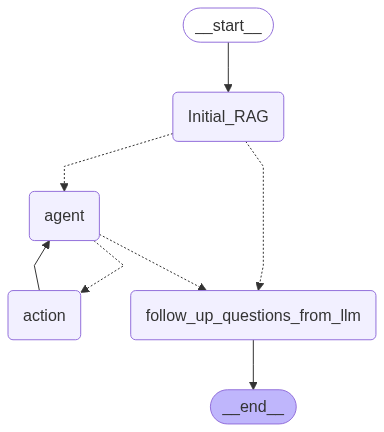

In [406]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        compiled_graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [407]:
compiled_graph.invoke({"messages" : [HumanMessage(content="What is False Positive Risk?")]})


{'messages': [HumanMessage(content='What is False Positive Risk?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='False Positive Risk (FPR) is the probability that a positive finding (a statistically significant result) is actually a false positive—that is, the result occurred by chance and there is no real effect. It reflects the chance that, despite observing a p-value below a certain threshold (e.g., 0.05), the finding is not a true discovery. The FPR depends on factors such as the prior odds of the hypothesis being true and the p-value threshold used. For example, with prior odds of 1:10 and a p-value threshold of 0.05, the false positive rate can be greater than 33%, meaning many "significant" results may be false positives. Lowering the p-value threshold to 0.005 can reduce the minimum false positive rate to about 5%. The concept emphasizes that p-values alone do not provide the probability that a result is a false positive, and that the false positive risk is 

Now let's see how this does on our cleaned synthetic dataset

In [419]:
for test_row in dataset:
  docs_descending_full = reranker.get_relevant_documents(test_row.eval_sample.user_input)
  docs_full = docs_descending_full[::-1]

  test_row.eval_sample.retrieved_contexts = [context.page_content for context in docs_full]

  # Create context from documents
  context = "\n\n".join([context.page_content for context in docs_full])
    
  # Format the prompt with context and query
  formatted_prompt = rag_prompt.format(context=context, question=test_row.eval_sample.user_input)
    
  # Send to the model and parse the output
  response = openai_chat_model.invoke(formatted_prompt)
  response_text = StrOutputParser().invoke(response)

  test_row.eval_sample.response = response_text

In [420]:
dataset.to_pandas()

,user_input,retrieved_contexts,reference_contexts,response,reference,synthesizer_name
0,Ron Kohabi rule of thumb trigger to twice prob...,[# Trigger rate to achieve 50% efficiency\n\nT...,[https://bit.ly/triggeringRuleOfThumb Triggeri...,Ron Kohavi's rule of thumb to trigger to twice...,Ron Kohavi's rule of thumb suggests that you s...,single_hop_specifc_query_synthesizer
1,What is the impact of CCPA on data privacy pra...,[Offline Analysis. An experiment summary is ca...,[**DRAFT – Love to get feedback ** Shipping Fl...,I don't know.,The provided context does not include specific...,single_hop_specifc_query_synthesizer
2,How does Eric Ries's concept of the Lean Start...,[# 6. Discounting seasonality effects. Section...,"[Online Controlled Experiments Pavel Dmitriev,...","Eric Ries's concept of the Lean Startup, which...",The provided context discusses the use of cont...,single_hop_specifc_query_synthesizer
3,How does Internet Explorer affect long-term A/...,[# Online Controlled Experiments and A/B Tests...,[users (by cookie) are not representative of t...,I don't know. The provided context does not me...,The context discusses how users who erase or l...,single_hop_specifc_query_synthesizer
4,How does IE9 affect cookie clobbering in A/B t...,"[For example, raising prices likely increases ...",[If the cookie deletion rate differs between C...,The provided context does not specifically men...,"In the context of A/B testing experiments, IE9...",single_hop_specifc_query_synthesizer
5,What is IEEE Big Data about in A/B Testing?,"[Phung et al. (eds.), Encyclopedia of Machine ...","[able to better track users, whereas the Contr...","Based on the provided context, IEEE Big Data i...",IEEE Big Data discusses methodologies for long...,single_hop_specifc_query_synthesizer
6,What does the FLT paper say about measuring us...,[2016; Chen et al. 2019). 8. Is there a surviv...,[it is hard to impute a reasonable “default” v...,The FLT paper proposes a methodology for quant...,The FLT paper notes that they have not measure...,single_hop_specifc_query_synthesizer
7,Does Windows 10 affect user metrics in experim...,[# Randomization Unit\n\nMost experiments use ...,[users. TABLE I. DELTA ON KEY METRICS BETWEEN ...,"Based on the context provided, it is unclear i...",The context discusses how the release of Windo...,single_hop_specifc_query_synthesizer
8,How does the context relate to Windows 10 in t...,[Error bars denote 95% confidence interval. We...,[cohort Estimate 95% C.I. Estimate 95% C.I. Us...,The context mentions that in an experiment inv...,The context discusses various aspects of onlin...,single_hop_specifc_query_synthesizer
9,What is the significance of the 20% threshold ...,[# Triggering Efficiency\n\nNote that while th...,[https://bit.ly/FalsePositiveInABTests © Kohav...,The 20% threshold in A/B testing is significan...,The context discusses the importance of choosi...,single_hop_specifc_query_synthesizer


In [421]:
evaluation_dataset = EvaluationDataset.from_pandas(dataset.to_pandas())

In [422]:
result = evaluate(
    dataset=evaluation_dataset,
    metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness(), ResponseRelevancy(), ContextEntityRecall(), NoiseSensitivity()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
result

Evaluating:   0%|          | 0/234 [00:00<?, ?it/s]

{'context_recall': 0.9754, 'faithfulness': 0.8753, 'factual_correctness(mode=f1)': 0.6474, 'answer_relevancy': 0.7004, 'context_entity_recall': 0.1825, 'noise_sensitivity(mode=relevant)': 0.2287}

Now let's set up our hybrid retriever + reranker with 10 + 10 --> 5. This means that we initially retrieve 10 chunks with our qdrant retriever, then retrieve 10 chunks with our BM25 retriever then have Cohere rerank these 20 chunks and ultimately retrieve Cohere's top 5 chunks

In [423]:
qdrant_retriever = qdrant_vectorstore.as_retriever(search_kwargs={"k": 10})

In [424]:
from langchain.retrievers import EnsembleRetriever
from langchain_community.retrievers import BM25Retriever

bm25_retriever = BM25Retriever.from_documents(all_chunks_95percentile)
bm25_retriever.k = 10

hybrid_retriever = EnsembleRetriever(
    retrievers=[
        qdrant_retriever, 
        bm25_retriever
    ],
    weights=[0.5, 0.5],
)

In [425]:
from langchain.retrievers.contextual_compression import ContextualCompressionRetriever
from langchain_cohere import CohereRerank

cohere_rerank = CohereRerank(
    model="rerank-english-v3.0",
    top_n=5,
)

reranker = ContextualCompressionRetriever(
    base_compressor=cohere_rerank, base_retriever=hybrid_retriever
)

In [426]:
print(reranker.get_relevant_documents("What is False Positive Risk?"))


[Document(metadata={'source': 'Pvalue Misinterpretations Annotated References.pdf', 'section_title': '4. The reproducibility of research and the misinterpretation of p-values (2017) by David Colquhoun.', 'section_level': 1, 'section_id': 'sec_1_1260037657844929439', 'chunk_type': 'text', '_id': '641ac99dc6ef4e5090c4ecffd18e22a5', '_collection_name': 'kohavi_ab_testing_pdf_collection', 'relevance_score': 0.9979493}, page_content='# 4. The reproducibility of research and the misinterpretation of p-values (2017) by David Colquhoun. Great paper about False Positive Risk. This article has only 256 citations, but I found it extremely insightful about the difference between alpha of 0.05 (what he calls p-less-than) and actually seeing a p-value around 0.05 (what he calls p-equals). In our Intuition Busters paper, we gave the false positive risk of p-less-than, which is much smaller than p-equals. 1. “…if the prior probability of a real effect were only 0.1. And, in this case, if you wanted to

In [427]:
from langgraph.graph import StateGraph, END

uncompiled_graph = StateGraph(GraphState)
uncompiled_graph.add_node("Initial_RAG", rag_chain_node)
uncompiled_graph.add_node("agent", call_model)
uncompiled_graph.add_node("action", tool_node)
uncompiled_graph.add_node("follow_up_questions_from_llm", follow_up_questions_node)
uncompiled_graph.set_entry_point("Initial_RAG")

uncompiled_graph.add_conditional_edges(
    "Initial_RAG",
    NonAB_Testing_or_helpful_RAG_or_continue,
    {
        "agent": "agent",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_conditional_edges(
    "agent",
    should_continue,
    {
        "action": "action",
        "follow_up_questions_from_llm": "follow_up_questions_from_llm"
    }
)

uncompiled_graph.add_edge("action", "agent") 
uncompiled_graph.add_edge("follow_up_questions_from_llm", END) 

compiled_graph = uncompiled_graph.compile()


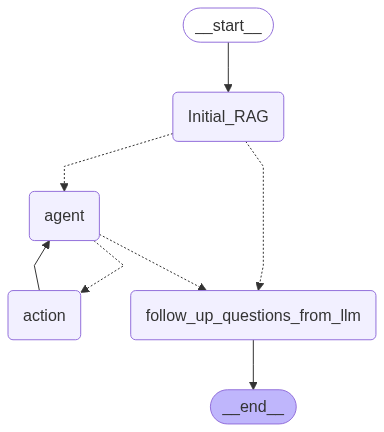

In [428]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        compiled_graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [429]:
compiled_graph.invoke({"messages" : [HumanMessage(content="What is False Positive Risk?")]})


{'messages': [HumanMessage(content='What is False Positive Risk?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='False Positive Risk (FPR) is defined as the probability that a positive result (i.e., a statistically significant finding) is actually a false positive—meaning there is no real effect and the observed result occurred by chance. It quantifies the chance that a statistically significant result does not reflect a true discovery.\n\nFrom the context:\n\n- FPR is the probability that the results occurred by chance despite a positive test outcome.\n- It differs from the p-value; while p-values indicate the probability of observing data as extreme as the observed under the null hypothesis, FPR directly addresses the chance that a significant result is false.\n- For example, with a p-value threshold of 0.05 and prior odds of 1:10 (i.e., low prior probability of a real effect), the false positive risk can be greater than 33%, meaning many "significant" findings ar

In [430]:
for test_row in dataset:
  docs_descending_full = reranker.get_relevant_documents(test_row.eval_sample.user_input)
  docs_full = docs_descending_full[::-1]

  test_row.eval_sample.retrieved_contexts = [context.page_content for context in docs_full]

  # Create context from documents
  context = "\n\n".join([context.page_content for context in docs_full])
    
  # Format the prompt with context and query
  formatted_prompt = rag_prompt.format(context=context, question=test_row.eval_sample.user_input)
    
  # Send to the model and parse the output
  response = openai_chat_model.invoke(formatted_prompt)
  response_text = StrOutputParser().invoke(response)

  test_row.eval_sample.response = response_text

In [431]:
dataset.to_pandas()

,user_input,retrieved_contexts,reference_contexts,response,reference,synthesizer_name
0,Ron Kohabi rule of thumb trigger to twice prob...,[# Trigger rate to achieve 50% efficiency\n\nT...,[https://bit.ly/triggeringRuleOfThumb Triggeri...,Ron Kohavi's rule of thumb to trigger to twice...,Ron Kohavi's rule of thumb suggests that you s...,single_hop_specifc_query_synthesizer
1,What is the impact of CCPA on data privacy pra...,[# 3.2.2 Example: impact of reduced sensitivit...,[**DRAFT – Love to get feedback ** Shipping Fl...,I don't know.,The provided context does not include specific...,single_hop_specifc_query_synthesizer
2,How does Eric Ries's concept of the Lean Start...,[# 4. Discussion of the impact of side effects...,"[Online Controlled Experiments Pavel Dmitriev,...","Eric Ries's concept of the Lean Startup, which...",The provided context discusses the use of cont...,single_hop_specifc_query_synthesizer
3,How does Internet Explorer affect long-term A/...,[# X. SUMMARY\n\nWe shared several important p...,[users (by cookie) are not representative of t...,I don't know.,The context discusses how users who erase or l...,single_hop_specifc_query_synthesizer
4,How does IE9 affect cookie clobbering in A/B t...,[Next we disabled most of the backend but that...,[If the cookie deletion rate differs between C...,The provided context does not mention Internet...,"In the context of A/B testing experiments, IE9...",single_hop_specifc_query_synthesizer
5,What is IEEE Big Data about in A/B Testing?,"[""Too many entrepreneurs and innovators execut...","[able to better track users, whereas the Contr...","Based on the provided context, IEEE Big Data i...",IEEE Big Data discusses methodologies for long...,single_hop_specifc_query_synthesizer
6,What does the FLT paper say about measuring us...,[2016; Chen et al. 2019). 8. Is there a surviv...,[it is hard to impute a reasonable “default” v...,The FLT paper proposes a methodology for quant...,The FLT paper notes that they have not measure...,single_hop_specifc_query_synthesizer
7,Does Windows 10 affect user metrics in experim...,[# THE GROWTH OF EXPERIMENTATION AT BING\n\nMi...,[users. TABLE I. DELTA ON KEY METRICS BETWEEN ...,"Yes, according to the context, Windows 10 may ...",The context discusses how the release of Windo...,single_hop_specifc_query_synthesizer
8,How does the context relate to Windows 10 in t...,[Error bars denote 95% confidence interval. We...,[cohort Estimate 95% C.I. Estimate 95% C.I. Us...,The context mentions that in an experiment inv...,The context discusses various aspects of onlin...,single_hop_specifc_query_synthesizer
9,What is the significance of the 20% threshold ...,[Capping metrics is an often-overlooked trivia...,[https://bit.ly/FalsePositiveInABTests © Kohav...,The 20% threshold in A/B testing is significan...,The context discusses the importance of choosi...,single_hop_specifc_query_synthesizer


In [432]:
evaluation_dataset = EvaluationDataset.from_pandas(dataset.to_pandas())

In [433]:
result = evaluate(
    dataset=evaluation_dataset,
    metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness(), ResponseRelevancy(), ContextEntityRecall(), NoiseSensitivity()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
result

Evaluating:   0%|          | 0/234 [00:00<?, ?it/s]

Exception raised in Job[23]: OutputParserException(Invalid json output: The answer is "I don't know."
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE )
Exception raised in Job[197]: ValueError(setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.)


{'context_recall': 0.9308, 'faithfulness': 0.8619, 'factual_correctness(mode=f1)': 0.6297, 'answer_relevancy': 0.6803, 'context_entity_recall': 0.1636, 'noise_sensitivity(mode=relevant)': 0.2372}

Control: {'context_recall': 0.9145, 'faithfulness': 0.8211, 'factual_correctness(mode=f1)': 0.6169, 'answer_relevancy': 0.7035, 'context_entity_recall': 0.1590, 'noise_sensitivity(mode=relevant)': 0.2196}


hybrid retriever + rerank (5 + 5 --> 5):

{'context_recall': 0.9754, 'faithfulness': 0.8753, 'factual_correctness(mode=f1)': 0.6474, 'answer_relevancy': 0.7004, 'context_entity_recall': 0.1825, 'noise_sensitivity(mode=relevant)': 0.2287}

hybrid retriever + rerank (10 + 10 --> 5):

{'context_recall': 0.9308, 'faithfulness': 0.8619, 'factual_correctness(mode=f1)': 0.6297, 'answer_relevancy': 0.6803, 'context_entity_recall': 0.1636, 'noise_sensitivity(mode=relevant)': 0.2372}

Now it's time to compare the variants vs Control and determine the winner based off of our experiment. Again, for each test variant, for each metric, we want to see not only its score for the metric but also, its % Relative Lift vs Control (so we get a sense of how much better or worse was it vs Control). 

We want a single OEC (Overall Evaluation Criterion) for our experiment to make determining a winner objective and meaningful to our organization. Usually, with some institutional knowledge of experiments at our organization, we can come to an agreement on exactly what the OEC is that best reflects success. However, here, since we don't have that, our OEC is the most obvious choice, just the simple average of our 6 Ragas metrics. 

Note: for noise_sensitivity(mode=relevant), the lower the score the better (unlike the other 5 metrics, so we consider 1 - noise_sensitivity(mode=relevant) for a clean, fair comparision).

We want to display a clean table that makes all this easily visible. We display the % Relative Lifts vs Control in parantheses 

In [457]:
control = {'context_recall': 0.9145, 'faithfulness': 0.8211, 'factual_correctness(mode=f1)': 0.6169, 'answer_relevancy': 0.7035, 'context_entity_recall': 0.1590, 'noise_sensitivity(mode=relevant)': 0.2196}
hybrid_reranker_5_5_5 = {'context_recall': 0.9754, 'faithfulness': 0.8753, 'factual_correctness(mode=f1)': 0.6474, 'answer_relevancy': 0.7004, 'context_entity_recall': 0.1825, 'noise_sensitivity(mode=relevant)': 0.2287}
hybrid_reranker_10_10_5 = {'context_recall': 0.9308, 'faithfulness': 0.8619, 'factual_correctness(mode=f1)': 0.6297, 'answer_relevancy': 0.6803, 'context_entity_recall': 0.1636, 'noise_sensitivity(mode=relevant)': 0.2372}


In [ ]:
import pandas as pd
from tabulate import tabulate

rows = [
    'context_recall',
    'faithfulness',
    'factual_correctness(mode=f1)',
    'answer_relevancy',
    'context_entity_recall',
    '1 - noise_sensitivity(mode=relevant)'
]

# Calculate 1 - noise sensitivity values
control['1 - noise_sensitivity(mode=relevant)'] = 1 - control.pop('noise_sensitivity(mode=relevant)')
hybrid_reranker_5_5_5['1 - noise_sensitivity(mode=relevant)'] = 1 - hybrid_reranker_5_5_5.pop('noise_sensitivity(mode=relevant)')
hybrid_reranker_10_10_5['1 - noise_sensitivity(mode=relevant)'] = 1 - hybrid_reranker_10_10_5.pop('noise_sensitivity(mode=relevant)')

# Function for metric value and % relative lift
def format_with_lift(test_value, control_value):
    lift = ((test_value - control_value) / control_value) * 100
    return f"{test_value:.4f} ({lift:.1f}%)"

# Prepare data for DataFrame
control_values = [control[row] for row in rows]
hybrid5_values = [hybrid_reranker_5_5_5[row] for row in rows]
hybrid10_values = [hybrid_reranker_10_10_5[row] for row in rows]

# Calculate averages and add to rows
control_avg = sum(control_values) / len(control_values)
hybrid5_avg = sum(hybrid5_values) / len(hybrid5_values)
hybrid10_avg = sum(hybrid10_values) / len(hybrid10_values)

rows.append('OVERALL AVERAGE')
control_values.append(control_avg)
hybrid5_values.append(hybrid5_avg)
hybrid10_values.append(hybrid10_avg)

# Create formatted columns
control_col = [f"{v:.4f}" for v in control_values]
hybrid5_col = [format_with_lift(h5, c) for h5, c in zip(hybrid5_values, control_values)]
hybrid10_col = [format_with_lift(h10, c) for h10, c in zip(hybrid10_values, control_values)]

# Create DataFrame
df = pd.DataFrame({
    'Control: Naive Retriever': control_col,
    'Hybrid Retriever + Reranker: 5 + 5 --> 5 (% Relative Lift vs Control)': hybrid5_col,
    'Hybrid Retriever + Reranker: 10 + 10 --> 5 (% Relative Lift vs Control)': hybrid10_col
}, index=rows)

df.index.name = 'Metrics'

# We want to right align the values in the columns but not the metric names column. 
# We needed to manually do this because the last 2 columns are not right aligned
# due to containing strings (for the % relative lift)
print(tabulate(df, headers='keys', tablefmt='github', colalign=("left", "right", "right", "right")))


| Metrics                              |   Control: Naive Retriever |   Hybrid Retriever + Reranker: 5 + 5 --> 5 (% Relative Lift vs Control) |   Hybrid Retriever + Reranker: 10 + 10 --> 5 (% Relative Lift vs Control) |
|--------------------------------------|----------------------------|-------------------------------------------------------------------------|---------------------------------------------------------------------------|
| context_recall                       |                     0.9145 |                                                           0.9754 (6.7%) |                                                             0.9308 (1.8%) |
| faithfulness                         |                     0.8211 |                                                           0.8753 (6.6%) |                                                             0.8619 (5.0%) |
| factual_correctness(mode=f1)         |                     0.6169 |                                                   

Based just off of this experiment, we see that Hybrid Retriever + Reranker: 5 + 5 --> 5 is the winner (see the discussion after the 1st experiment above for a more thorough process)